![](../banner.png)
# Exploratory Data Analysis (EDA)
This notebook shows graphs for the inital EDA of my dataset.
## Import libraries
As usual, I first imported the required libraries:

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Import dataset
I then imported the dataset I created:

In [85]:
df = pd.read_csv(f'../df_merged.csv/00.part')

for i in range(1, 10):
    df1 = pd.read_csv(f'../df_merged.csv/0{i}.part')
    df = pd.concat([df, df1], axis = 0)
    
for i in range (10, 14):
    df1 = pd.read_csv(f'../df_merged.csv/{i}.part')
    df = pd.concat([df, df1], axis = 0)
    
df.drop(columns = 'Unnamed: 0', inplace = True)
print(df.shape)
df.head()

(2074393, 17)


side_effect category   gender   age    year sender_type is_consumer  \
0      eosinophilia    blood   female   0.0  1991.0    indirect           n   
1  chest discomfort    genrl  unknown  60.0  1994.0      direct           n   
2  feeling abnormal    genrl  unknown  60.0  1994.0      direct           n   
3       feeling hot    genrl  unknown  60.0  1994.0      direct           n   
4          flushing     vasc  unknown  60.0  1994.0      direct           n   

  is_hcp severity    db_id      drug  \
0      y        s  DB00125  arginine   
1      y        s  DB00125  arginine   
2      y        s  DB00125  arginine   
3      y        s  DB00125  arginine   
4      y        s  DB00125  arginine   

                                              target  \
0  ['Nitric oxide synthase, endothelial', 'Cation...   
1  ['Nitric oxide synthase, endothelial', 'Cation...   
2  ['Nitric oxide synthase, endothelial', 'Cation...   
3  ['Nitric oxide synthase, endothelial', 'Cation...   
4  ['Nitric oxide synthase, endothelial', 'Cation...   

                      drug_cat         brand  \
0  ['Pharmacia and upjohn co']  ['arginine']   
1  ['Pharmacia and upjohn co']  ['arginine']   
2  ['Pharmacia and upjohn co']  ['arginine']   
3  ['Pharmacia and upjohn co']  ['arginine']   
4  ['Pharmacia and upjohn co']  ['arginine']   

                                           condition  rating  n_reviews  
0  ['diagnosis and investigation' 'dietary supple...     9.4          5  
1  ['diagnosis and investigation' 'dietary supple...     9.4          5  
2  ['diagnosis and investigation' 'dietary supple...     9.4          5  
3  ['diagnosis and investigation' 'dietary supple...     9.4          5  
4  ['diagnosis and investigation' 'dietary supple...     9.4          5

### Condition column - cleaning
Below are steps I performed to further clean the condition column to obtain desired format and values:
- removed `'nan'` strings in the list of conditions for each row, 
- `.strip()` to remove extra spaces
- `if` clause in the list comprehension to only retain non-empty values
- unlist the list of conditions using `', '.join()`
- `.replace()` to correct some typos

In [96]:
# remove 'nan' from list of conditions and remove spaces
df.condition = df.condition.apply(lambda x: [i.strip() for i in x.replace('nan', '').replace('[', '').replace(']', '').replace('not listed / othe', '').split("'") if i.strip() != ''])

# "unlist" list of conditions
df.condition = df.condition.apply(lambda x: ', '.join(x))

# correct typos
df.condition = df.condition.str.replace('disorderrs', 'disorders')
df.condition = df.condition.str.replace('disorderr', 'disorder')
df.condition = df.condition.str.replace('cancerr', 'cancer')
df.condition = df.condition.str.replace('cancerrs', 'cancers')
df.condition = df.condition.str.replace('nan', '')
df.head()

side_effect category   gender   age    year sender_type is_consumer  \
0      eosinophilia    blood   female   0.0  1991.0    indirect           n   
1  chest discomfort    genrl  unknown  60.0  1994.0      direct           n   
2  feeling abnormal    genrl  unknown  60.0  1994.0      direct           n   
3       feeling hot    genrl  unknown  60.0  1994.0      direct           n   
4          flushing     vasc  unknown  60.0  1994.0      direct           n   

  is_hcp severity    db_id      drug  \
0      y        s  DB00125  arginine   
1      y        s  DB00125  arginine   
2      y        s  DB00125  arginine   
3      y        s  DB00125  arginine   
4      y        s  DB00125  arginine   

                                              target  \
0  ['Nitric oxide synthase, endothelial', 'Cation...   
1  ['Nitric oxide synthase, endothelial', 'Cation...   
2  ['Nitric oxide synthase, endothelial', 'Cation...   
3  ['Nitric oxide synthase, endothelial', 'Cation...   
4  ['Nitric oxide synthase, endothelial', 'Cation...   

                      drug_cat         brand  \
0  ['Pharmacia and upjohn co']  ['arginine']   
1  ['Pharmacia and upjohn co']  ['arginine']   
2  ['Pharmacia and upjohn co']  ['arginine']   
3  ['Pharmacia and upjohn co']  ['arginine']   
4  ['Pharmacia and upjohn co']  ['arginine']   

                                           condition  rating  n_reviews  
0  diagnosis and investigation, dietary supplemen...     9.4          5  
1  diagnosis and investigation, dietary supplemen...     9.4          5  
2  diagnosis and investigation, dietary supplemen...     9.4          5  
3  diagnosis and investigation, dietary supplemen...     9.4          5  
4  diagnosis and investigation, dietary supplemen...     9.4          5

### Brand column - drop

In [109]:
# drop brand column
df.drop(columns = 'brand', inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

side_effect category   gender   age    year sender_type is_consumer  \
0      eosinophilia    blood   female   0.0  1991.0    indirect           n   
1  chest discomfort    genrl  unknown  60.0  1994.0      direct           n   
2  feeling abnormal    genrl  unknown  60.0  1994.0      direct           n   
3       feeling hot    genrl  unknown  60.0  1994.0      direct           n   
4          flushing     vasc  unknown  60.0  1994.0      direct           n   

  is_hcp severity    db_id      drug  \
0      y        s  DB00125  arginine   
1      y        s  DB00125  arginine   
2      y        s  DB00125  arginine   
3      y        s  DB00125  arginine   
4      y        s  DB00125  arginine   

                                              target  \
0  ['Nitric oxide synthase, endothelial', 'Cation...   
1  ['Nitric oxide synthase, endothelial', 'Cation...   
2  ['Nitric oxide synthase, endothelial', 'Cation...   
3  ['Nitric oxide synthase, endothelial', 'Cation...   
4  ['Nitric oxide synthase, endothelial', 'Cation...   

                      drug_cat  \
0  ['Pharmacia and upjohn co']   
1  ['Pharmacia and upjohn co']   
2  ['Pharmacia and upjohn co']   
3  ['Pharmacia and upjohn co']   
4  ['Pharmacia and upjohn co']   

                                           condition  rating  n_reviews  
0  diagnosis and investigation, dietary supplemen...     9.4          5  
1  diagnosis and investigation, dietary supplemen...     9.4          5  
2  diagnosis and investigation, dietary supplemen...     9.4          5  
3  diagnosis and investigation, dietary supplemen...     9.4          5  
4  diagnosis and investigation, dietary supplemen...     9.4          5

### Drug_cat column - remove irrelevant values
For drugs that have multiple AHFS values, I decided to only retain the first one.

In [130]:
df.drug_cat = df.drug_cat.apply(lambda x: [i.strip().replace('[', '').replace(']', '').replace("'", "") for i in x.split(', ')][0])

Some values in this column are not actual AHFS drug category values, instead I scraped the company names.
- The values I wish to keep looks like this:

`['28:16.08.04 — Atypical Antipsychotics']`
- And the incorrect ones look like this:

`['Murfreesboro Pharmaceutical Nursing Supply', 'Novartis AG']`

An easy way to address this is to filter out values that contain the symbol `—`:

In [132]:
df.drug_cat.str.contains('—').value_counts()

True     1607007
False     467386
Name: drug_cat, dtype: int64

In [138]:
df.loc[df[~df.drug_cat.str.contains('—')].index, 'drug_cat'] = 'nan'
df.drug_cat.value_counts().head(10)

nan                                                         467386
28:16.08.04 — Atypical Antipsychotics                       164077
28:16.04.20 — Selective-serotonin Reuptake Inhibitors        99261
10:00.00 — Antineoplastic Agents                             85151
28:12.92 — Miscellaneous Anticonvulsants                     70246
28:08.04.92 — Other Nonsteroidal Antiimflammatory Agents     55268
68:12.00 — Contraceptives                                    43094
24:06.08 — Hmg-coa Reductase Inhibitors                      40366
52:04.04 — Antibacterials                                    40015
24:32.04 — Angiotensin-converting Enzyme Inhibitors          37943
Name: drug_cat, dtype: int64

In [139]:
df.head()

side_effect category   gender   age    year sender_type is_consumer  \
0      eosinophilia    blood   female   0.0  1991.0    indirect           n   
1  chest discomfort    genrl  unknown  60.0  1994.0      direct           n   
2  feeling abnormal    genrl  unknown  60.0  1994.0      direct           n   
3       feeling hot    genrl  unknown  60.0  1994.0      direct           n   
4          flushing     vasc  unknown  60.0  1994.0      direct           n   

  is_hcp severity    db_id      drug  \
0      y        s  DB00125  arginine   
1      y        s  DB00125  arginine   
2      y        s  DB00125  arginine   
3      y        s  DB00125  arginine   
4      y        s  DB00125  arginine   

                                              target drug_cat  \
0  ['Nitric oxide synthase, endothelial', 'Cation...      nan   
1  ['Nitric oxide synthase, endothelial', 'Cation...      nan   
2  ['Nitric oxide synthase, endothelial', 'Cation...      nan   
3  ['Nitric oxide synthase, endothelial', 'Cation...      nan   
4  ['Nitric oxide synthase, endothelial', 'Cation...      nan   

                                           condition  rating  n_reviews  
0  diagnosis and investigation, dietary supplemen...     9.4          5  
1  diagnosis and investigation, dietary supplemen...     9.4          5  
2  diagnosis and investigation, dietary supplemen...     9.4          5  
3  diagnosis and investigation, dietary supplemen...     9.4          5  
4  diagnosis and investigation, dietary supplemen...     9.4          5

# Set types of variables
I created variables to store different types of variables:
- `cats` for categorical variables
- `texts` for text variables
- `nums` for numerical variables

In [147]:
cats = ['category', 'gender', 'age', 'sender_type', 'is_consumer', 'is_hcp']#, 'drug', 'drug_cat']
texts = ['side_effect', 'target', 'condition'] #'review'
nums = ['year', 'rating', 'n_reviews']

# EDA for the entire data set
## Categorical variables - histograms

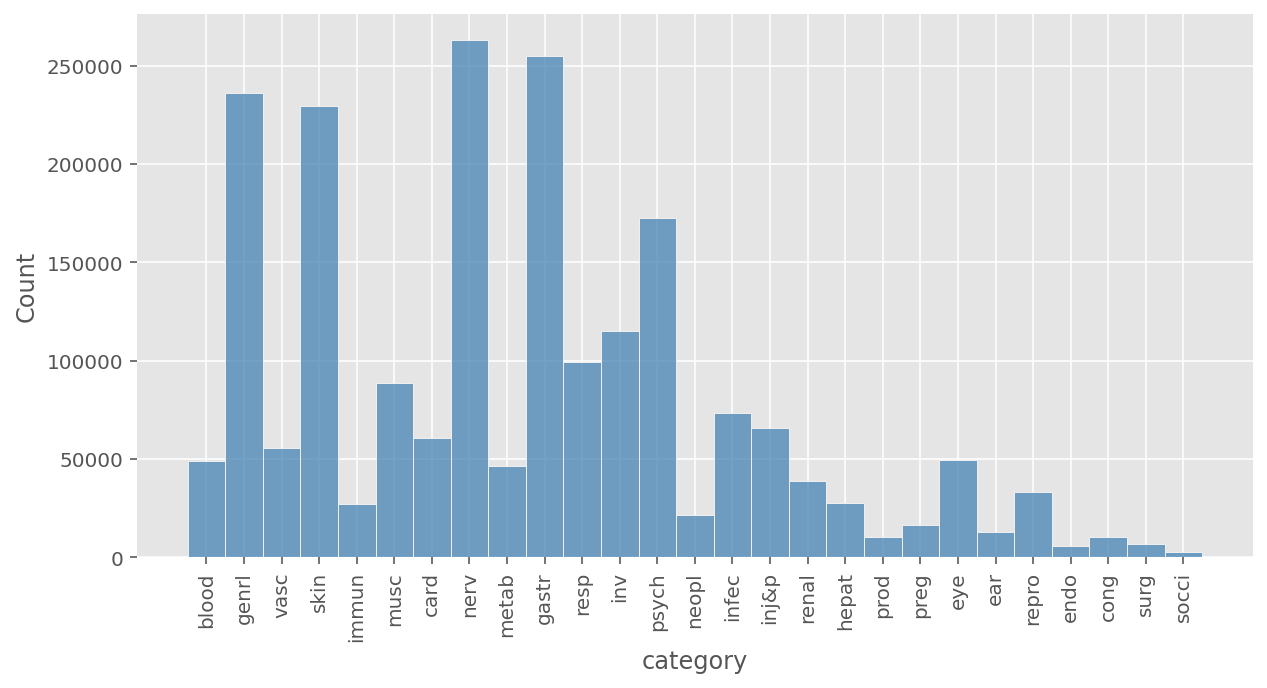

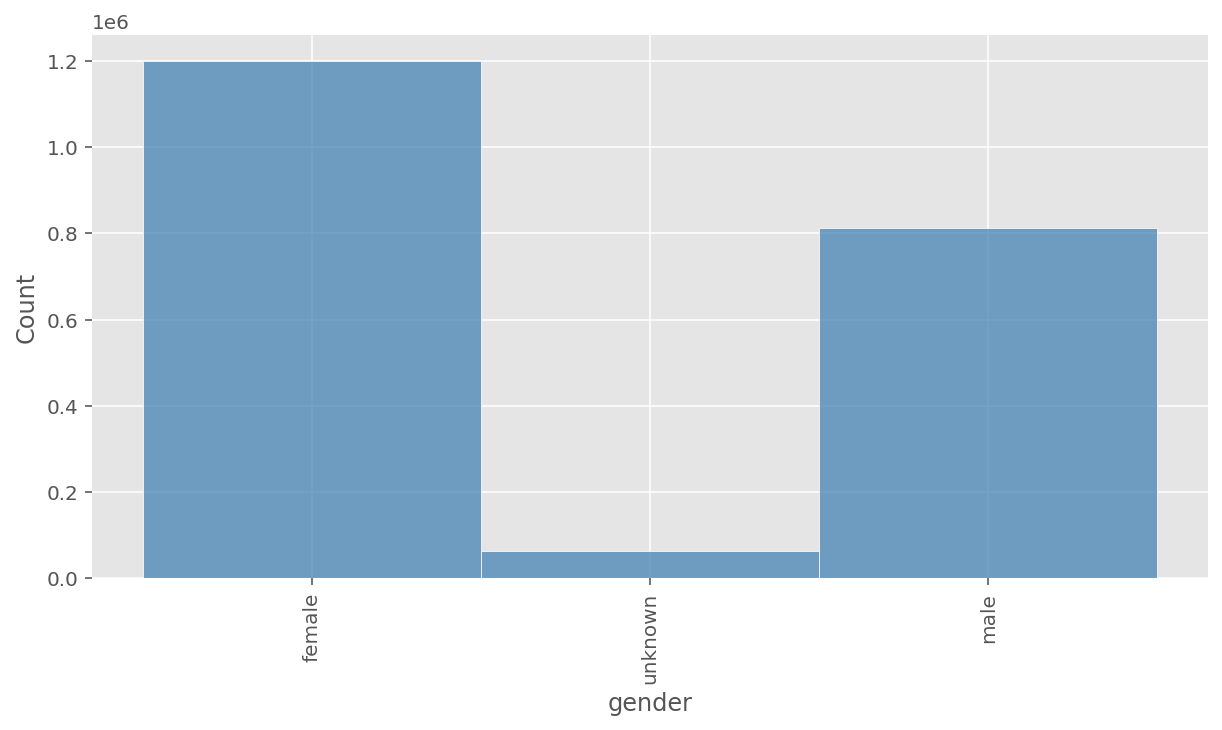

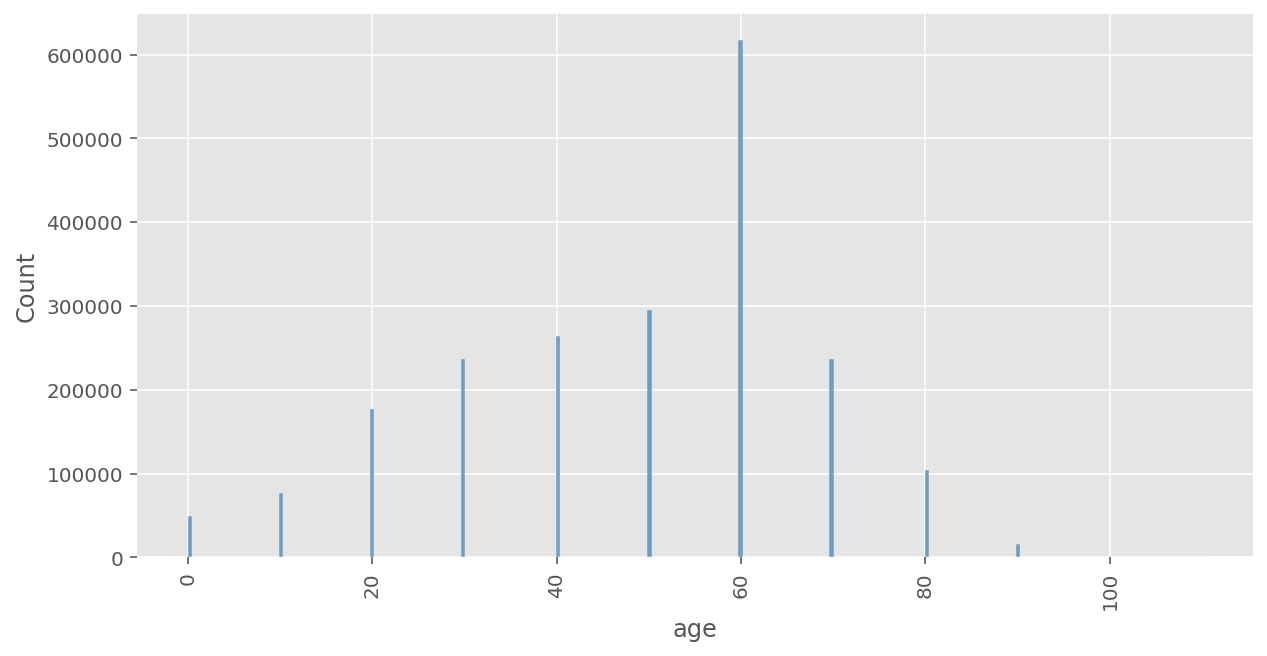

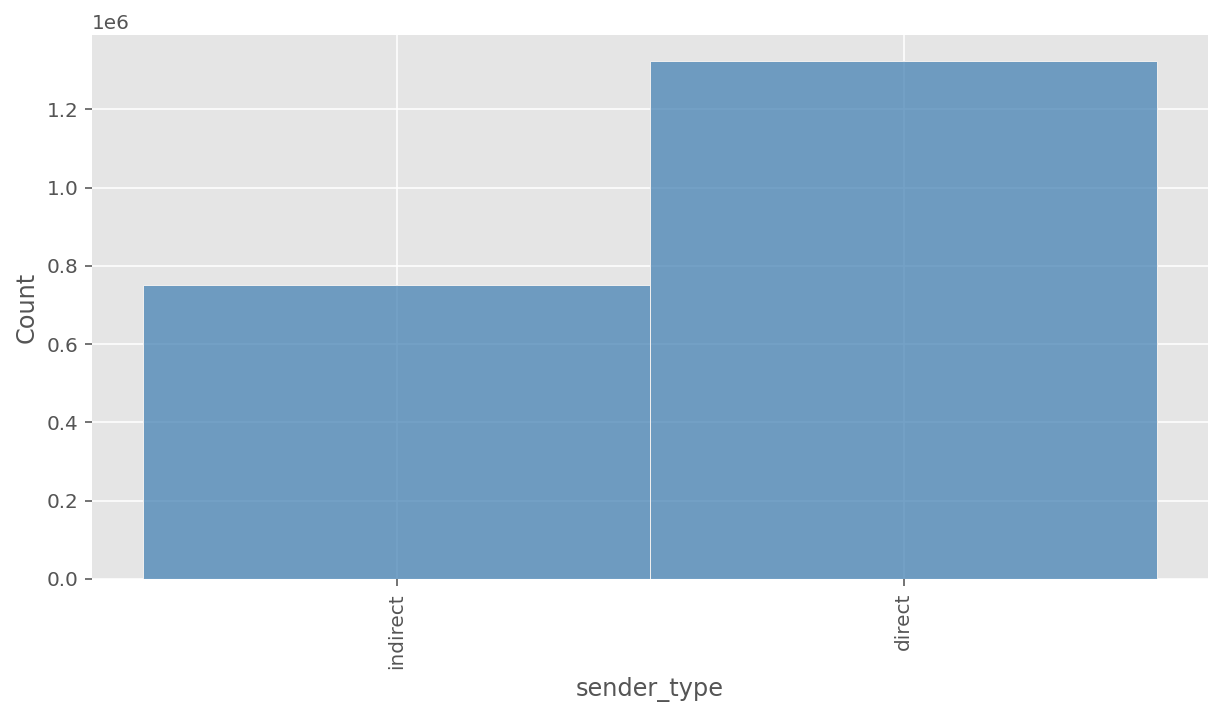

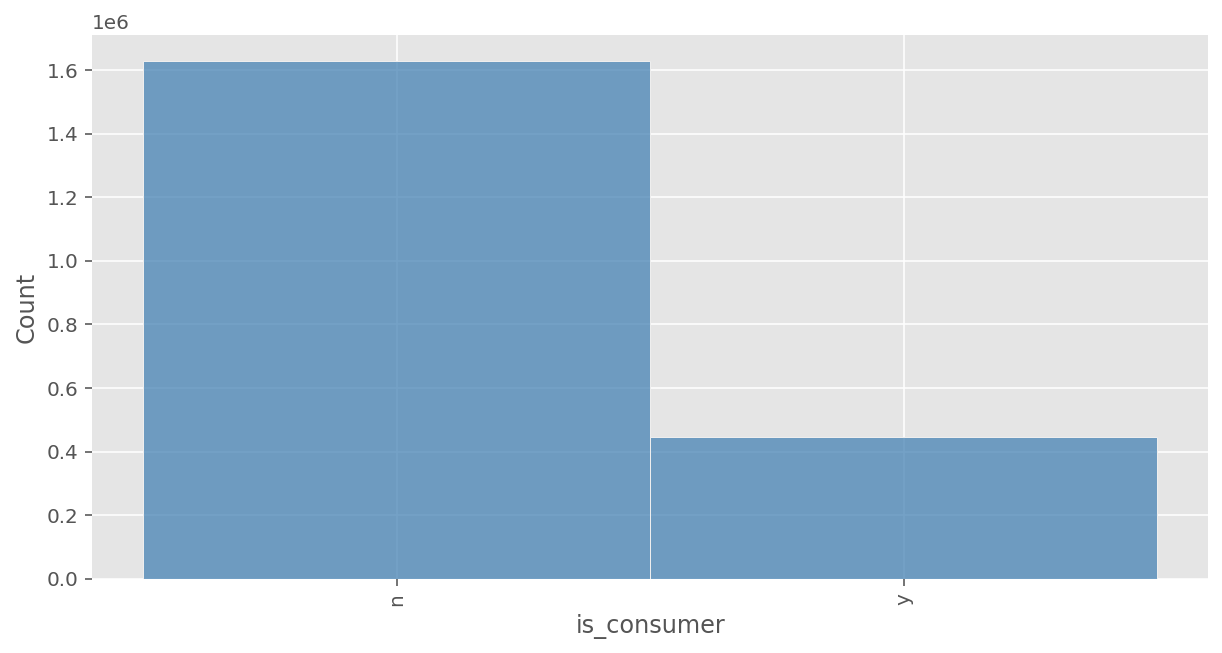

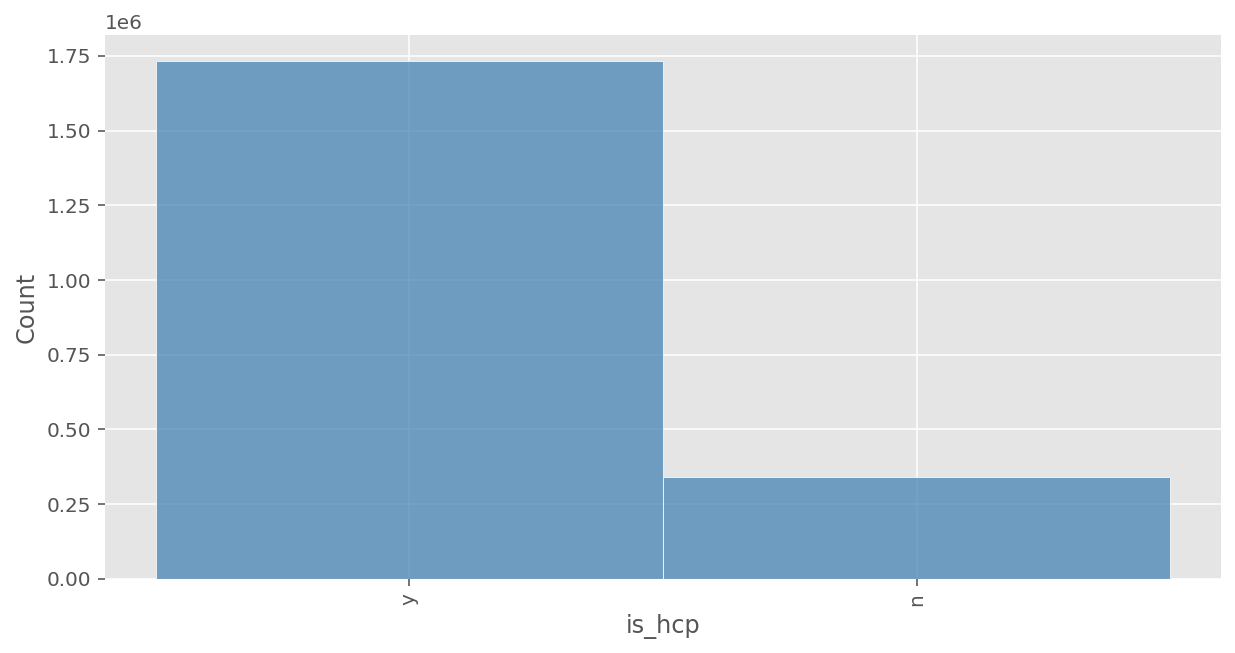

In [196]:
for col in cats:
    f, ax = plt.subplots(figsize=(10, 5))
    sns.despine(f, left=True, bottom=True)
    sns.histplot(df[col], ax = ax, color = 'steelblue')
    plt.xticks(rotation = 90)
    f.savefig(f'all_data/all_{col}_hist.pdf')
    plt.show()

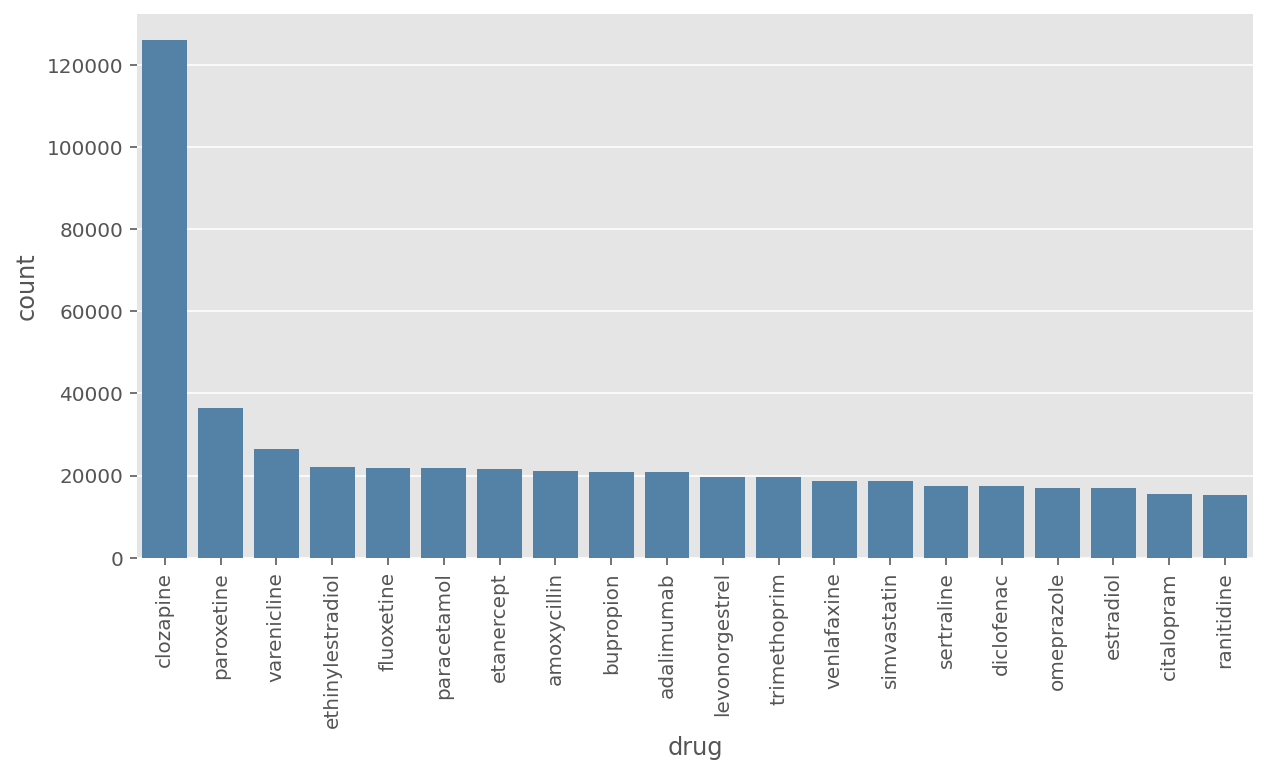

In [198]:
# drug - only showing top 20

# create new data frame for drug column
drug_count = pd.DataFrame(df.drug.value_counts().head(20))
drug_count.reset_index(inplace = True)
drug_count.columns = ['drug', 'count']

# plot histogram
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.barplot(x = 'drug', y = 'count', data = drug_count,
            color = 'steelblue', ax = ax)
plt.xticks(rotation = 90)
f.savefig(f'all_data/all_top_20_drugs_hist.pdf')
plt.show()

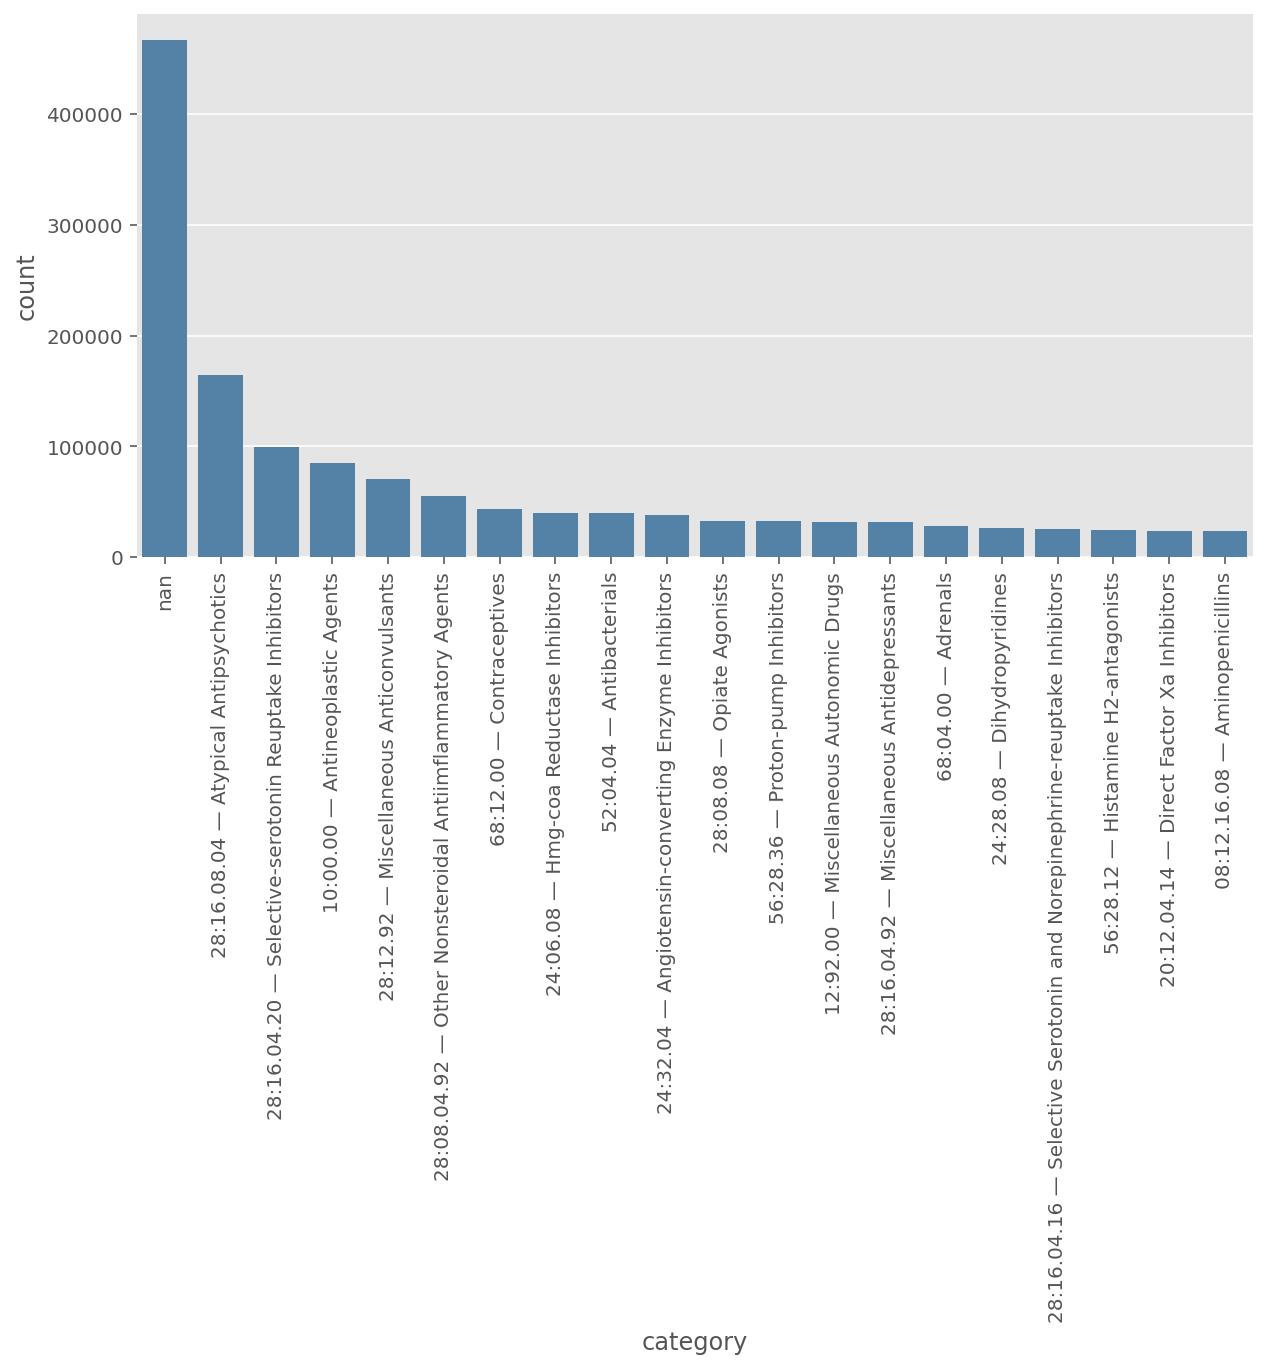

In [199]:
# drug_cat - only showing top 20

# create new data frame for drug column
drug_count = pd.DataFrame(df.drug_cat.value_counts().head(2b))
drug_count.reset_index(inplace = True)
drug_count.columns = ['category', 'count']

# plot histogram
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.barplot(x = 'category', y = 'count', data = drug_count,
            color = 'steelblue', ax = ax)
plt.xticks(rotation = 90)
f.savefig(f'all_data/all_top_20_drug_cat_hist.pdf')
plt.show()

## Numerical variables - histograms

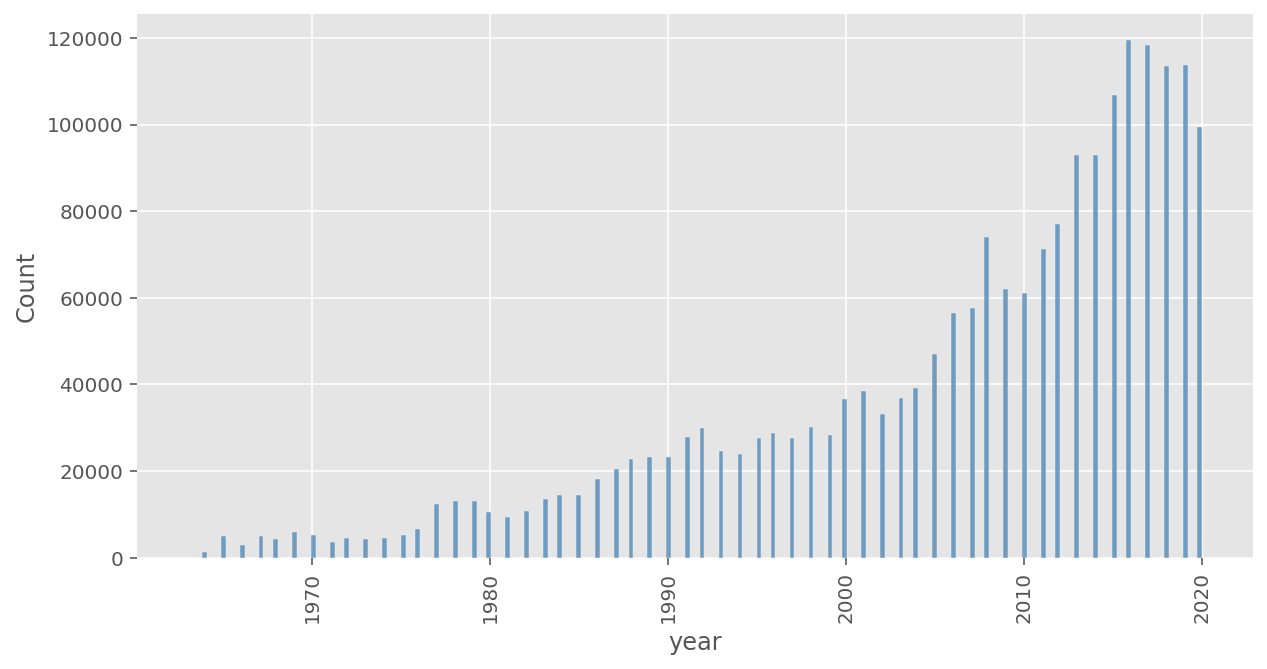

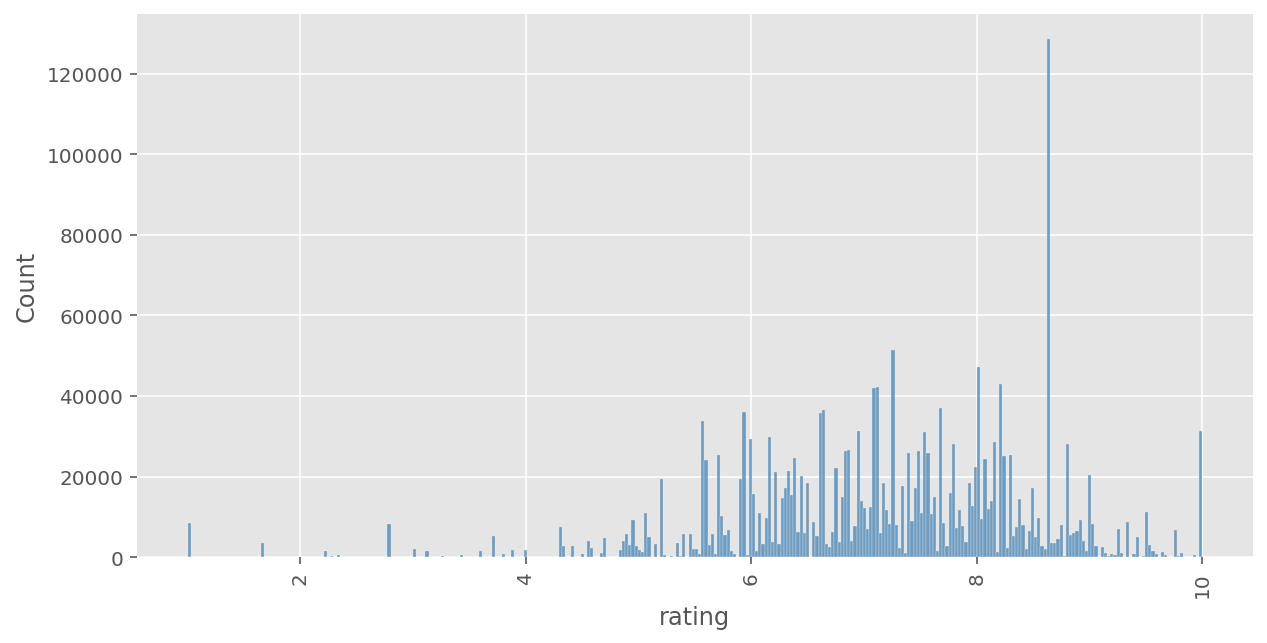

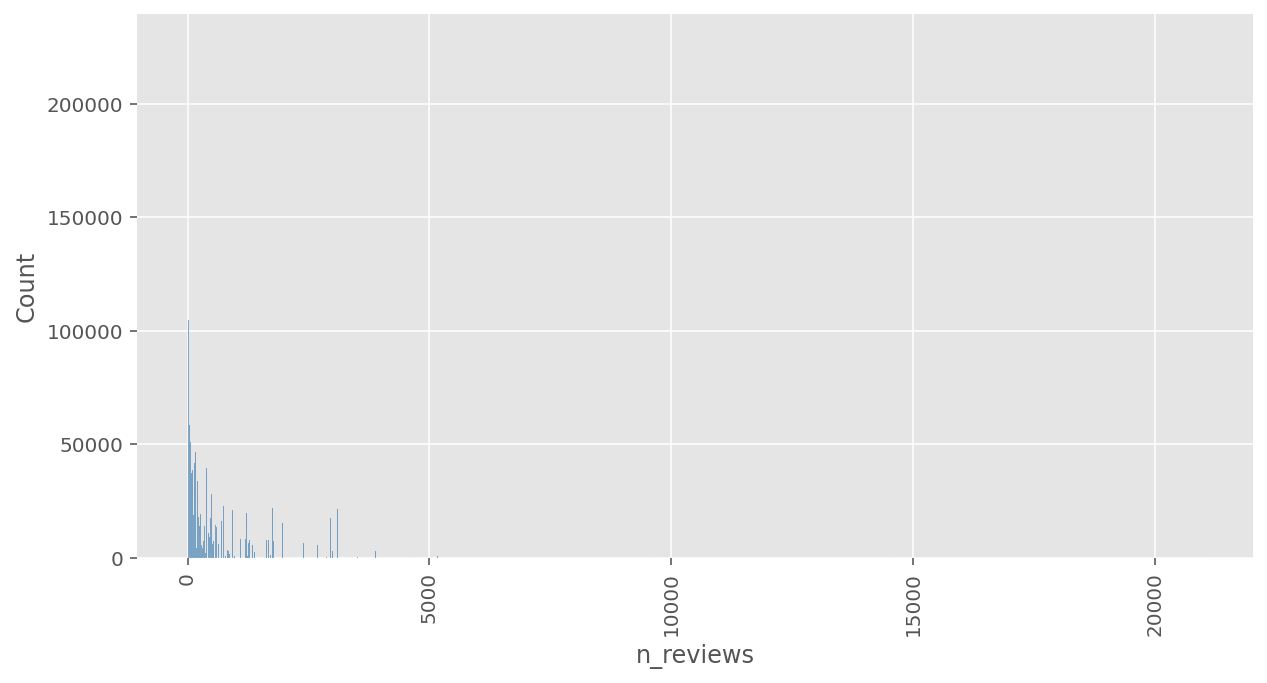

In [200]:
for col in nums:
    f, ax = plt.subplots(figsize=(10, 5))
    sns.despine(f, left=True, bottom=True)
    sns.histplot(df[col], ax = ax, color = 'steelblue')
    plt.xticks(rotation = 90)
    f.savefig(f'all_data/all_{col}_hist.pdf')
    plt.show()

## Box plots - against severity (target variable)

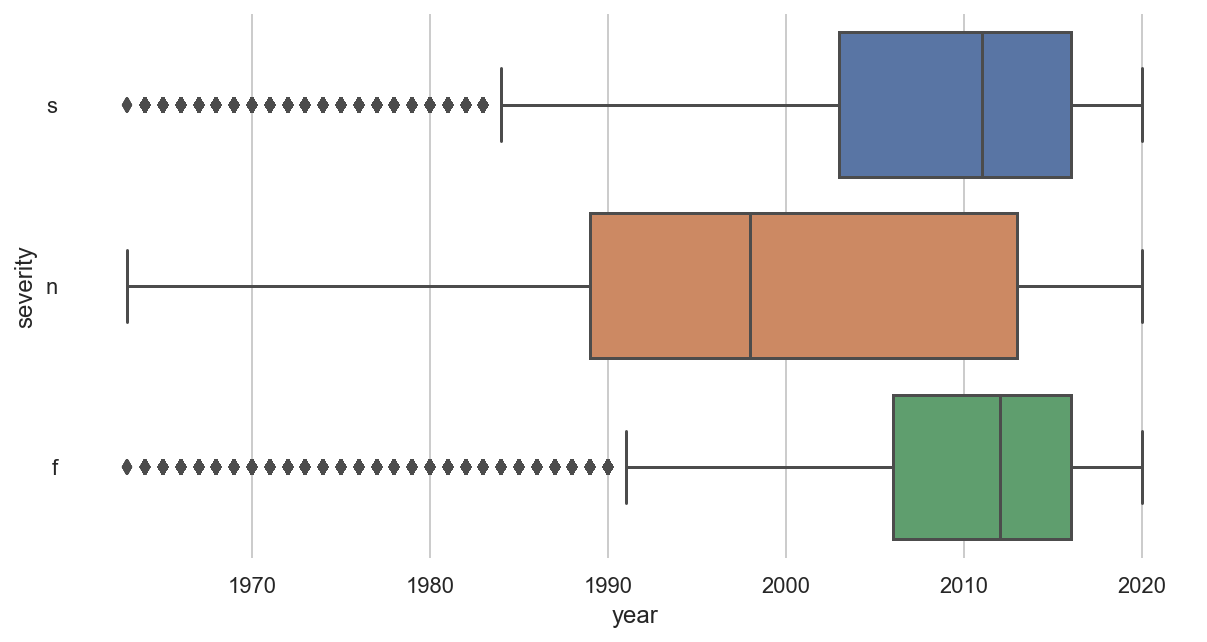

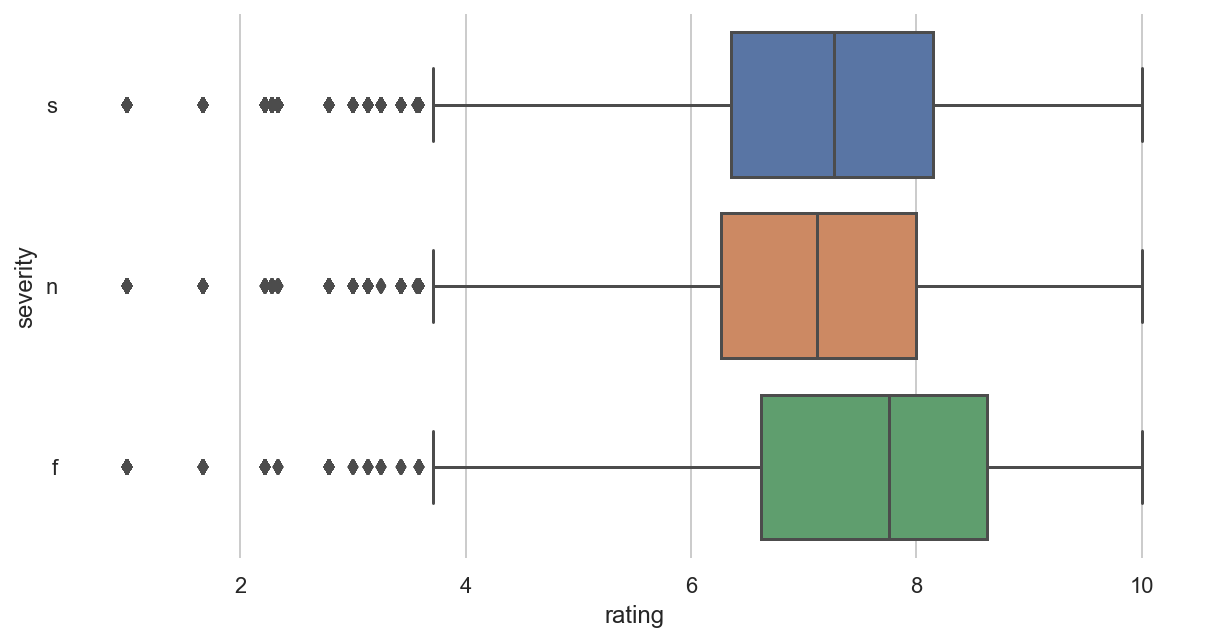

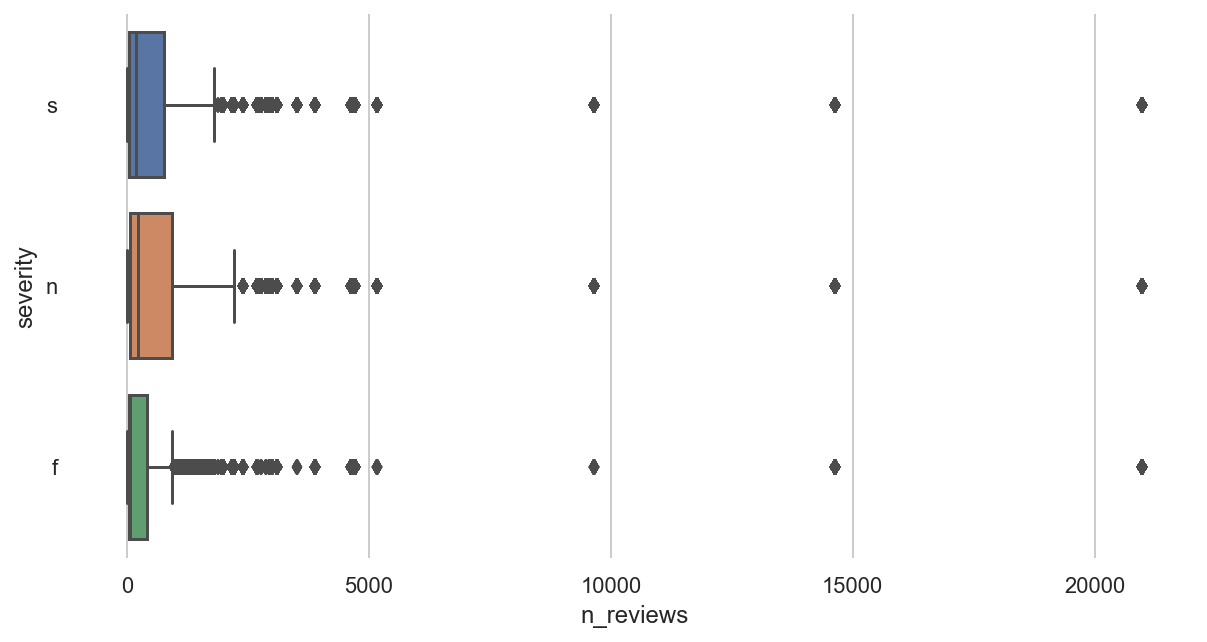

In [203]:
for col in nums:
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(10, 5))
    sns.despine(f, left=True, bottom=True)
    sns.boxplot(x=col, y='severity', data=df, ax = ax)
    f.savefig(f'all_data/all_box_{col}_severity.pdf')
    plt.show()

## Box plots - against side effect category

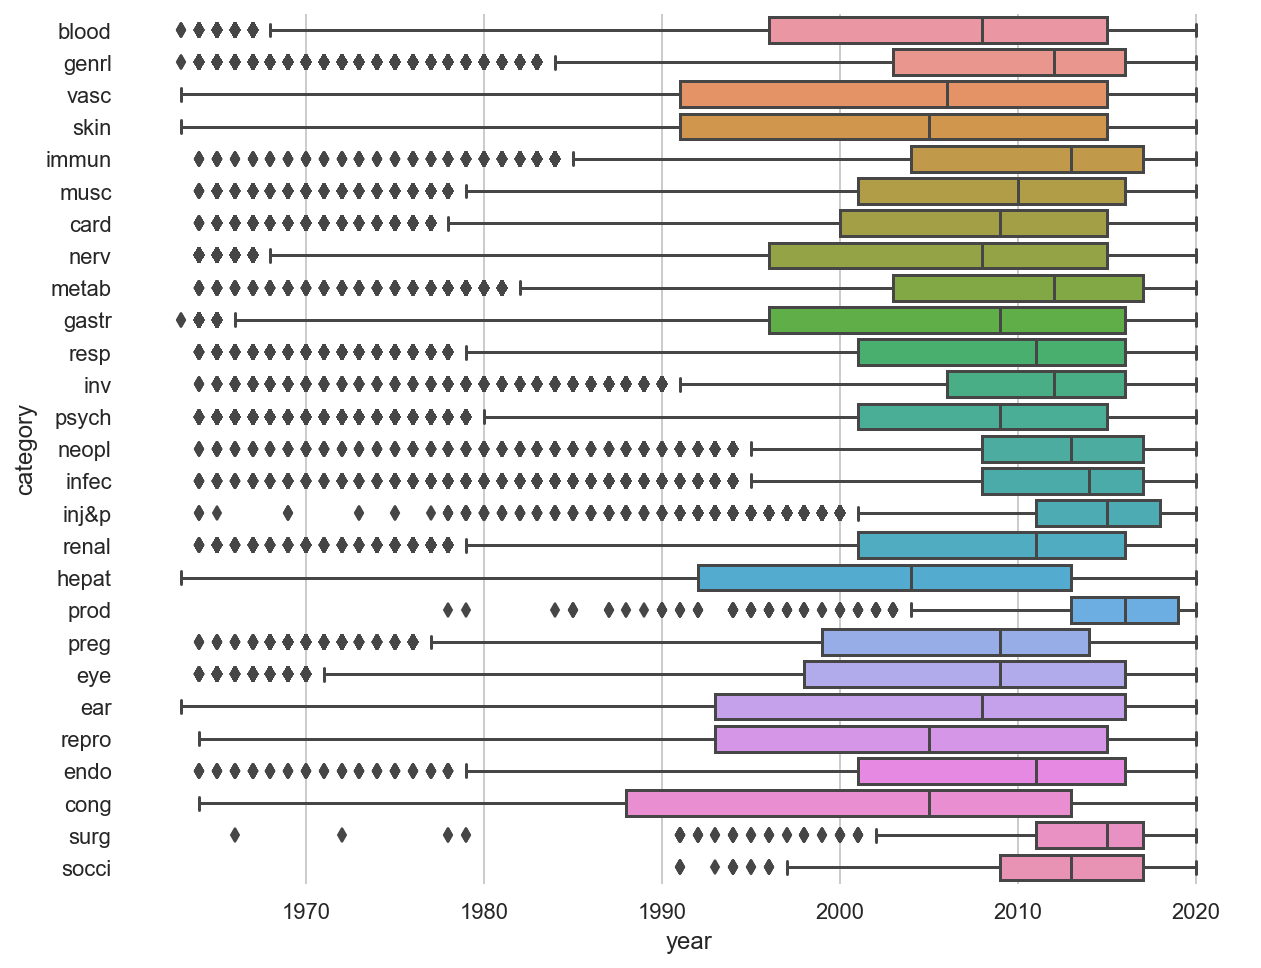

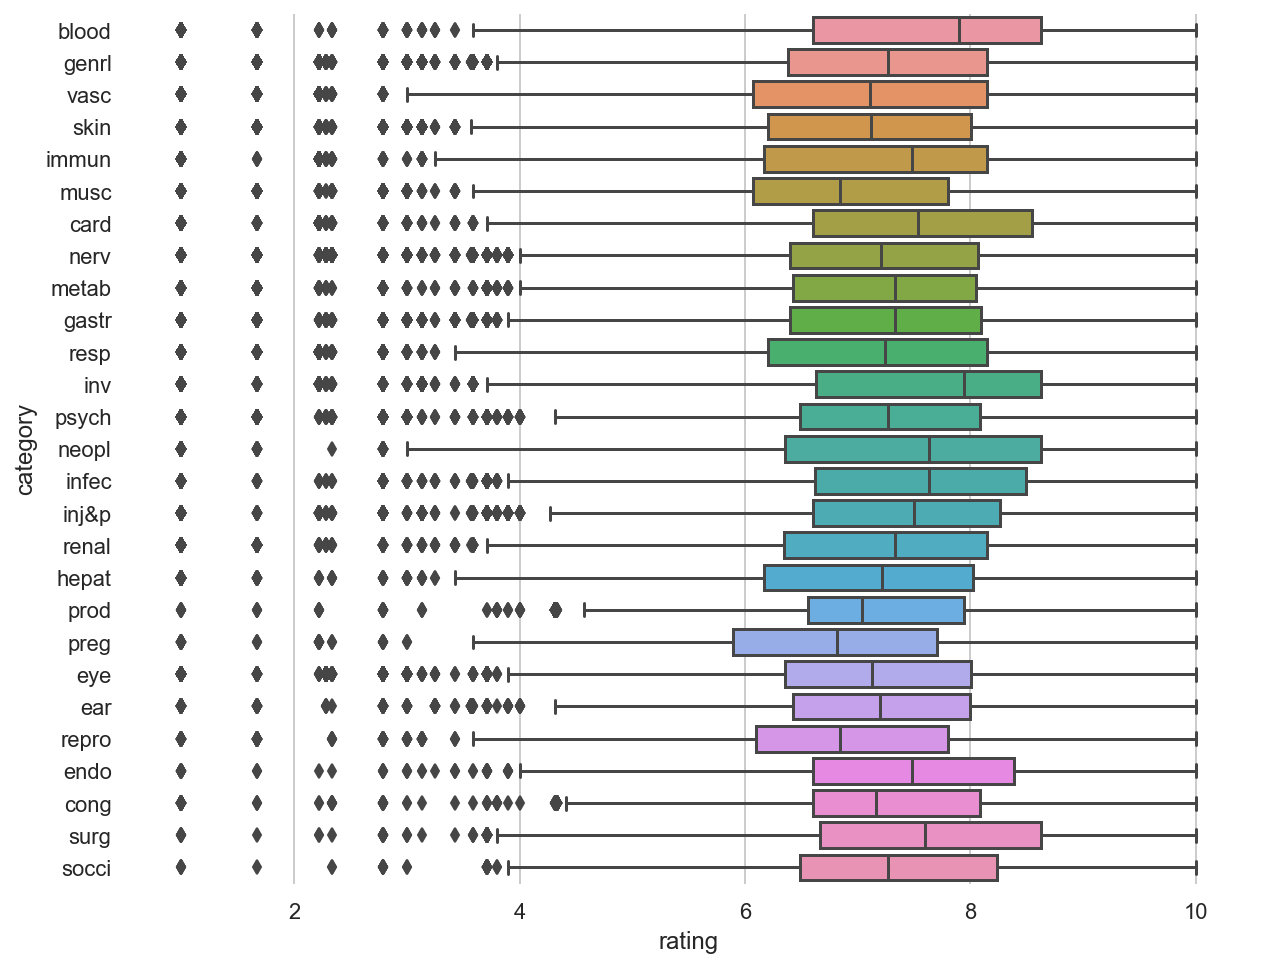

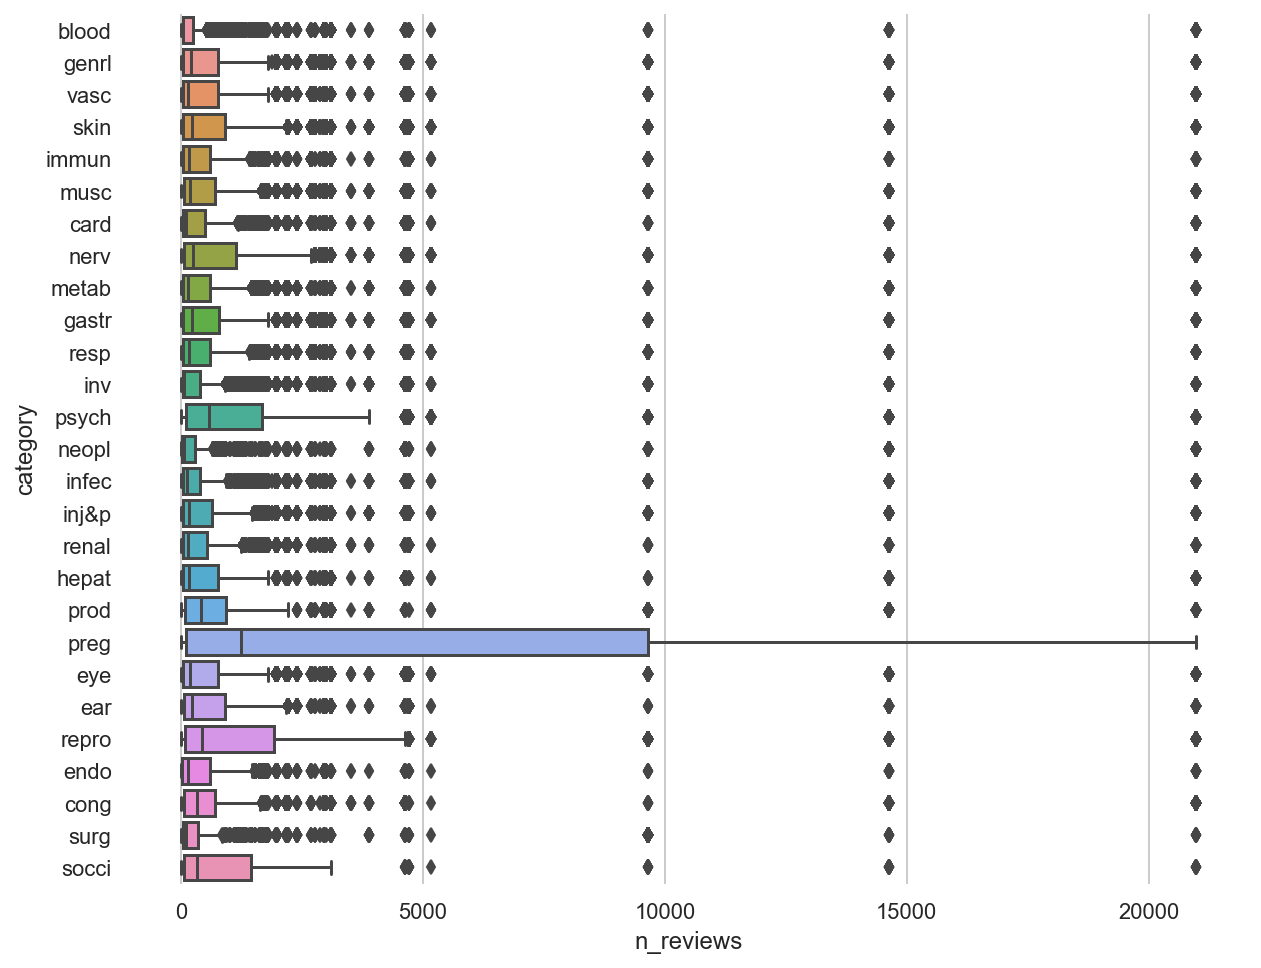

In [205]:
for col in nums:
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(10, 8))
    sns.despine(f, left=True, bottom=True)
    sns.boxplot(x=col, y='category', data=df, ax = ax)
    f.savefig(f'all_data/all_box_{col}_category.pdf')
    plt.show()

In [ ]:
# try with all data class weight balanced
# then undersample

In [31]:
df_final.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, side_effect to n_reviews
dtypes: object(13), float64(3)

In [32]:
df_final.head()

side_effect category  gender   age    year  sender is_consumer  \
0  acute kidney injury    renal  female  70.0  2011.0  direct           n   
1            diarrhoea    gastr  female  70.0  2011.0  direct           n   
2           hypophagia    metab  female  70.0  2011.0  direct           n   
3       abdominal pain    gastr  female  70.0  2012.0  direct           n   
4         constipation    gastr  female  70.0  2012.0  direct           n   

  is_hcp severity    db_id      drug  \
0      y        s  DB08916  afatinib   
1      y        s  DB08916  afatinib   
2      y        s  DB08916  afatinib   
3      y        s  DB08916  afatinib   
4      y        s  DB08916  afatinib   

                                              target  \
0  ['Epidermal growth factor receptor', 'Receptor...   
1  ['Epidermal growth factor receptor', 'Receptor...   
2  ['Epidermal growth factor receptor', 'Receptor...   
3  ['Epidermal growth factor receptor', 'Receptor...   
4  ['Epidermal growth factor receptor', 'Receptor...   

                        condition  \
0  ['non-small cell lung cancer']   
1  ['non-small cell lung cancer']   
2  ['non-small cell lung cancer']   
3  ['non-small cell lung cancer']   
4  ['non-small cell lung cancer']   

                                              review    rating  n_reviews  
0  ['"i started gilotrif/afatinib 7 days ago. i c...  8.333333          3  
1  ['"i started gilotrif/afatinib 7 days ago. i c...  8.333333          3  
2  ['"i started gilotrif/afatinib 7 days ago. i c...  8.333333          3  
3  ['"i started gilotrif/afatinib 7 days ago. i c...  8.333333          3  
4  ['"i started gilotrif/afatinib 7 days ago. i c...  8.333333          3

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.histplot(df_final['n_reviews'].compute(), ax = ax)
f.savefig('all_nreviews_hist.pdf');

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
df_final.severity.value_counts().compute()

s    1312723
n     336438
f     106058
Name: severity, dtype: int64

In [29]:
# subset into class 'f'
f = df_final[df_final.severity == 'f'].compute()
# sample class 'f' 1/10
sample_f = f.sample(frac = 0.1, random_state = 1)
len(sample_f)

10606

In [30]:
n = df_final[df_final.severity == 'n'].compute()
sample_n = n.sample(frac = 0.1, random_state = 1)
len(sample_n)

33644

In [31]:
s = df_final[df_final.severity == 's'].compute()
sample_s = s.sample(frac = 0.1, random_state = 1)
len(sample_s)

131272

In [32]:
df_sampled = pd.concat([f, n, s], axis = 0)
df_sampled.severity.value_counts()

s    1312723
n     336438
f     106058
Name: severity, dtype: int64

In [34]:
df_sampled.shape
# df_sampled.to_csv('df_sampled.csv', index = False)
# train test split
# under sample on train to get balanced class distributions

In [35]:
X = df_sampled.copy()
y = X.pop('severity')
# y = df_final.severity.copy()

In [205]:
X.db_id.value_counts()[X.db_id.value_counts() == 1].index

Index(['DB00949', 'DB00406', 'DB08938', 'DB08822', 'DB11156'], dtype='object')

In [68]:
X.columns

Index(['side_effect', 'category', 'gender', 'age', 'year', 'sender',
       'is_consumer', 'is_hcp', 'db_id', 'drug', 'target', 'condition',
       'rating', 'n_reviews'],
      dtype='object')

In [36]:
X.drop(columns = 'db_id', inplace = True)
X.drop(columns = 'drug', inplace = True)

In [37]:
X.fillna('na', inplace = True)
X.isnull().sum()

side_effect    0
category       0
gender         0
age            0
year           0
sender         0
is_consumer    0
is_hcp         0
target         0
condition      0
rating         0
n_reviews      0
dtype: int64

In [38]:
X.head()

side_effect category gender   age    year  sender  \
5                  diarrhoea    gastr   male  70.0  2012.0  direct   
6        disease progression    genrl   male  70.0  2012.0  direct   
7                   dyspnoea     resp   male  70.0  2012.0  direct   
8               haematemesis    gastr   male  70.0  2012.0  direct   
9  interstitial lung disease     resp   male  70.0  2012.0  direct   

  is_consumer is_hcp                                             target  \
5           n      y  ['Epidermal growth factor receptor', 'Receptor...   
6           n      y  ['Epidermal growth factor receptor', 'Receptor...   
7           n      y  ['Epidermal growth factor receptor', 'Receptor...   
8           n      y  ['Epidermal growth factor receptor', 'Receptor...   
9           n      y  ['Epidermal growth factor receptor', 'Receptor...   

                        condition    rating  n_reviews  
5  ['non-small cell lung cancer']  8.333333          3  
6  ['non-small cell lung cancer']  8.333333          3  
7  ['non-small cell lung cancer']  8.333333          3  
8  ['non-small cell lung cancer']  8.333333          3  
9  ['non-small cell lung cancer']  8.333333          3

In [39]:
X.side_effect.value_counts()

rash                               36221
nausea                             34678
headache                           31725
dizziness                          29472
diarrhoea                          25844
                                   ...  
pulmonary artery occlusion             1
pancreatic enlargement                 1
autoimmune dermatitis                  1
early onset primary dystonia           1
external ear neoplasm malignant        1
Name: side_effect, Length: 10155, dtype: int64

In [40]:
# train test split
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1404175, 12) (1404175,)
(351044, 12) (351044,)


In [73]:
y_train.value_counts()

s    1050178
n     269150
f      84847
Name: severity, dtype: int64

In [74]:
y_test.value_counts()

s    262545
n     67288
f     21211
Name: severity, dtype: int64

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
# undersample
rus = RandomUnderSampler(random_state = 1)
rus.fit(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [44]:
y_train.value_counts(normalize = True)

n    0.333333
s    0.333333
f    0.333333
Name: severity, dtype: float64

In [45]:
y_test.value_counts(normalize = True)

s    0.747898
n    0.191680
f    0.060423
Name: severity, dtype: float64

In [ ]:
# process reviews first then join to X_us

In [46]:
X_train.columns

Index(['side_effect', 'category', 'gender', 'age', 'year', 'sender',
       'is_consumer', 'is_hcp', 'target', 'condition', 'rating', 'n_reviews'],
      dtype='object')

In [53]:
# nums.append('n_reviews')
nums

['age', 'year', 'rating', 'n_reviews']

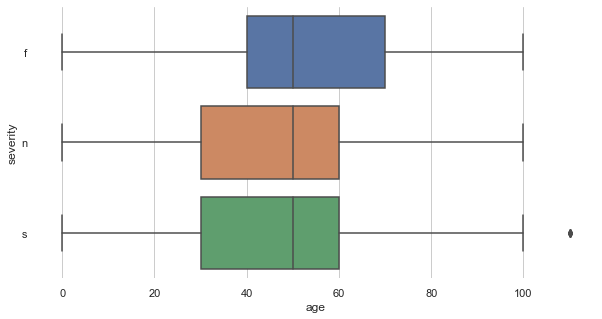

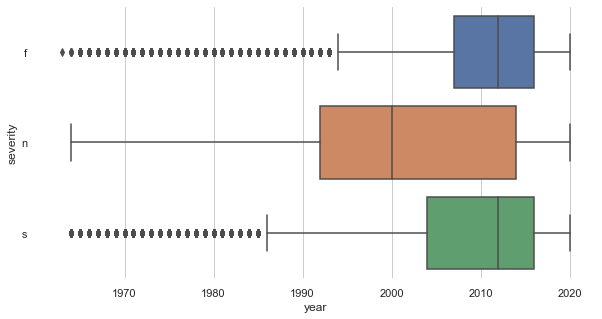

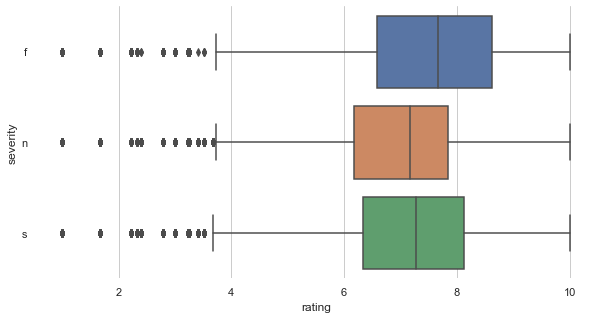

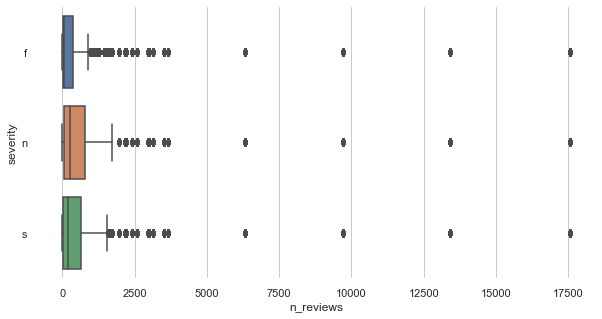

In [141]:
for num in nums:
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(10, 5))
    sns.despine(f, left=True, bottom=True)
    sns.boxplot(x=X[num].values, y=y, ax = ax)
    plt.xlabel(f'{num}')
    plt.show()
    f.savefig(f'sampled_box_{num}_severity.pdf');

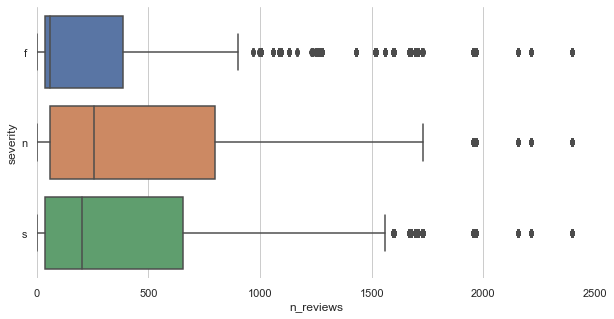

In [145]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.boxplot(x=X_us['n_reviews'].values, y=y_us, ax = ax)
plt.xlabel('n_reviews')
plt.xlim([0, 2500])
plt.show()
f.savefig('sampled_box_n_reviews_severity.pdf');

In [232]:
cats

['category', 'gender', 'age', 'sender', 'is_consumer', 'is_hcp', 'drug']

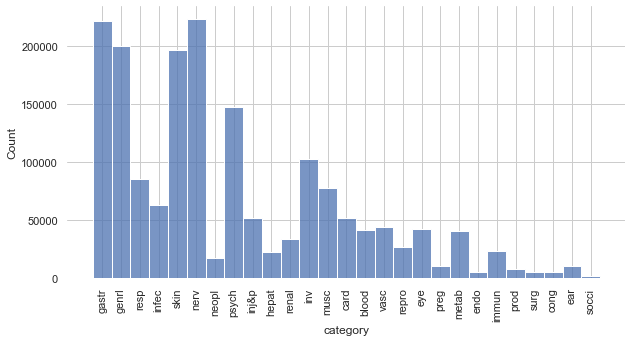

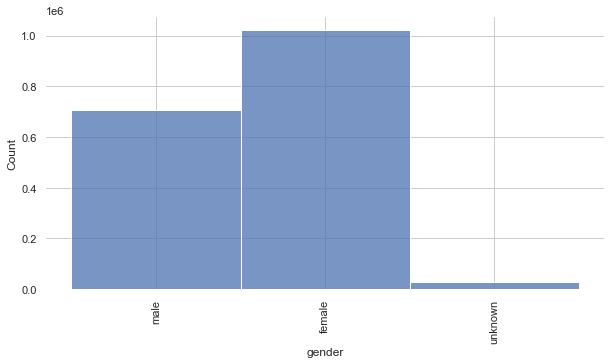

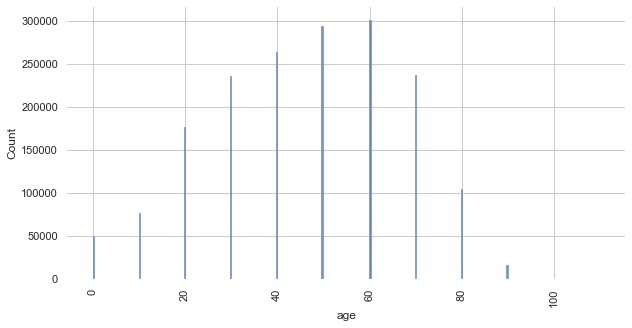

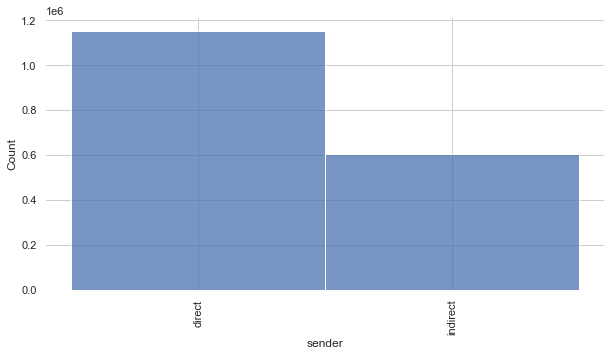

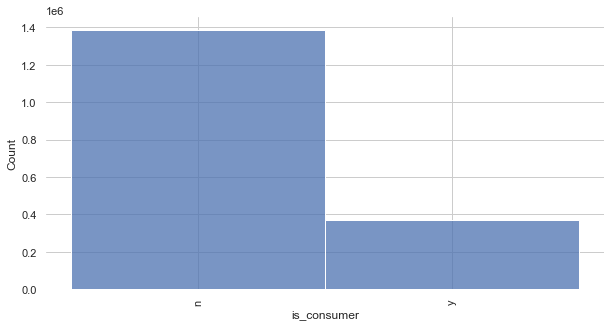

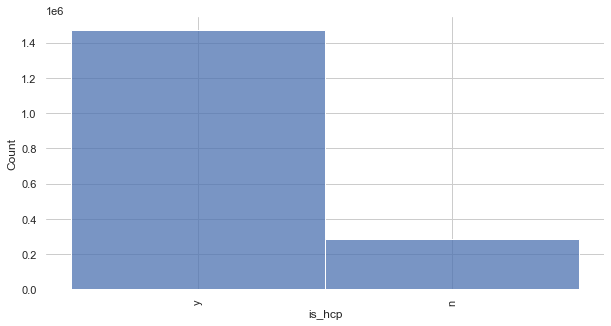

In [148]:
for cat in cats:
    f, ax = plt.subplots(figsize=(10, 5))
    sns.despine(f, left=True, bottom=True)
    sns.histplot(X[cat], ax = ax)
    plt.xticks(rotation = 90)
    f.savefig(f'sampled_{cat}_hist.pdf')
    plt.show()

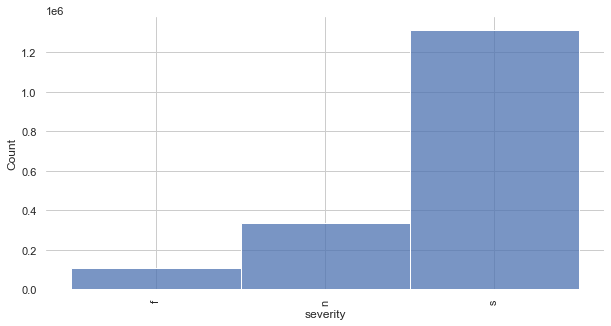

In [149]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f, left=True, bottom=True)
sns.histplot(y, ax = ax)
plt.xticks(rotation = 90)
f.savefig('sampled_severity_hist.pdf')
plt.show()

In [73]:
# X_us.to_csv('undersampled_X.csv')
# y_us.to_csv('undersampled_y.csv')

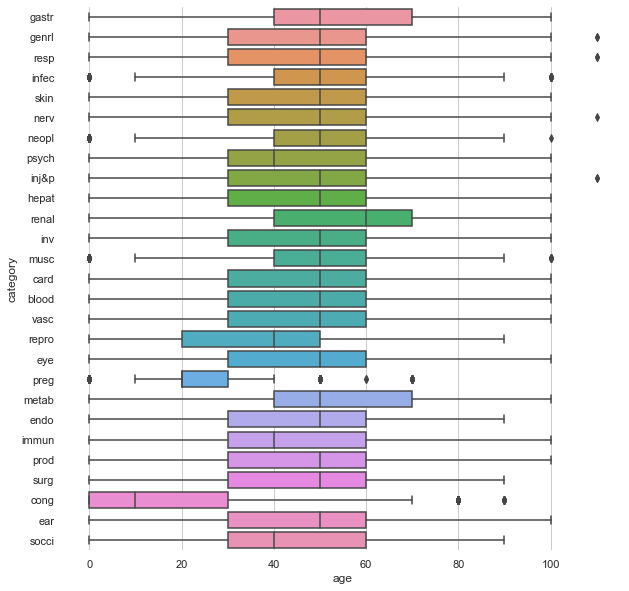

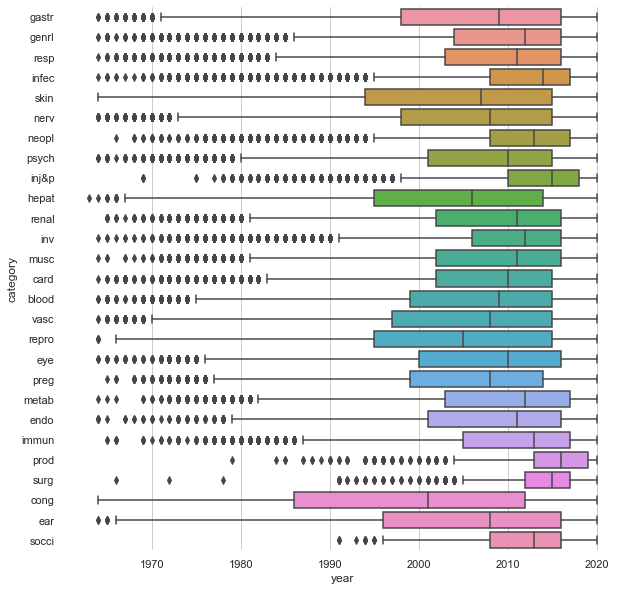

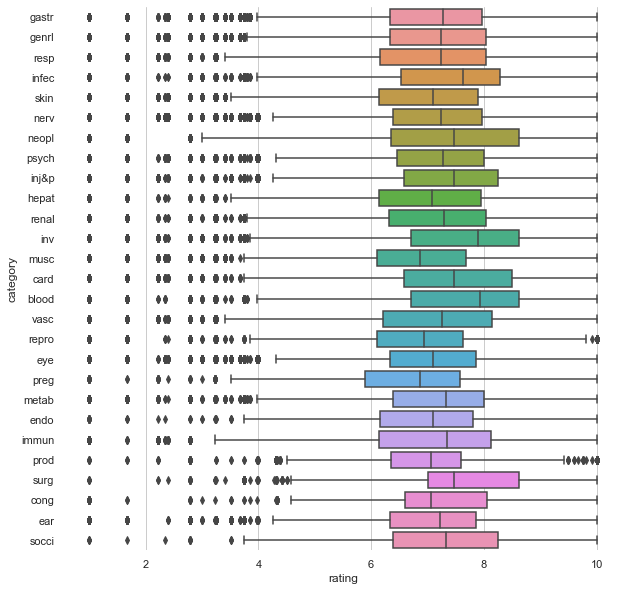

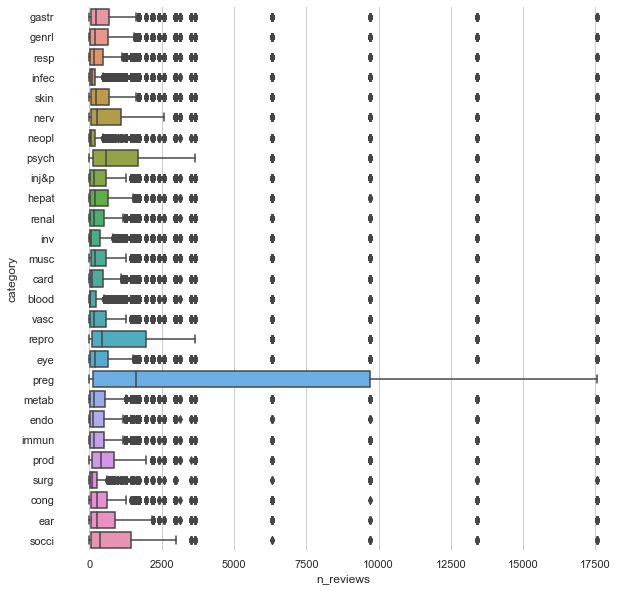

In [150]:
for num in nums:
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(10, 10))
    sns.despine(f, left=True, bottom=True)
    sns.boxplot(x=X[num].values, y=X.category, ax = ax)
    plt.xlabel(f'{num}')
    plt.show()
    f.savefig(f'sampled_box_{num}_category.pdf');

In [80]:
# baseline accuracy
y_test.value_counts(normalize = True)

s    0.747898
n    0.191680
f    0.060423
Name: severity, dtype: float64

In [47]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [48]:
# make custom stopwords list for cvec and tvec
# appeared top when trialing but meaningless
cvec = CountVectorizer(stop_words = 'english')
stopwords = list(cvec.get_stop_words())
stopwords.extend(['nan', 'listed', 'othe', 've', 'mg', 'like',
                  'just', 'did', 'don', 'receptor'])

# create count vectorizer for condition column
cvec_condition = CountVectorizer(stop_words = stopwords,
                       max_features = 10000,
                       strip_accents = 'unicode',
                       lowercase = True,
                       decode_error = 'replace',
                       ngram_range = (2, 2),
                       min_df = 0.02)

# create count vectorizer for side_effect column
cvec_se = CountVectorizer(stop_words = stopwords,
                       max_features = 10000,
                       strip_accents = 'unicode',
                       lowercase = True,
                       decode_error = 'replace',
                       ngram_range = (2, 2),
                       min_df = 0.001)

# create count vectorizer for target column
cvec_target = CountVectorizer(stop_words = stopwords,
                       max_features = 10000,
                       strip_accents = 'unicode',
                       lowercase = True,
                       decode_error = 'replace',
                       ngram_range = (2, 2),
                       min_df = 0.001)


# # create tfidf vectorizer for review column
# tvec_review = TfidfVectorizer(stop_words = stopwords,
#                        max_features = 10000,
#                        norm = 'l2', 
#                        strip_accents = 'unicode',
#                        lowercase = True,
#                        decode_error = 'replace',
#                        ngram_range = (2, 2),
#                        min_df = 0.4,
#                        max_df = 0.9)

# create onehotencoder for all categorical columns
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

# create scaler 
scaler = MinMaxScaler()

In [84]:
# db_id not needed for modelling
# X.drop(columns = 'db_id', inplace = True)
X_train.columns

Index(['side_effect', 'category', 'gender', 'age', 'year', 'sender',
       'is_consumer', 'is_hcp', 'target', 'condition', 'rating', 'n_reviews'],
      dtype='object')

In [51]:
# create column transformer
col_trans = ColumnTransformer([('categories', one_hot, cats),
                               ('side_effects', cvec_se, 'side_effect'),
                               ('conditions', cvec_condition, 'condition'),
                               ('targets', cvec_target, 'target')
                               #('reviews', tvec_review, 'review')
                              ],
                              remainder = 'passthrough',
                              sparse_threshold = 0)

In [52]:
# make pipeline for just preprocessing
# make new one with model and grid search after trialing different models

pipe = Pipeline(steps=[('coltrans', col_trans),
                       ('scaler', scaler)])

In [87]:
# diplay pipeline
from sklearn import set_config
set_config(display='diagram')   
pipe

Pipeline(steps=[('coltrans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'gender', 'age',
                                                   'sender', 'is_consumer',
                                                   'is_hcp']),
                                                 ('side_effects',
                                                  CountVectorizer(decode_error='replace',
                                                                  max_features=10000,
                                                                  min_df=0.01,
                                                                  ngram_range=(2,
                                                                               2),
                                                                  stop_words=['inc...
                                                                  min_df=0.001,
                                                                  ngram_range=(2,
                                                                               2),
                                                                  stop_words=['inc',
                                                                              'nobody',
                                                                              'part',
                                                                              'thereupon',
                                                                              'whereby',
                                                                              'bottom',
                                                                              'whereupon',
                                                                              'these',
                                                                              'by',
                                                                              'thence',
                                                                              'else',
                                                                              'herself',
                                                                              'afterwards',
                                                                              'hence',
                                                                              'bill',
                                                                              'if',
                                                                              'against',
                                                                              'a',
                                                                              'and',
                                                                              'where',
                                                                              're',
                                                                              'you',
                                                                              'namely',
                                                                              'seeming',
                                                                              'those',
                                                                              'off',
                                                                              'via',
                                                                              'other',
                                                                              'anywhere',
                                                                              'cannot', ...],
    

In [2]:
import joblib

In [54]:
# try pipeline with dask

with joblib.parallel_backend('dask'):
    # fit transform X_train
    X_train_processed = pipe.fit_transform(X_train)

In [55]:
X_train_processed = pd.DataFrame(X_train_processed, columns = pipe.named_steps['coltrans'].get_feature_names())

In [56]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254541 entries, 0 to 254540
Columns: 1565 entries, categories__x0_blood to n_reviews
dtypes: float64(1565)
memory usage: 3.0 GB


In [57]:
X_train_processed.head()

categories__x0_blood  categories__x0_card  categories__x0_cong  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   

   categories__x0_ear  categories__x0_endo  categories__x0_eye  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2                 0.0                  0.0                 0.0   
3                 0.0                  0.0                 0.0   
4                 0.0                  0.0                 0.0   

   categories__x0_gastr  categories__x0_genrl  categories__x0_hepat  \
0                   1.0                   0.0                   0.0   
1                   0.0                   1.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   categories__x0_immun  ...  targets__vesicular protein  targets__virus type  \
0                   0.0  ...                         0.0                  0.0   
1                   0.0  ...                         0.0                  0.0   
2                   0.0  ...                         0.0                  0.0   
3                   0.0  ...                         0.0                  0.0   
4                   0.0  ...                         0.0                  0.0   

   targets__vitamin epoxide  targets__voltage dependent  \
0                       0.0                       0.000   
1                       0.0                       0.000   
2                       0.0                       0.125   
3                       0.0                       0.000   
4                       1.0                       0.000   

   targets__voltage gated  targets__xanthine dehydrogenase  \
0                     0.0                              0.0   
1                     0.0                              0.0   
2                     0.0                              0.0   
3                     0.0                              0.0   
4                     0.0                              0.0   

   targets__xylose isomerase      year    rating  n_reviews  
0                        0.0  0.929825  0.814081   0.005758  
1                        0.0  0.964912  0.841868   0.096625  
2                        0.0  0.771930  0.597935   0.023201  
3                        0.0  0.771930  0.741742   0.004218  
4                        0.0  0.912281  0.806100   0.002907  

[5 rows x 1565 columns]

In [61]:
[col for col in X_train_processed.columns if 'side_effects' in col]

['side_effects__abdominal discomfort',
 'side_effects__abdominal distension',
 'side_effects__abdominal pain',
 'side_effects__abnormal dreams',
 'side_effects__acute hepatic',
 'side_effects__acute kidney',
 'side_effects__alanine aminotransferase',
 'side_effects__aminotransferase increased',
 'side_effects__anaphylactic reaction',
 'side_effects__antipsychotic drug',
 'side_effects__aplastic anaemia',
 'side_effects__application site',
 'side_effects__arteriosclerosis coronary',
 'side_effects__atrial fibrillation',
 'side_effects__balance disorder',
 'side_effects__blood cell',
 'side_effects__blood pressure',
 'side_effects__burning sensation',
 'side_effects__cardiac arrest',
 'side_effects__cardiac failure',
 'side_effects__cell count',
 'side_effects__cerebral haemorrhage',
 'side_effects__cerebrovascular accident',
 'side_effects__chest discomfort',
 'side_effects__chest pain',
 'side_effects__chronic obstructive',
 'side_effects__circulatory collapse',
 'side_effects__clonic 

In [62]:
 # transform X_test
with joblib.parallel_backend('dask'):
    X_test_processed = pipe.transform(X_test)

In [63]:
X_test_processed = pd.DataFrame(X_test_processed, columns = pipe.named_steps['coltrans'].get_feature_names())
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351044 entries, 0 to 351043
Columns: 1565 entries, categories__x0_blood to n_reviews
dtypes: float64(1565)
memory usage: 4.1 GB


In [64]:
X_test_processed.shape, y_test.shape

((351044, 1565), (351044,))

In [65]:
X_train_processed.shape, y_train.shape

((254541, 1565), (254541,))

In [66]:
# X_train_processed.to_csv('X_train_processed_2.csv', index = False)
# X_test_processed.to_csv('X_test_processed_2.csv', index = False)
# y_train.to_csv('y_train_2.csv', index = False)
# y_test.to_csv('y_test_2.csv', index = False)

In [31]:
X_train_processed = pd.read_csv('X_train_processed_2.csv')
X_test_processed = pd.read_csv('X_test_processed_2.csv')
y_train = pd.read_csv('y_train_2.csv')
y_test = pd.read_csv('y_test_2.csv')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [72]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train_processed, y_train)
print(cross_val_score(lr, X_train_processed, y_train, cv = 5).mean())

0.6989758048293094


In [181]:
# create logistic regression model
lr = LogisticRegression(max_iter = 100000)

# create params grid
gs_params = {'penalty': ['l2'],
             'solver': ['saga'],
             'C': np.logspace(-3, 2, 10),
             'multi_class': ['ovr', 'multinomial']}

# create gridsearch
lr_grid = GridSearchCV(lr, gs_params, n_jobs = 2, cv = 3, verbose = 3)
# fit gridsearch on training data
lr_grid.fit(X_train_processed, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 179.4min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed: 3600.9min finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000), n_jobs=2,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['saga']},
             verbose=3)

In [182]:
# assign best estimator
best_lr = lr_grid.best_estimator_

In [183]:
joblib.dump(best_lr, 'best_lr.jlib')
# best_lr = joblib.load('best_lr.jlib')

['best_lr.jlib']

In [184]:
# print best params
print('Logreg best parameters: ', lr_grid.best_params_)
# print CV score
print('Best Score: ', lr_grid.best_score_)
# print training score
print('Training Score: ', lr_grid.score(X_train_processed, y_train))
# score best estimator on testing data
print('Test Score: ', lr_grid.score(X_test_processed, y_test))

# create a dataframe to look at the coefficients for class 0
coef_lr = pd.DataFrame({'feature': X_train_processed.columns,
                        'coef': best_lr.coef_[0],
                        'abs_coef': np.abs(best_lr.coef_[0])})

# sort by absolute value of coefficient (magnitude)
coef_lr.sort_values('abs_coef', ascending = False, inplace = True)
coef_lr.head()

Logreg best parameters:  {'C': 100.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
Best Score:  0.6996476009758742
Training Score:  0.7027512267178961
Test Score:  0.5541014801563336


feature       coef   abs_coef
594   targets__carbonic anhydrase -19.865018  19.865018
435     targets__alpha adrenergic -19.680641  19.680641
1438       targets__subunit alpha  16.989565  16.989565
411     targets__adrenergic alpha  15.575928  15.575928
293     conditions__nsaid induced -15.241483  15.241483

In [202]:
# joblib.dump(best_lr, 'best_lr.jlib')

['best_lr.jlib']

In [196]:
best_lr.classes_

array(['f', 'n', 's'], dtype=object)

<AxesSubplot:ylabel='feature'>

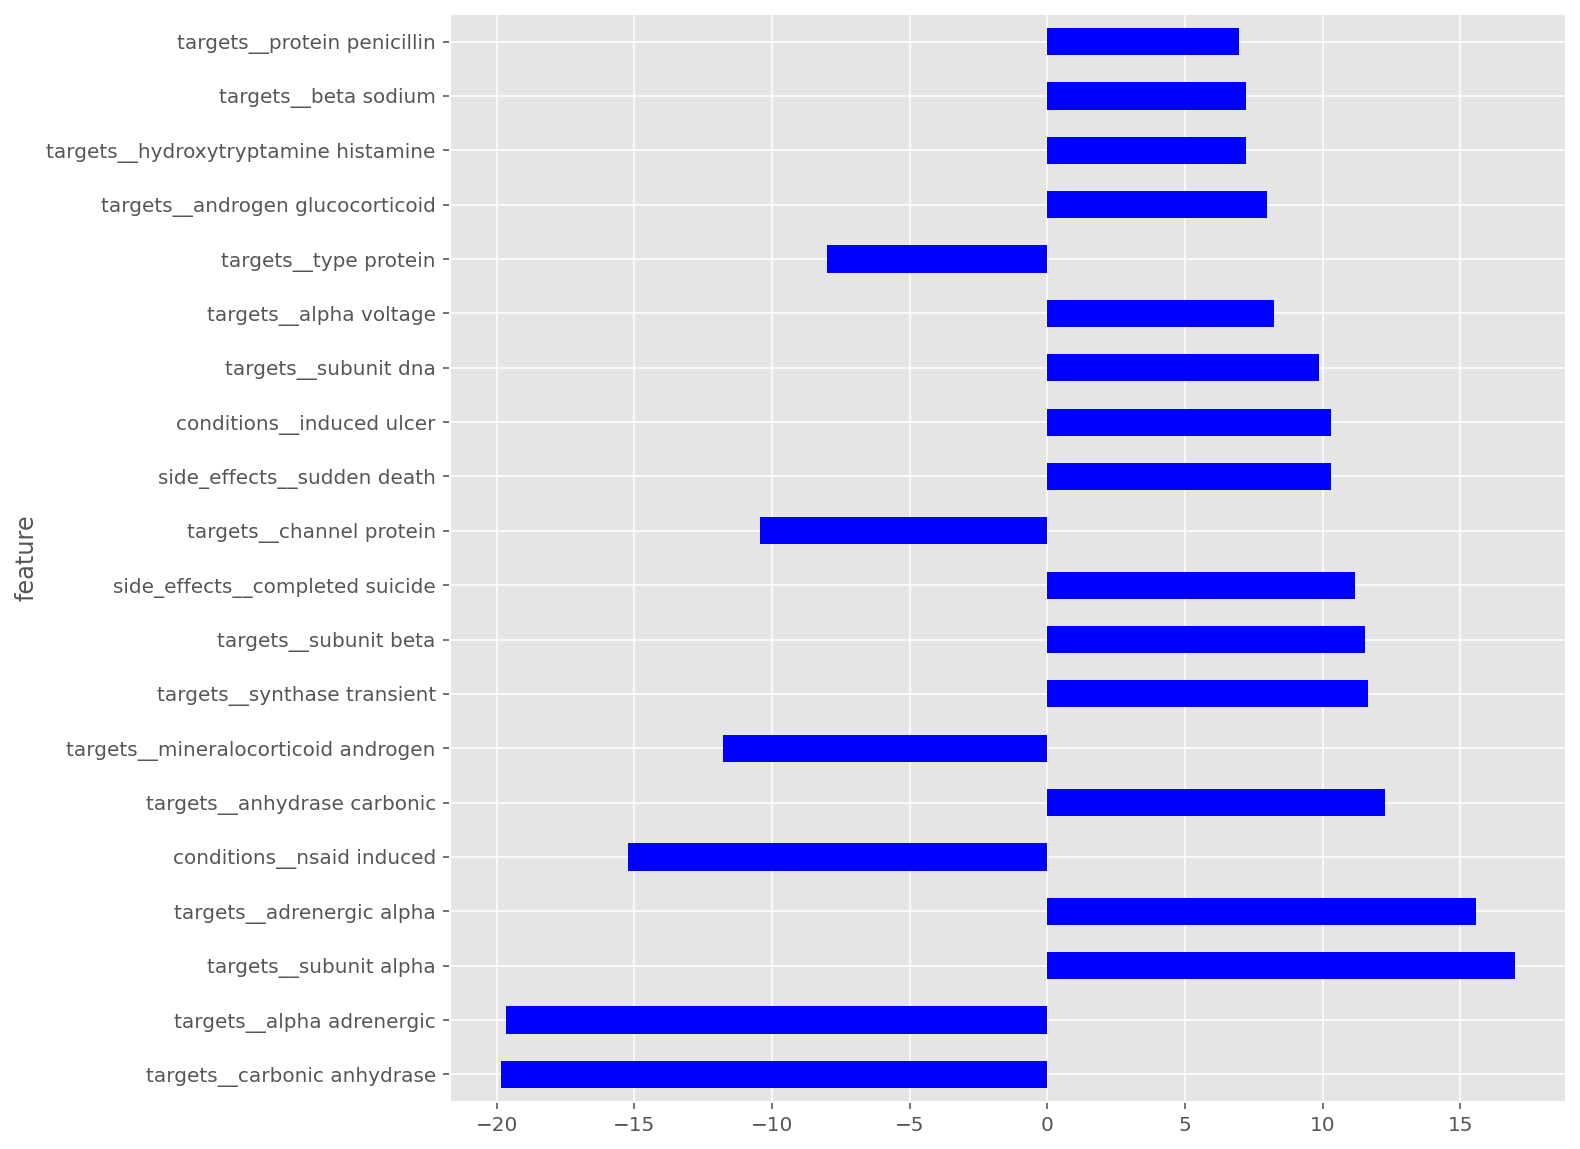

In [199]:
coef_lr.set_index('feature', inplace = True)
coef_lr.coef.head(20).plot(kind = 'barh', figsize = (10,10), color = 'b')

<AxesSubplot:ylabel='feature'>

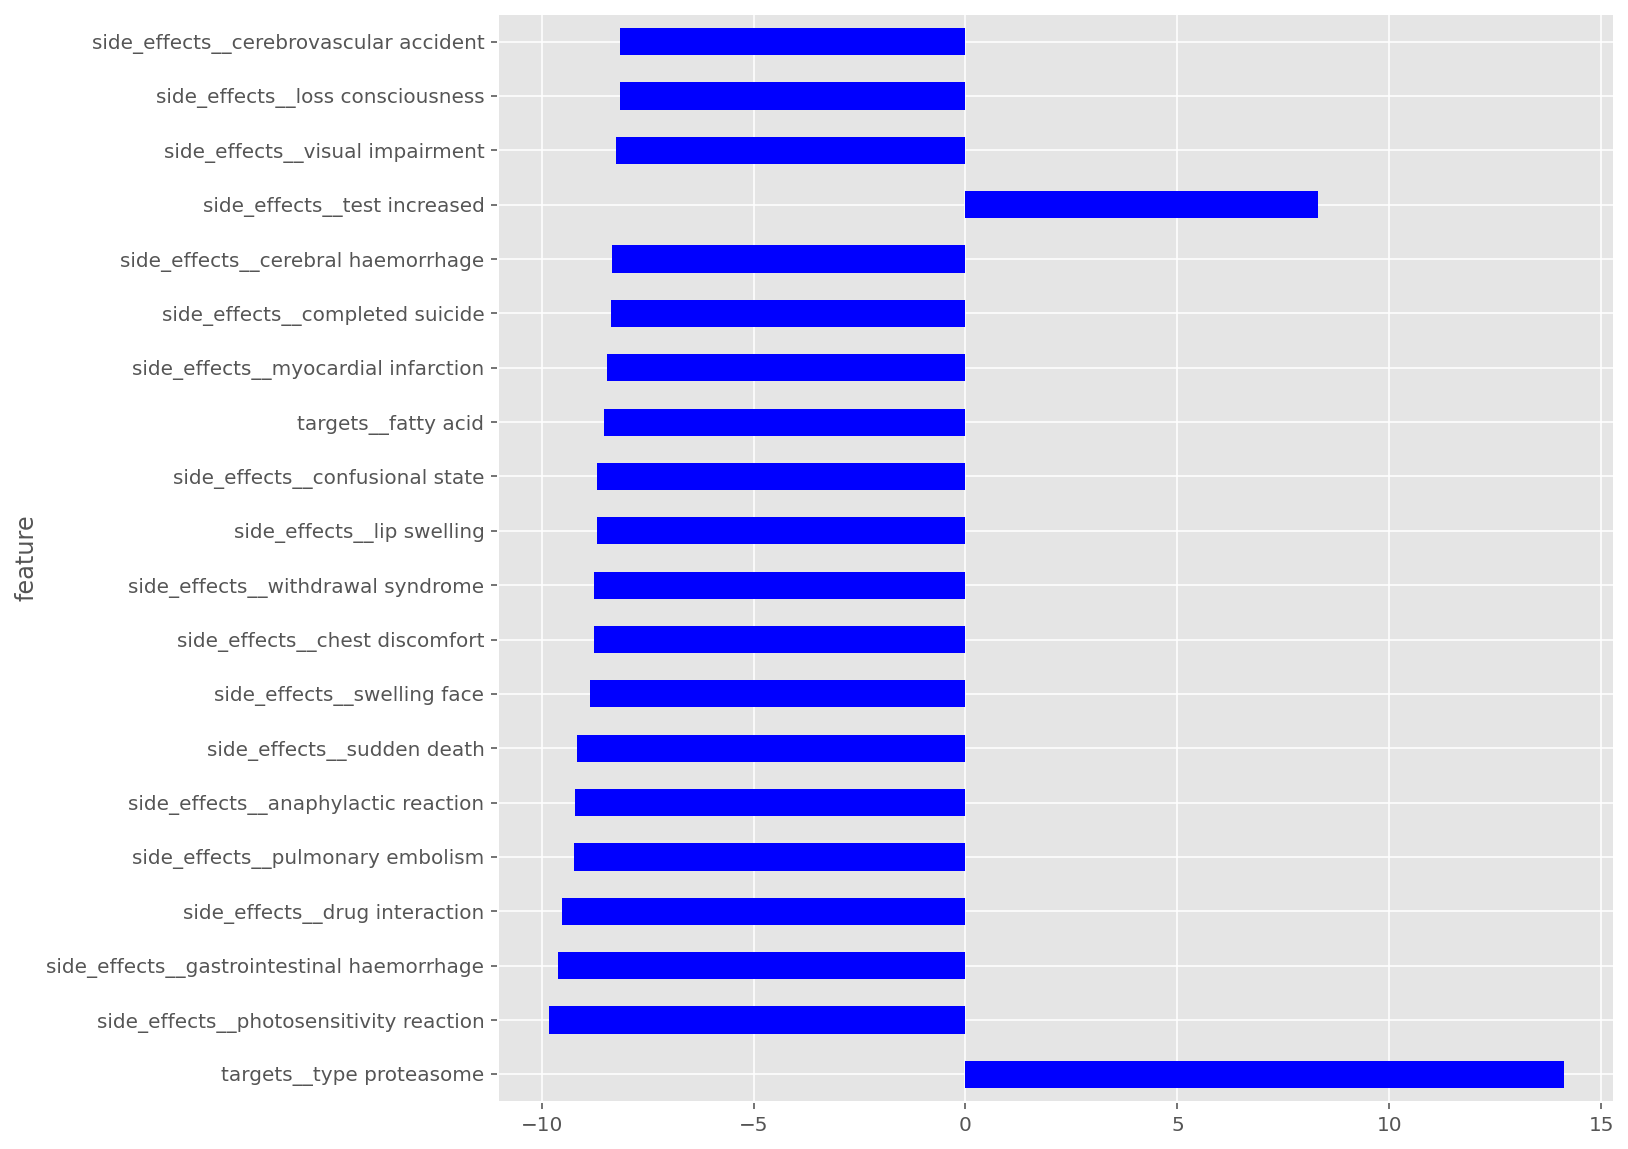

In [200]:
coef_lr_n = pd.DataFrame({'feature': X_train_processed.columns,
                        'coef': best_lr.coef_[1],
                        'abs_coef': np.abs(best_lr.coef_[1])})

# sort by absolute value of coefficient (magnitude)
coef_lr_n.sort_values('abs_coef', ascending = False, inplace = True)
coef_lr_n.set_index('feature', inplace = True)
coef_lr_n.coef.head(20).plot(kind = 'barh', figsize = (10,10), color = 'b')

<AxesSubplot:ylabel='feature'>

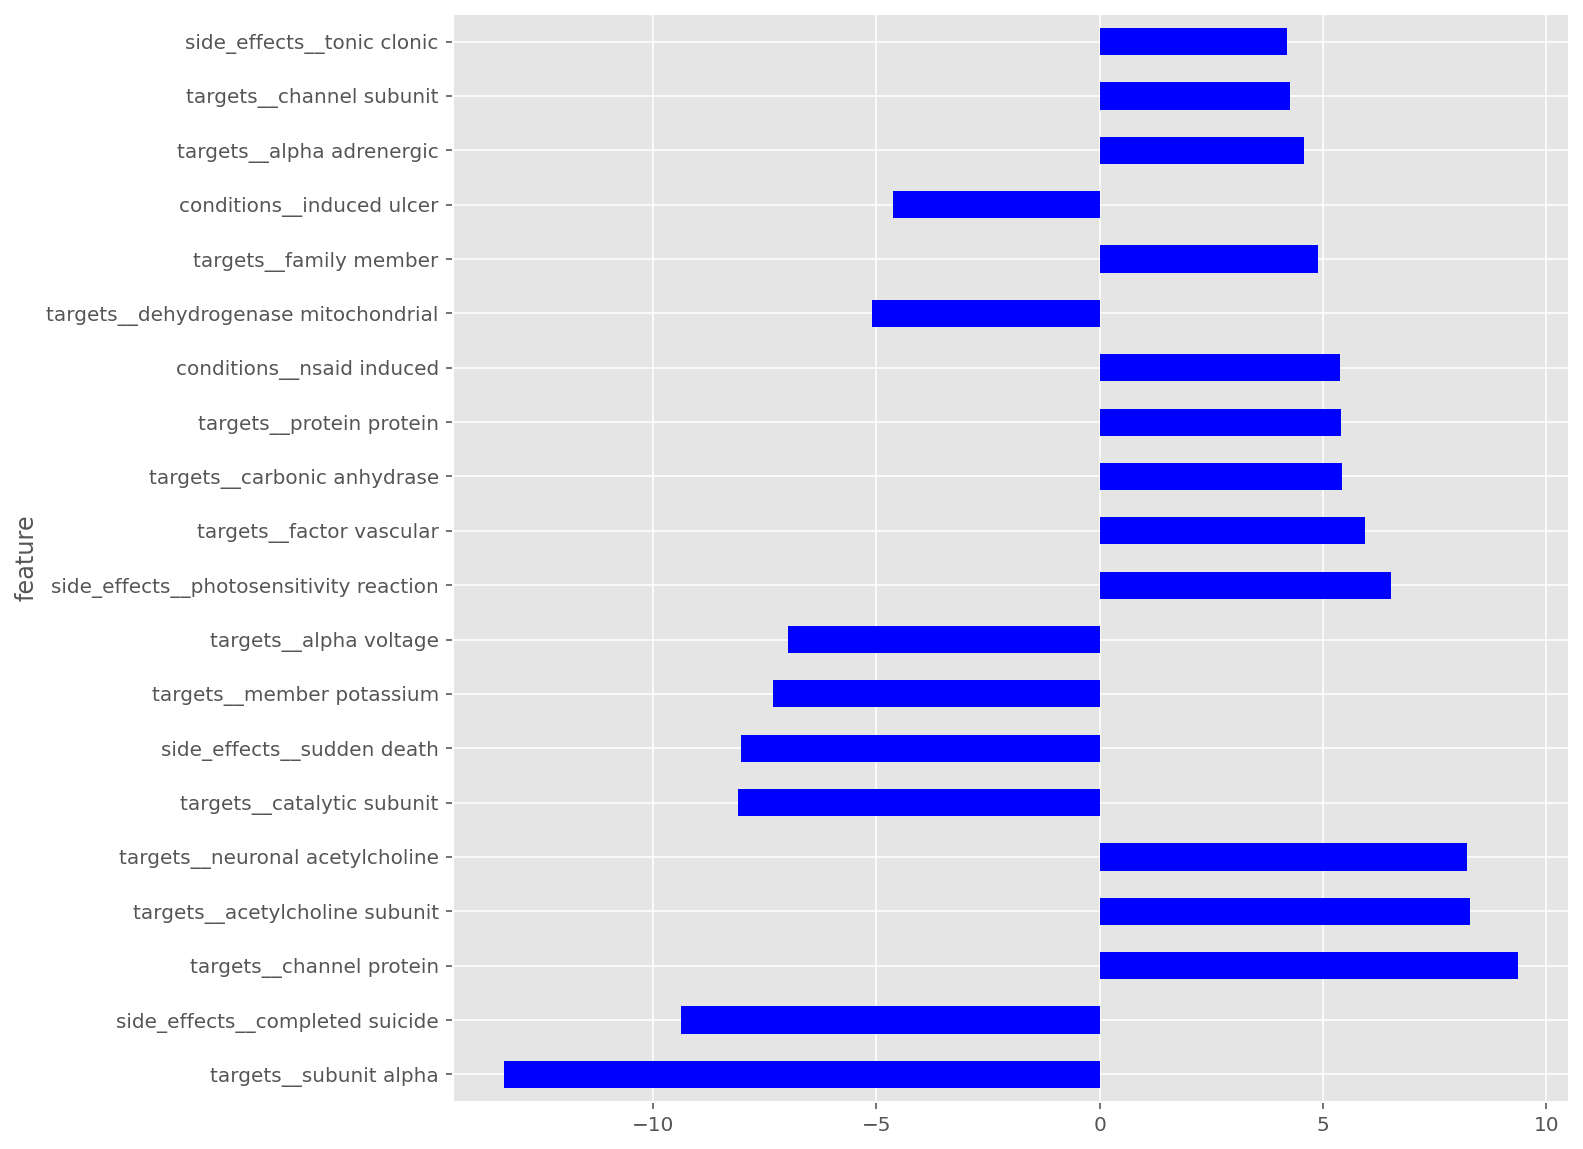

In [201]:
coef_lr_s = pd.DataFrame({'feature': X_train_processed.columns,
                        'coef': best_lr.coef_[2],
                        'abs_coef': np.abs(best_lr.coef_[2])})

# sort by absolute value of coefficient (magnitude)
coef_lr_s.sort_values('abs_coef', ascending = False, inplace = True)
coef_lr_s.set_index('feature', inplace = True)
coef_lr_s.coef.head(20).plot(kind = 'barh', figsize = (10,10), color = 'b')

              precision    recall  f1-score   support

           f       0.78      0.73      0.75     90797
           n       0.86      0.72      0.79    101615
           s       0.47      0.64      0.54     62129

    accuracy                           0.70    254541
   macro avg       0.70      0.70      0.69    254541
weighted avg       0.74      0.70      0.71    254541



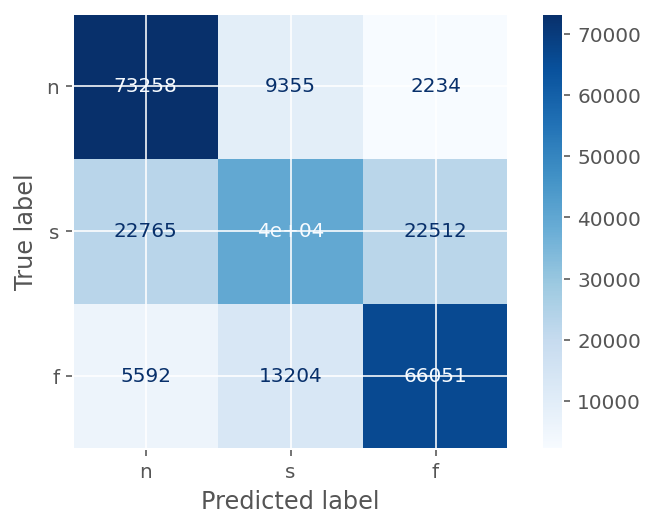

In [185]:
print(classification_report(best_lr.predict(X_train_processed), y_train))
plot_confusion_matrix(best_lr, X_train_processed,  y_train, labels = ['n', 's', 'f'], cmap = 'Blues')

              precision    recall  f1-score   support

           f       0.77      0.18      0.30     89698
           n       0.86      0.44      0.59    130244
           s       0.46      0.92      0.61    131102

    accuracy                           0.55    351044
   macro avg       0.70      0.51      0.50    351044
weighted avg       0.69      0.55      0.52    351044



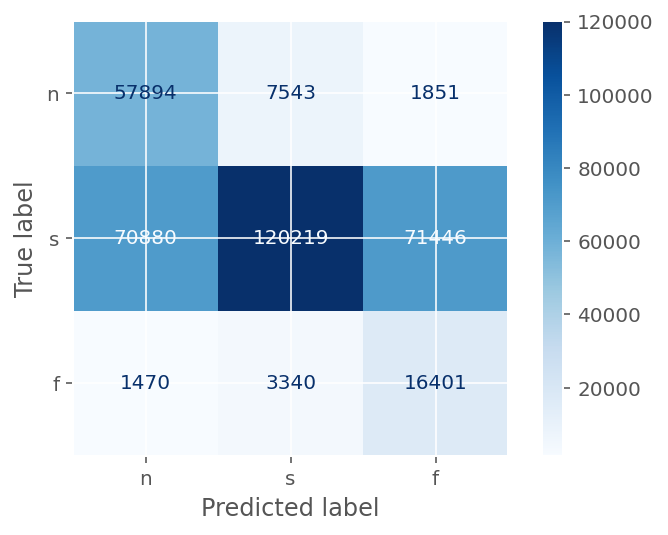

In [186]:
print(classification_report(best_lr.predict(X_test_processed), y_test))
plot_confusion_matrix(best_lr, X_test_processed,  y_test, labels = ['n', 's', 'f'], cmap = 'Blues')

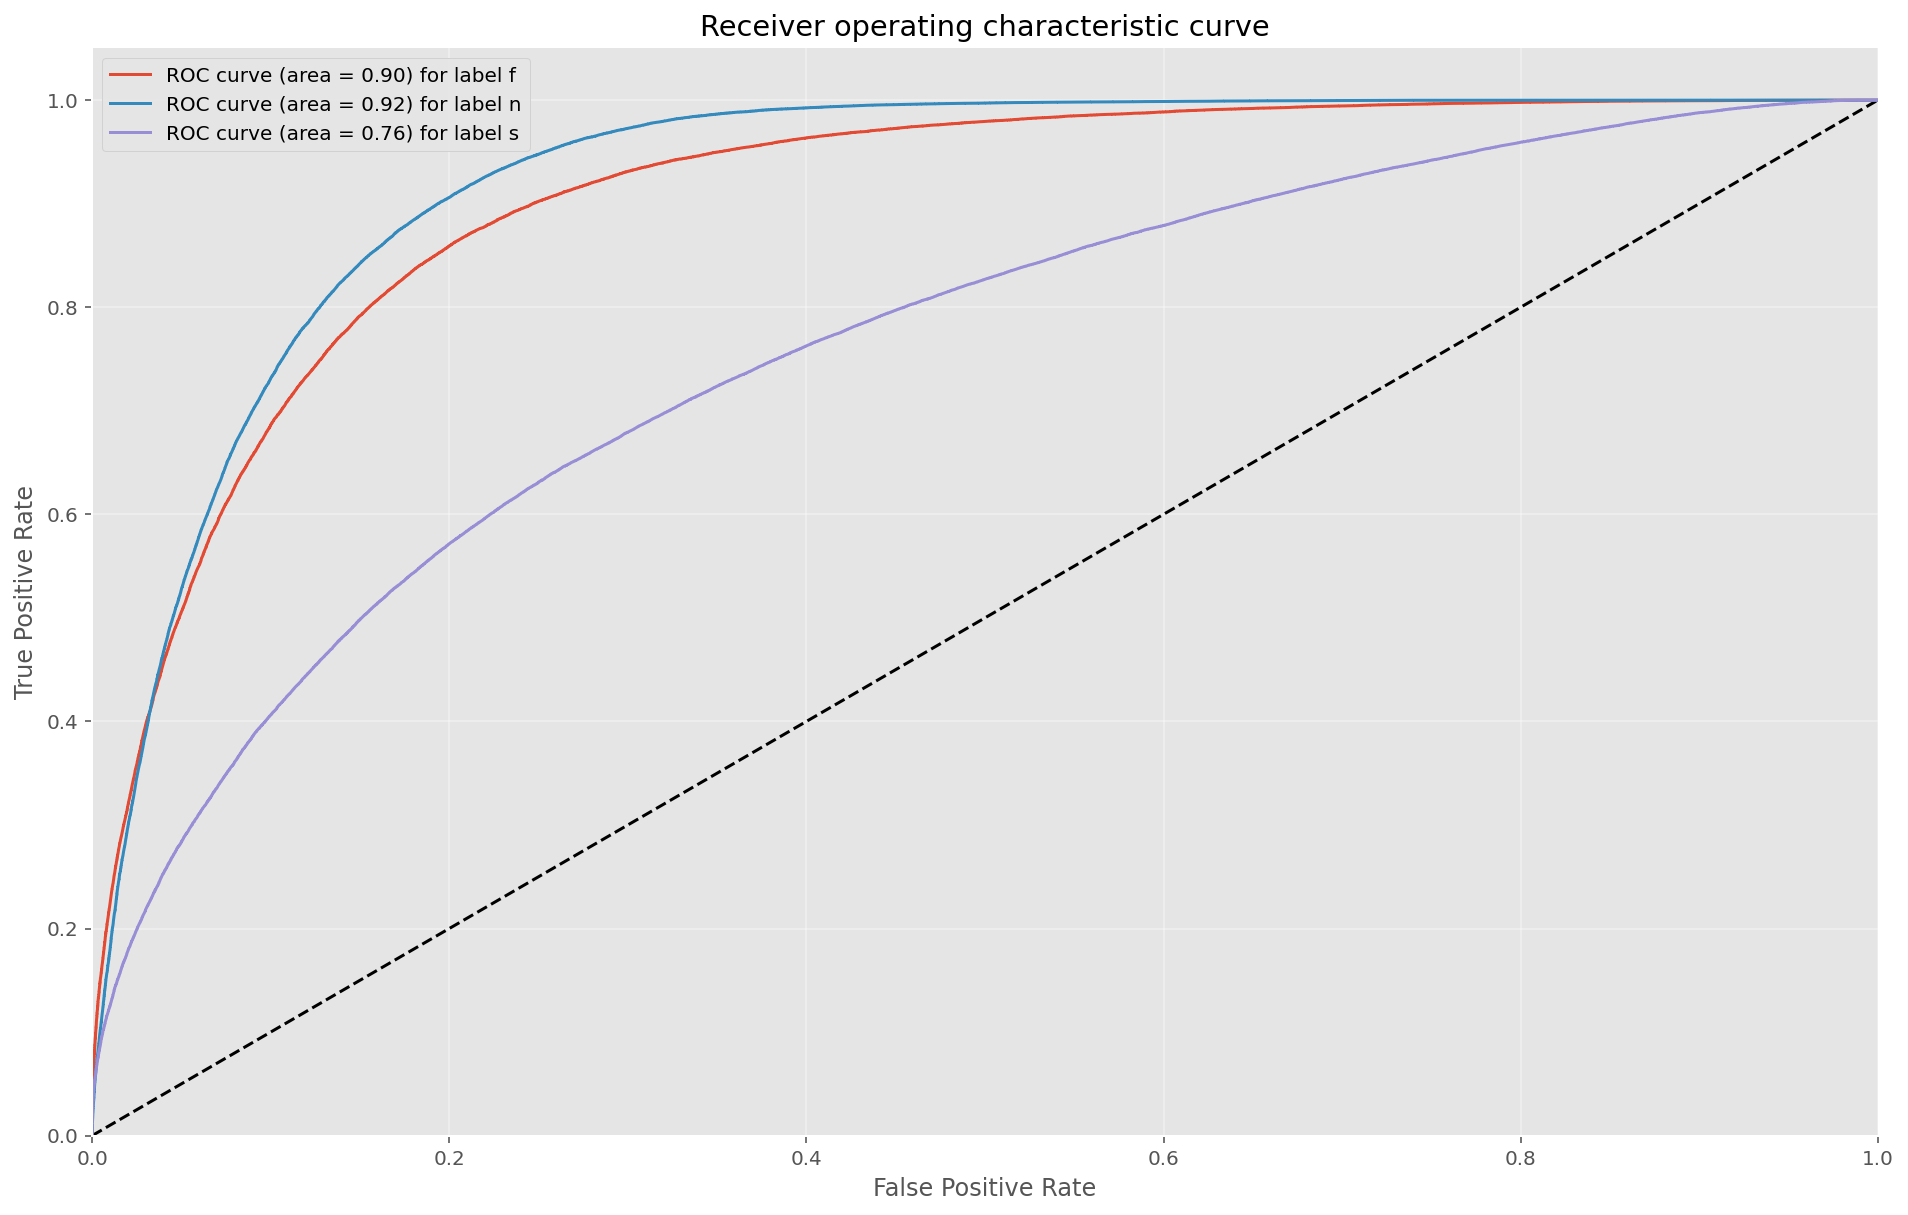

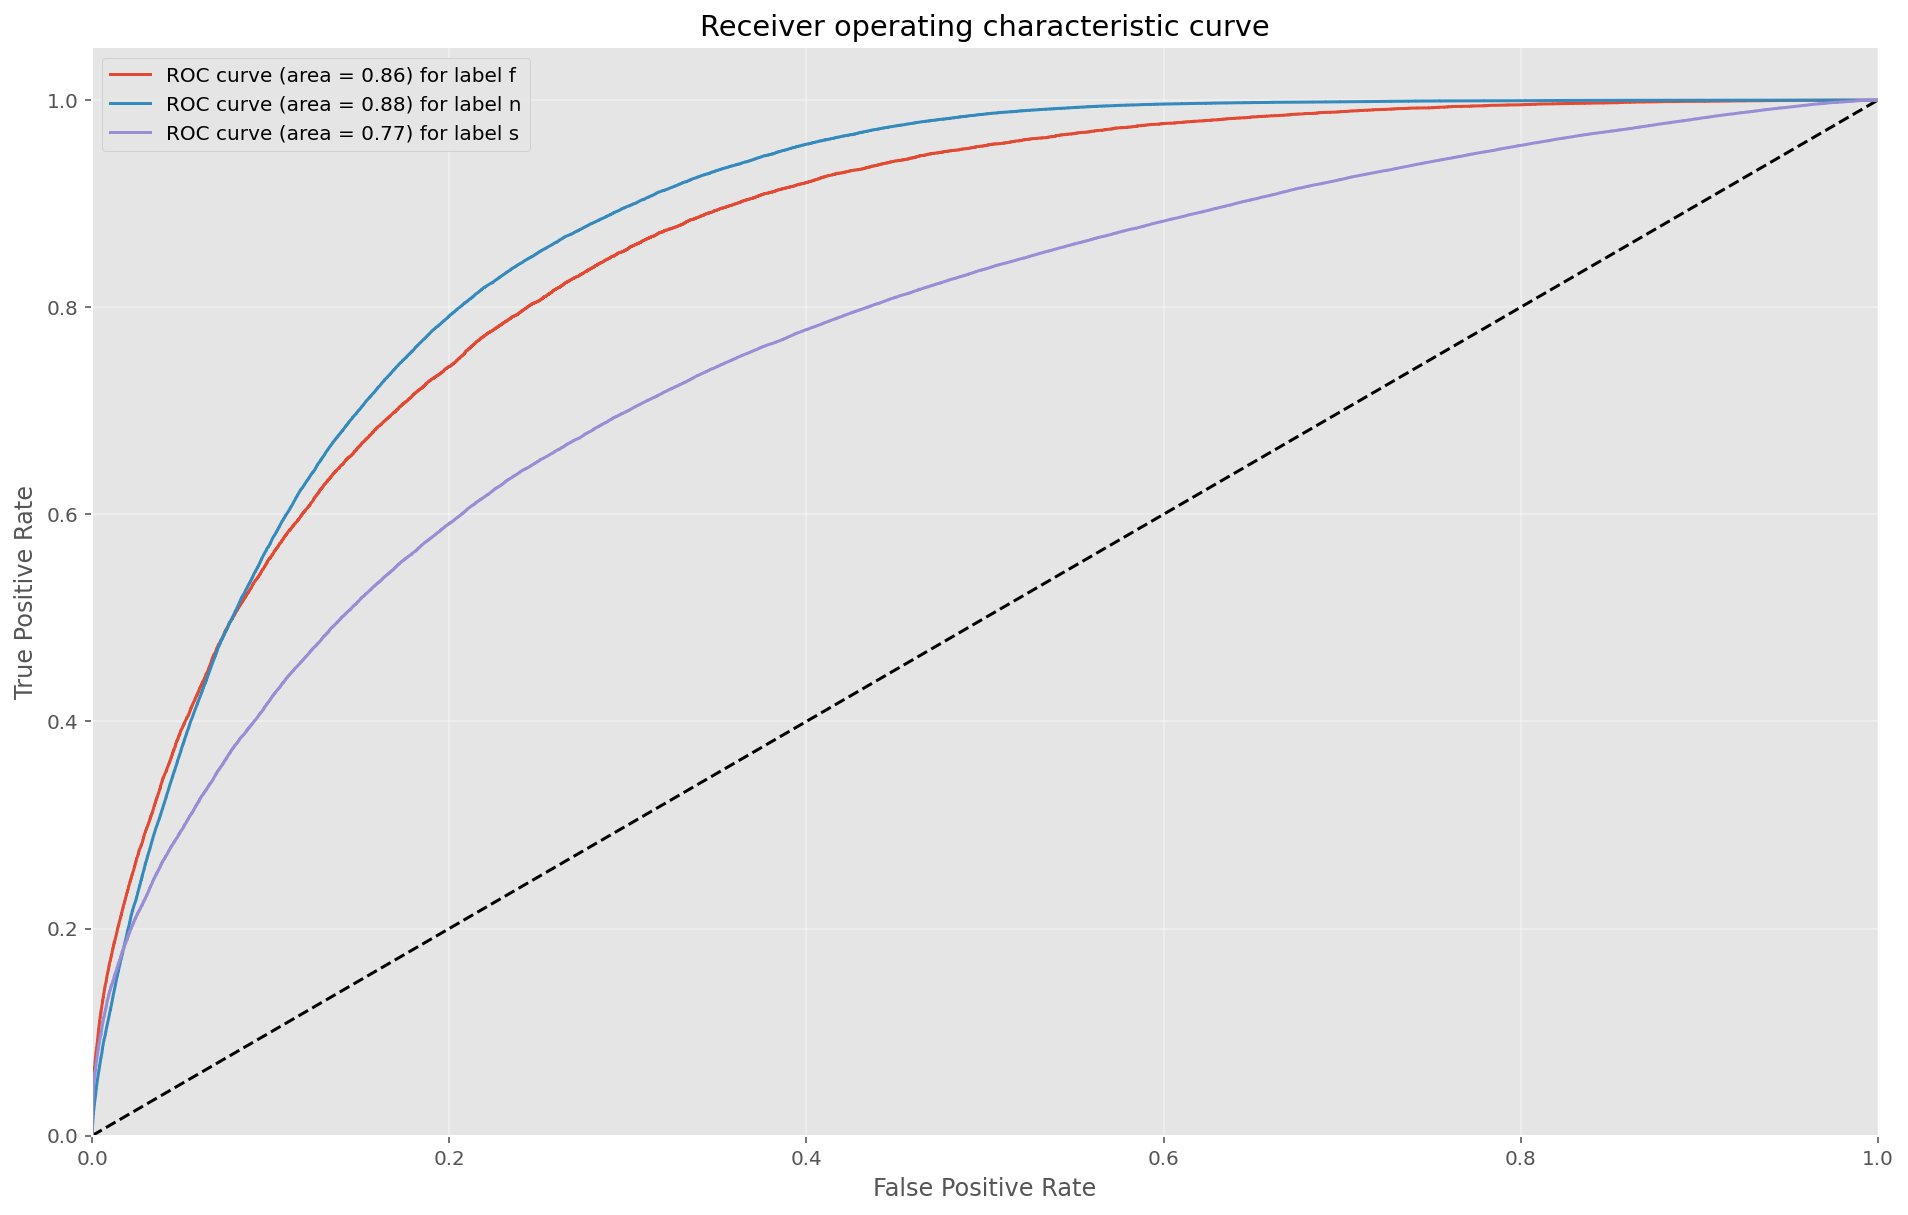

In [187]:
plot_multiclass_roc(best_lr, X_train_processed , y_train, 3, figsize=(16, 10))
plot_multiclass_roc(best_lr, X_test_processed , y_test, 3, figsize=(16, 10))

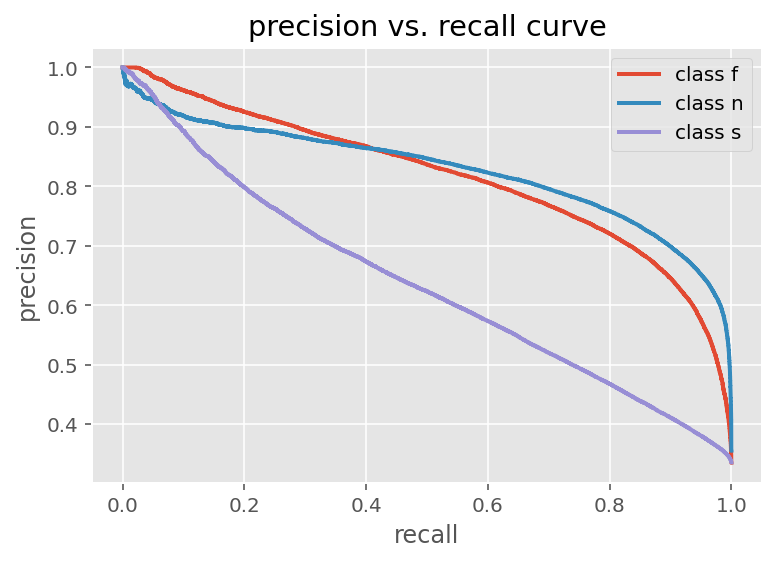

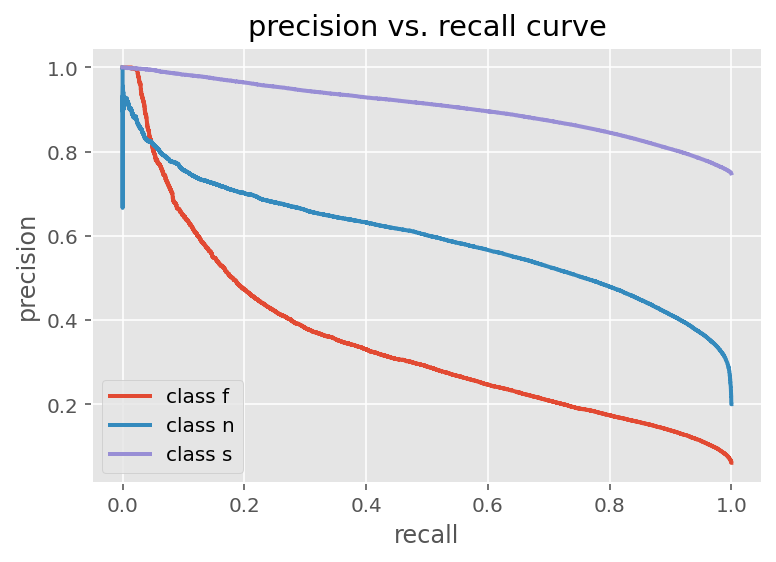

In [188]:
multiclass_precision_recall(best_lr, X_train_processed, y_train)
multiclass_precision_recall(best_lr, X_test_processed, y_test)

##### 

In [32]:
y_train.head()

severity
0        f
1        f
2        f
3        f
4        f

In [33]:
y_train = np.ravel(y_train)

In [34]:
# random forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 15, n_jobs = 2)
rf.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=15, n_jobs=2)

In [36]:
cross_val_score(rf, X_train_processed, y_train, cv=5).mean()

0.6424033865457437

In [35]:
from sklearn.tree import export_graphviz
import graphviz

from ipywidgets import *
from IPython.display import display
from IPython.display import Image

In [44]:
# random forest grid search
rf_params = {'n_estimators': [500, 700],
             'max_depth': range(5, 25, 5),
             'max_features': range(50, 110, 20)}

rf_grid = GridSearchCV(rf, rf_params, cv = 3, n_jobs = 2, verbose = 3)
rf_grid.fit(X_train_processed, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 85.5min
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed: 501.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=15, n_jobs=2),
             n_jobs=2,
             param_grid={'max_depth': range(5, 25, 5),
                         'max_features': range(50, 110, 20),
                         'n_estimators': [500, 700]},
             verbose=3)

In [45]:
# print best score and parameters
print(rf_grid.best_score_)
print(rf_grid.best_params_)

best_rf = rf_grid.best_estimator_

# refit best model, save cross_val_scores then .mean()

0.6929099830675609
{'max_depth': 20, 'max_features': 90, 'n_estimators': 500}


In [89]:
rf_pred_train = best_rf.predict(X_train_processed)
rf_pred_test = best_rf.predict(X_test_processed)

In [52]:
print(best_rf.score(X_train_processed, y_train))
print(best_rf.score(X_test_processed, y_test))

0.7298509866779811
0.5071501008420597


In [83]:
from sklearn.metrics import plot_confusion_matrix, classification_report

              precision    recall  f1-score   support

           f       0.84      0.76      0.80     93952
           n       0.91      0.68      0.78    113079
           s       0.44      0.78      0.56     47510

    accuracy                           0.73    254541
   macro avg       0.73      0.74      0.71    254541
weighted avg       0.80      0.73      0.75    254541



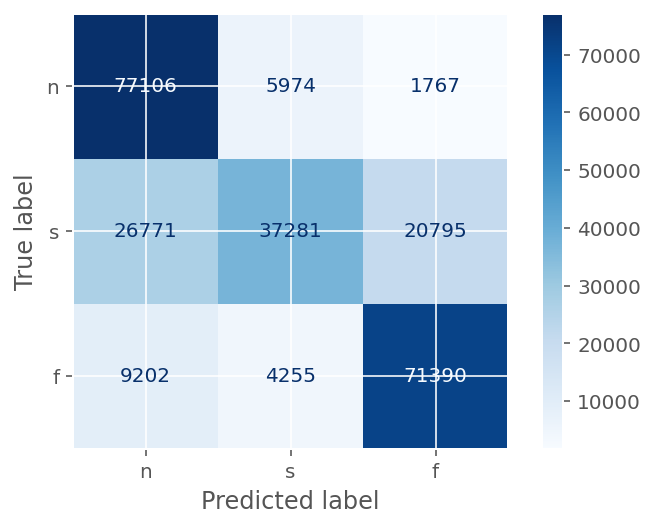

In [90]:
print(classification_report(rf_pred_train, y_train))
plot_confusion_matrix(best_rf, X_train_processed,  y_train, labels = ['n', 's', 'f'], cmap = 'Blues')

              precision    recall  f1-score   support

           f       0.81      0.19      0.30     92636
           n       0.89      0.40      0.55    149943
           s       0.38      0.93      0.54    108465

    accuracy                           0.51    351044
   macro avg       0.70      0.51      0.47    351044
weighted avg       0.71      0.51      0.48    351044



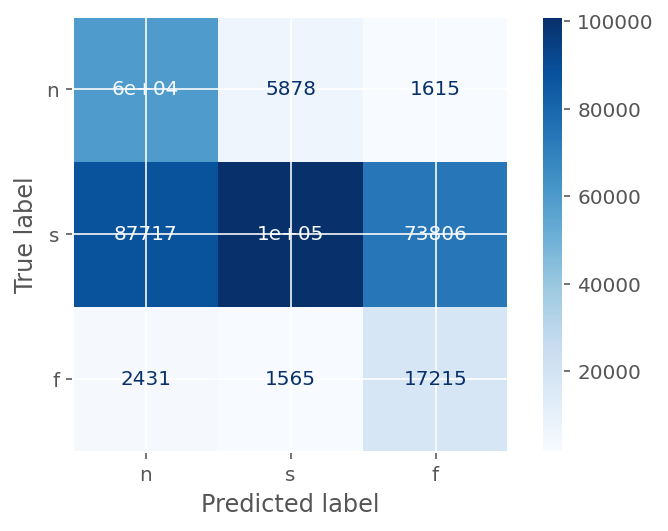

In [91]:
print(classification_report(rf_pred_test, y_test))
plot_confusion_matrix(best_rf, X_test_processed,  y_test, labels = ['n', 's', 'f'], cmap = 'Blues')

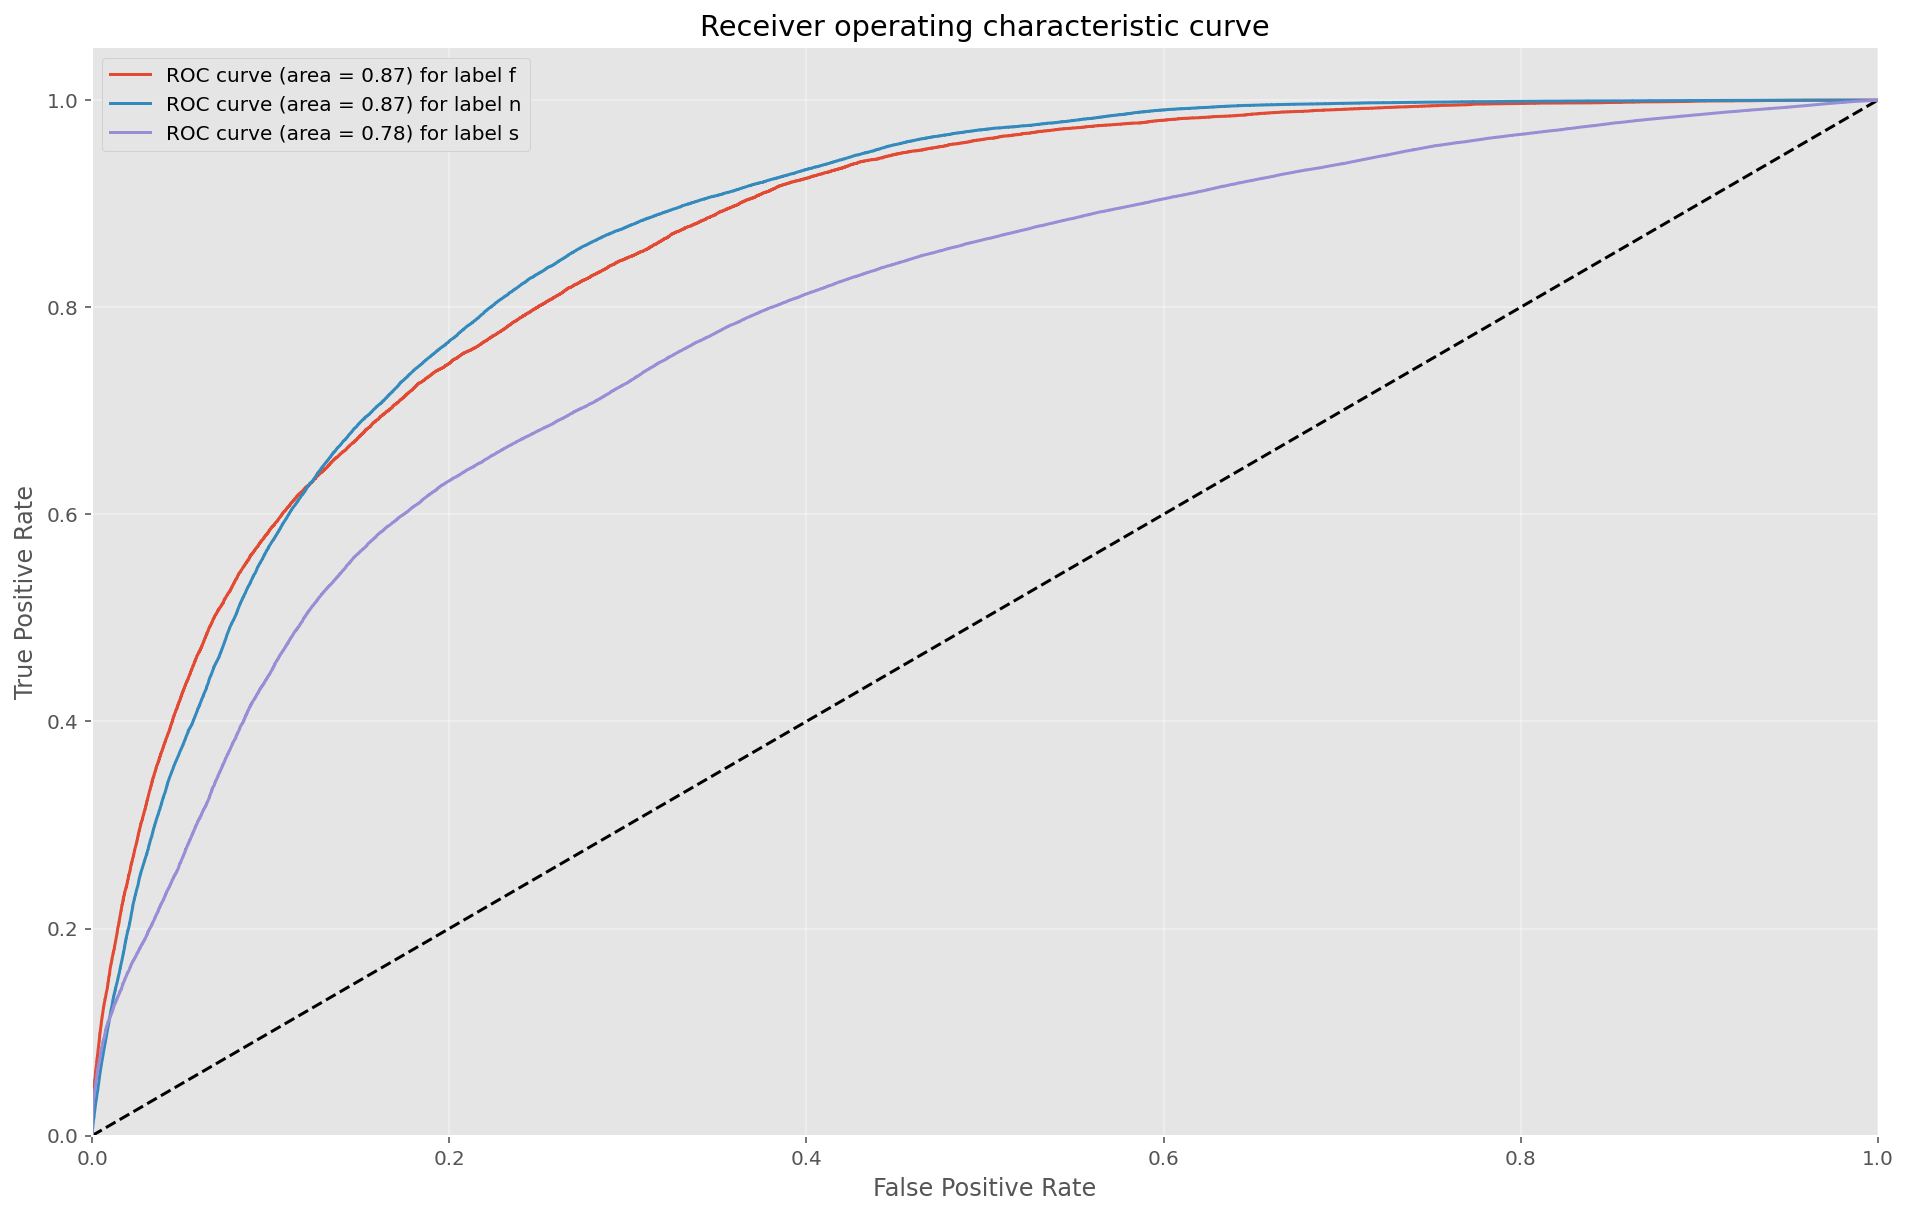

In [120]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, plot_precision_recall_curve
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i, y in enumerate(clf.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curve')
    for i, y in enumerate(clf.classes_):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], y))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(best_rf, X_test_processed , y_test, 3, figsize=(16, 10))

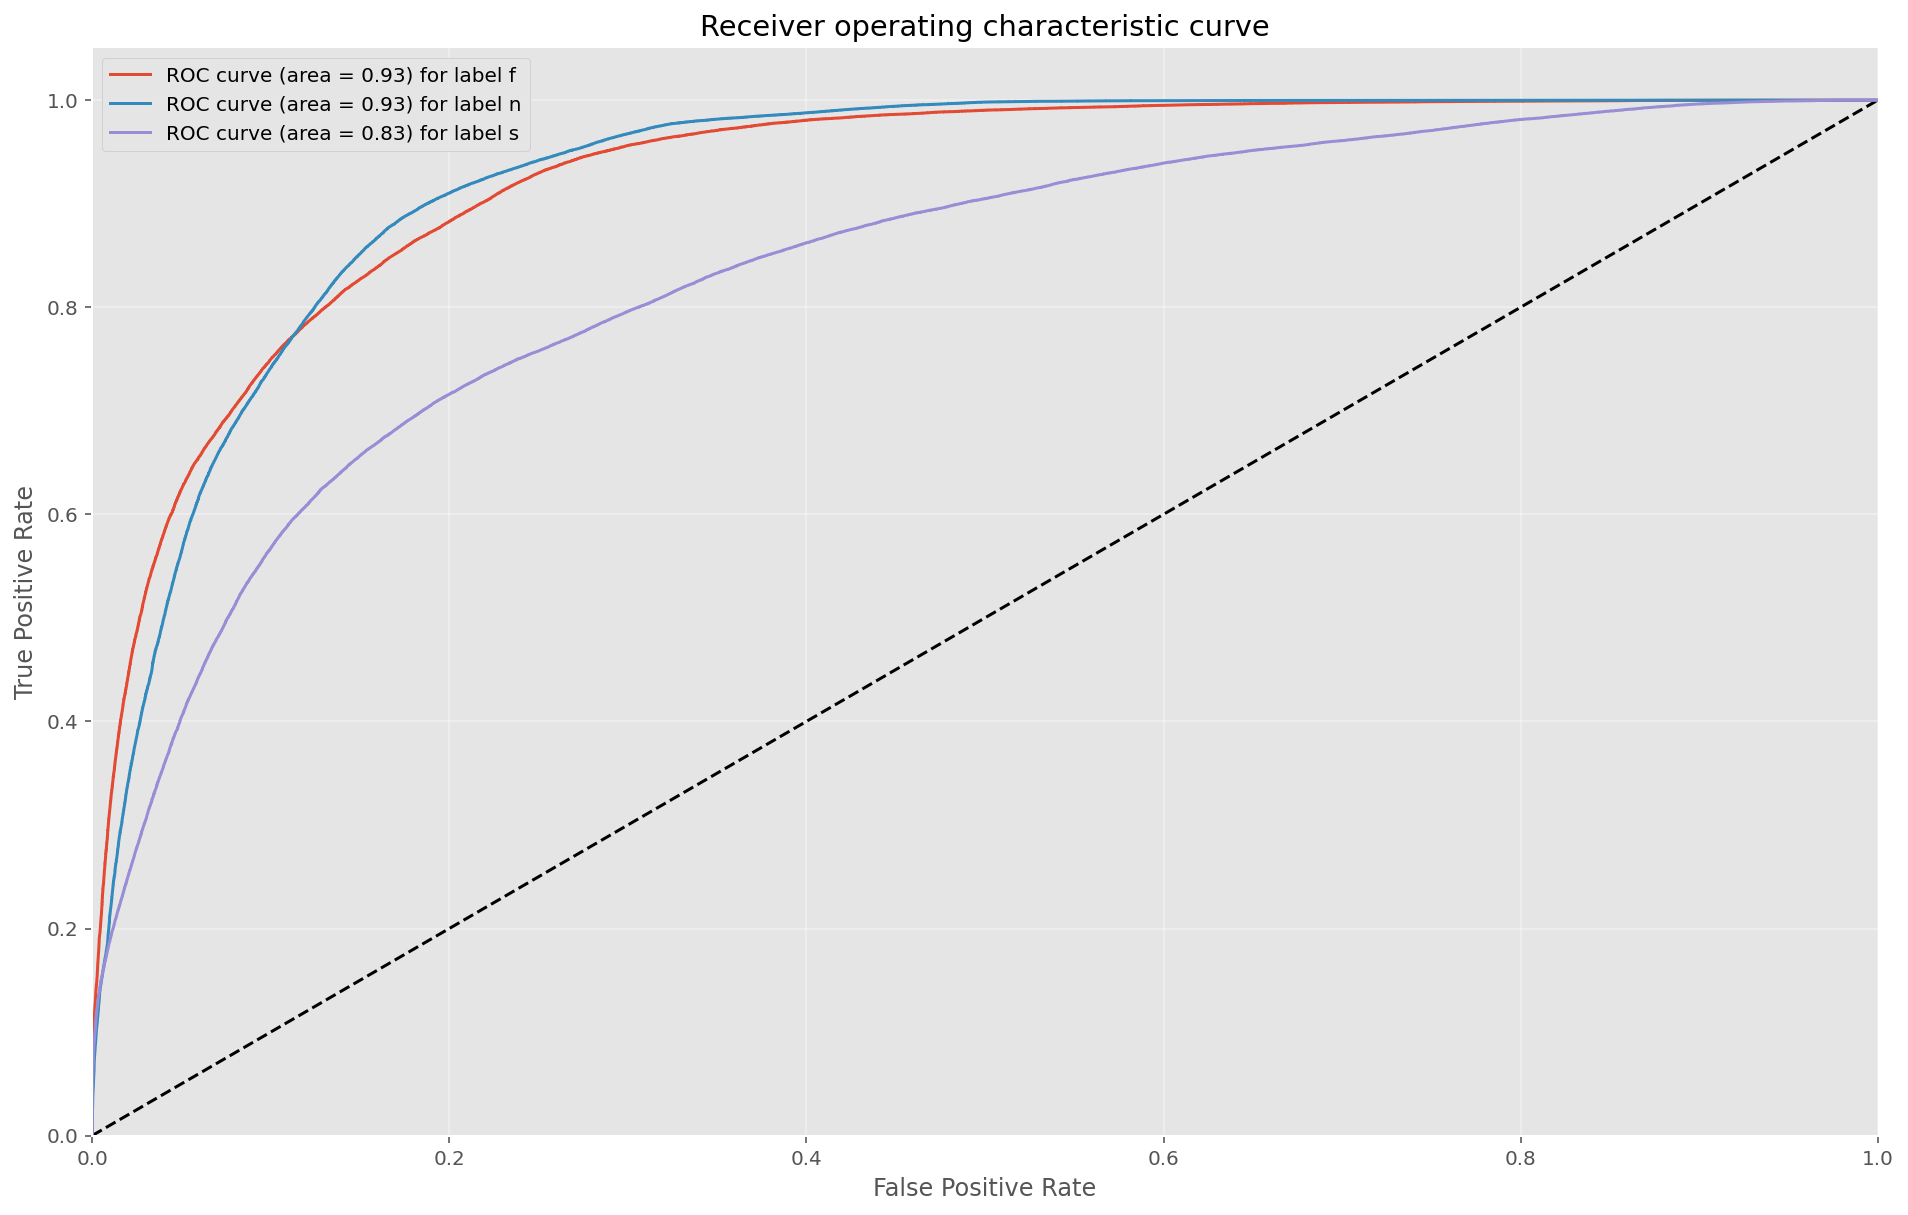

In [148]:
plot_multiclass_roc(best_rf, X_train_processed , y_train, 3, figsize=(16, 10))

In [106]:
best_rf.classes_

array(['f', 'n', 's'], dtype=object)

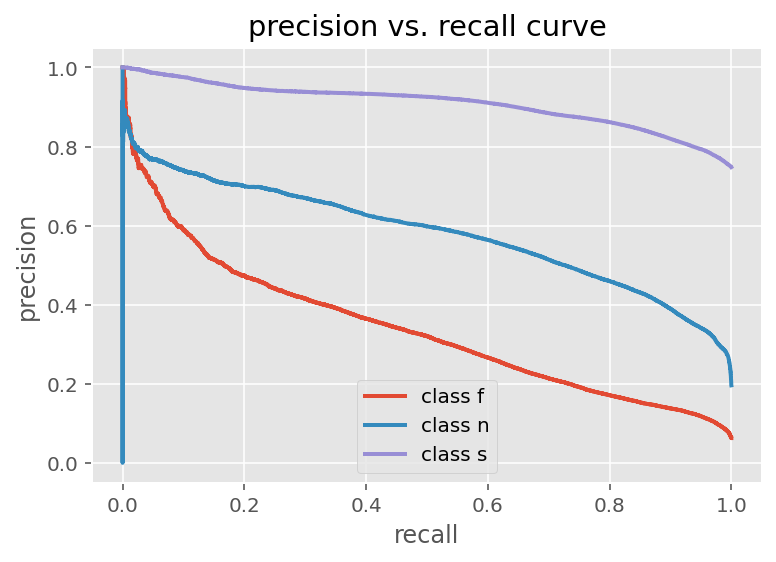

In [139]:
# https://stackoverflow.com/questions/56090541/how-to-plot-precision-and-recall-of-multiclass-classifier

from sklearn.metrics import precision_recall_curve
def multiclass_precision_recall(model, X_test, y_test):
    y_score = model.predict_proba(X_test)
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    precision = dict()
    recall = dict()
    for i, y in enumerate(model.classes_):
        precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                            y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(y))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()
multiclass_precision_recall(best_rf, X_test_processed, y_test)

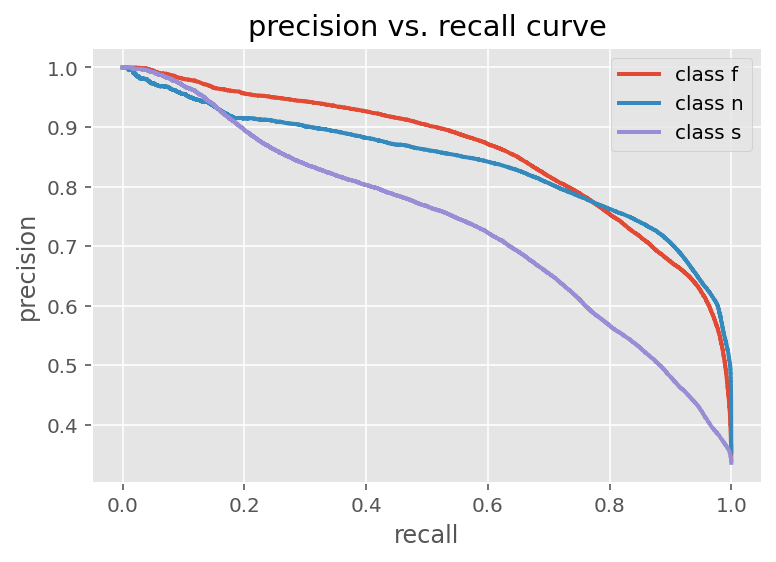

In [149]:
multiclass_precision_recall(best_rf, X_train_processed, y_train)

In [129]:
rf_features = np.mean([
    tree.feature_importances_ for tree in best_rf], axis = 0)
rf_feature_df = pd.DataFrame({'importances': rf_features}, index = X_train_processed.columns)
rf_feature_df.sort_values('importances', ascending = False).head(20)

importances
categories__x3_direct           0.142584
categories__x3_indirect         0.134702
year                            0.105233
categories__x0_skin             0.053637
categories__x4_y                0.018146
categories__x4_n                0.017128
categories__x5_n                0.017071
categories__x0_card             0.014527
categories__x5_y                0.014480
n_reviews                       0.013582
categories__x0_gastr            0.012935
categories__x0_blood            0.012761
categories__x0_infec            0.010703
categories__x1_female           0.009359
categories__x1_male             0.009028
rating                          0.008675
categories__x0_hepat            0.007789
categories__x0_musc             0.007576
categories__x2_80.0             0.007037
targets__specific vesicular     0.006582

<AxesSubplot:>

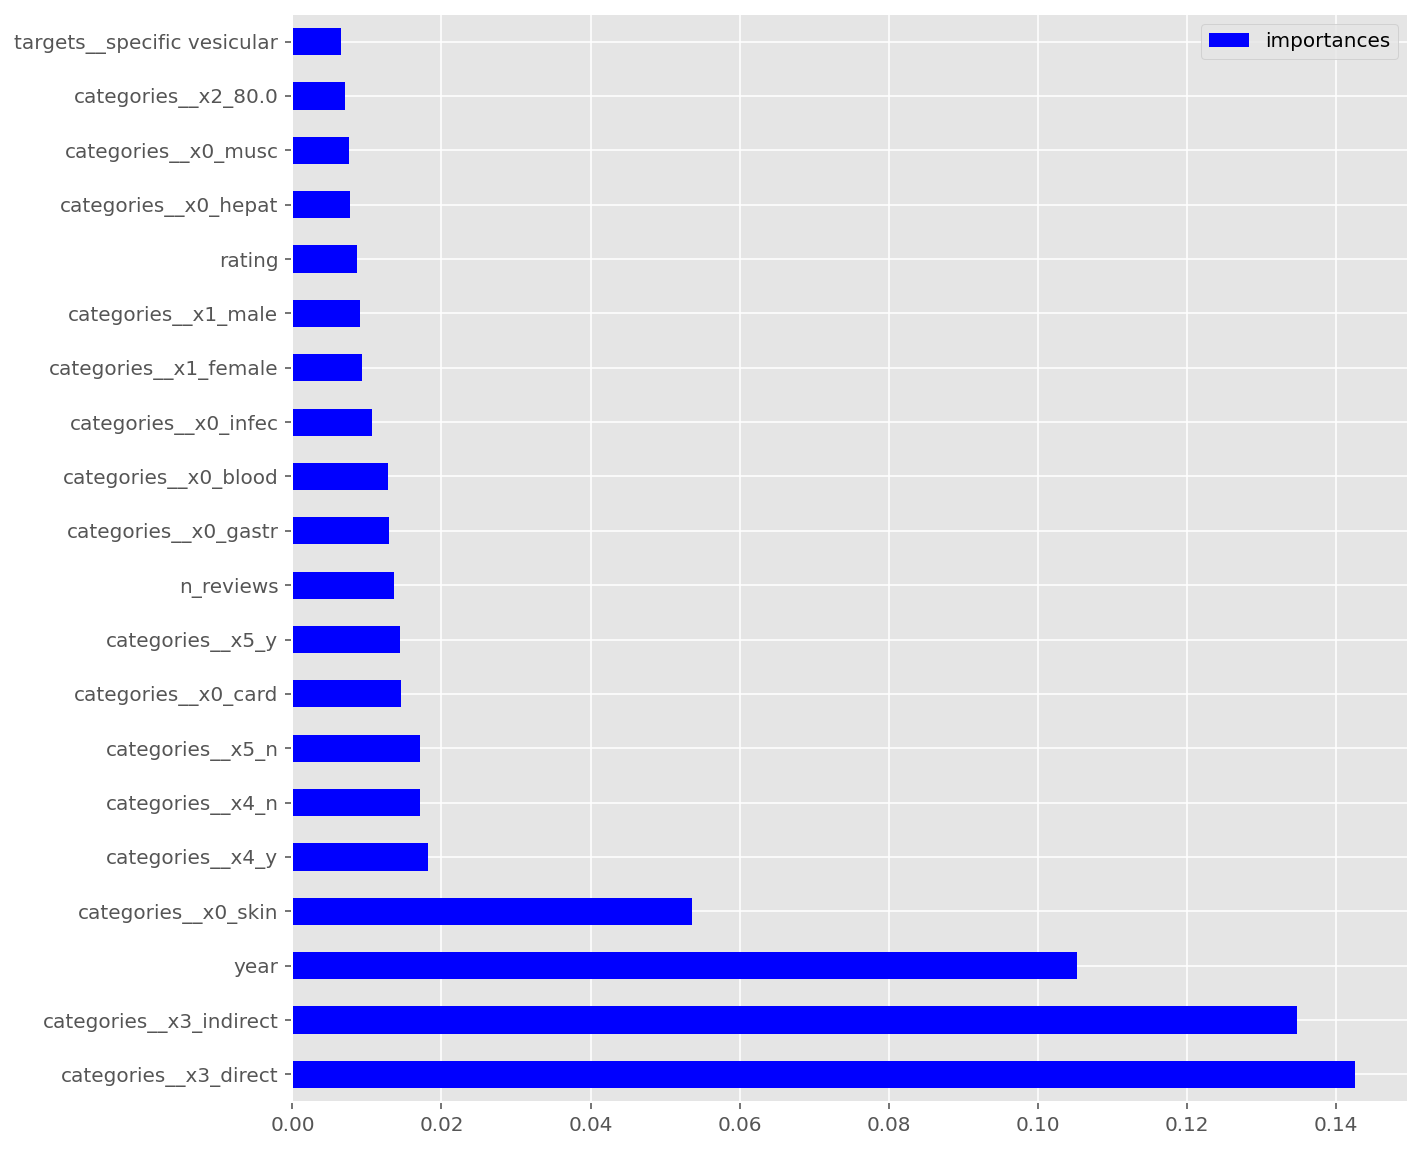

In [131]:
rf_feature_df.sort_values('importances', ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

In [46]:
import joblib
joblib.dump(best_rf, 'best_rf.jlib')

['best_rf.jlib']

In [47]:
# decision tree depth 5
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train_processed, y_train)
dtc_scores = cross_val_score(dtc, X_train_processed, y_train, cv = 5)
print(dtc_scores.mean())

0.5997029933577653


In [49]:
# then grid search decision tree
# random forest grid search
dtc2 = DecisionTreeClassifier()

dt_params = {'max_depth': range(5, 25, 5),
             'max_features': range(50, 110, 20)}

dt_grid = GridSearchCV(dtc2, dt_params, cv = 5, n_jobs = 2, verbose = 3)
dt_grid.fit(X_train_processed, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  7.1min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed: 20.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'max_depth': range(5, 25, 5),
                         'max_features': range(50, 110, 20)},
             verbose=3)

In [50]:
# print best score and parameters
print(dt_grid.best_score_)
print(dt_grid.best_params_)

best_dt = dt_grid.best_estimator_

# refit best model, save cross_val_scores then .mean()

0.6390836598187961
{'max_depth': 20, 'max_features': 70}


In [51]:
joblib.dump(best_dt, 'best_dt.jlib')

['best_dt.jlib']

In [53]:
print(best_dt.score(X_train_processed, y_train))
print(best_dt.score(X_test_processed, y_test))

0.6216955225287871
0.524116634951744


              precision    recall  f1-score   support

           f       0.66      0.67      0.67     83587
           n       0.71      0.65      0.68     92069
           s       0.50      0.53      0.51     78885

    accuracy                           0.62    254541
   macro avg       0.62      0.62      0.62    254541
weighted avg       0.63      0.62      0.62    254541



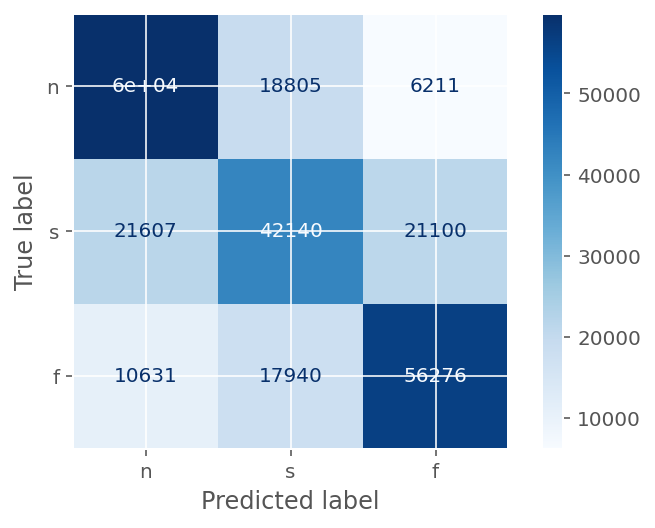

In [92]:
print(classification_report(best_dt.predict(X_train_processed), y_train))
plot_confusion_matrix(best_dt, X_train_processed,  y_train, labels = ['n', 's', 'f'], cmap = 'Blues')

              precision    recall  f1-score   support

           f       0.65      0.16      0.25     88226
           n       0.69      0.39      0.50    118660
           s       0.47      0.86      0.61    144158

    accuracy                           0.52    351044
   macro avg       0.60      0.47      0.45    351044
weighted avg       0.59      0.52      0.48    351044



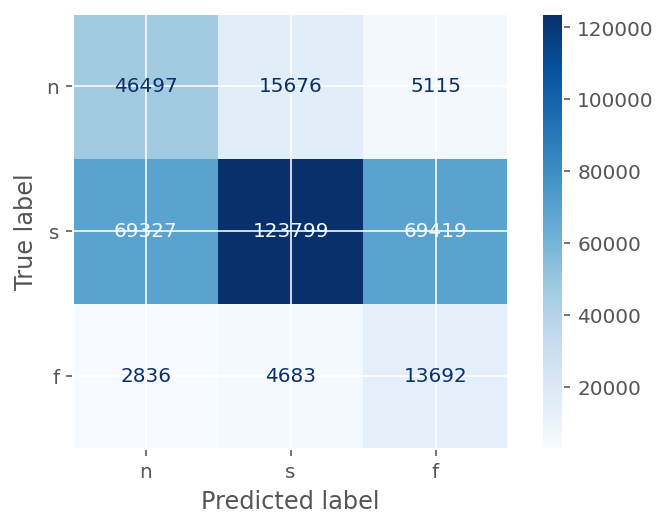

In [93]:
print(classification_report(best_dt.predict(X_test_processed), y_test))
plot_confusion_matrix(best_dt, X_test_processed,  y_test, labels = ['n', 's', 'f'], cmap = 'Blues')

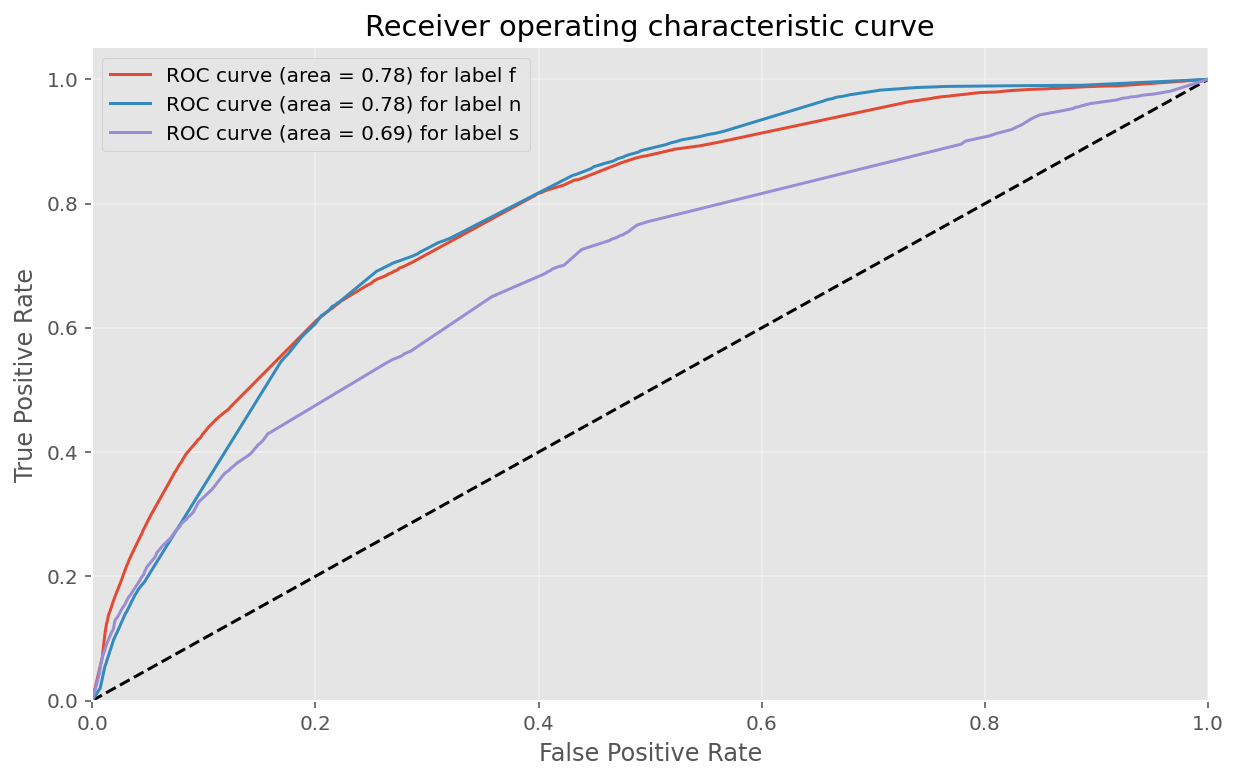

In [121]:
plot_multiclass_roc(best_dt, X_test_processed, y_test, 3, figsize = (10, 6))

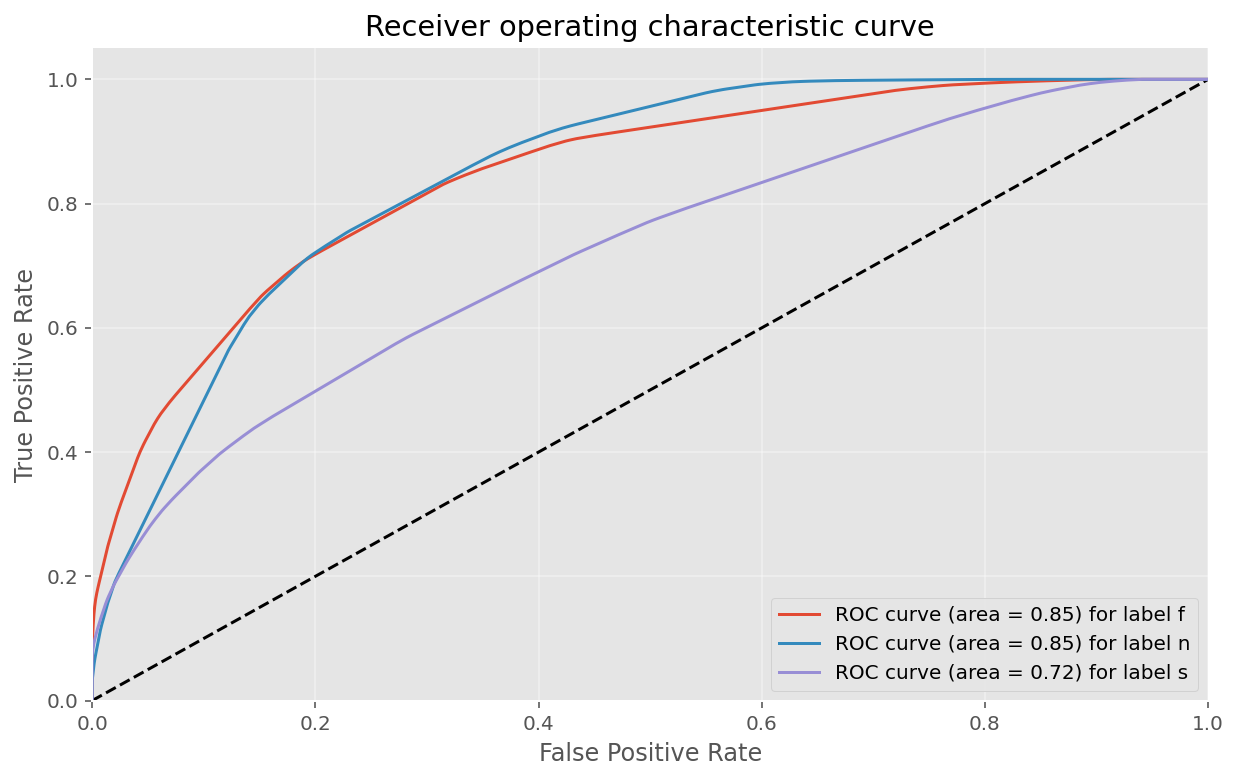

In [150]:
plot_multiclass_roc(best_dt, X_train_processed, y_train, 3, figsize = (10, 6))

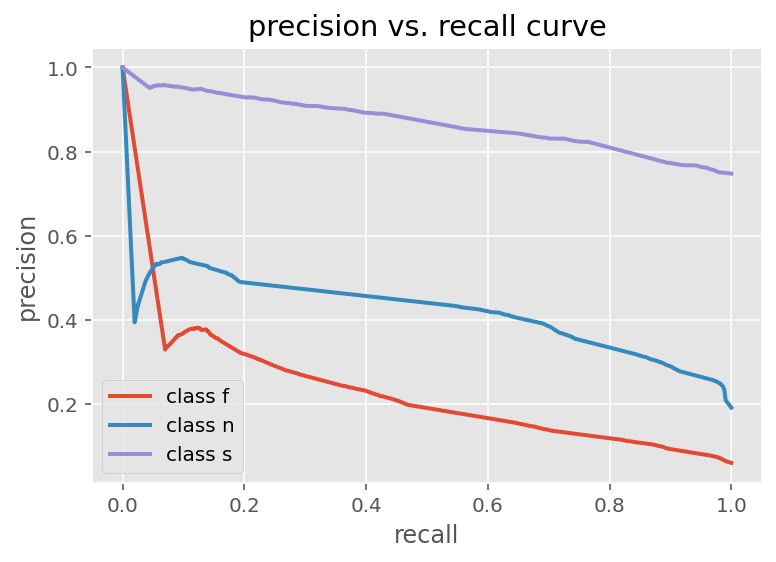

In [140]:
multiclass_precision_recall(best_dt, X_test_processed, y_test)

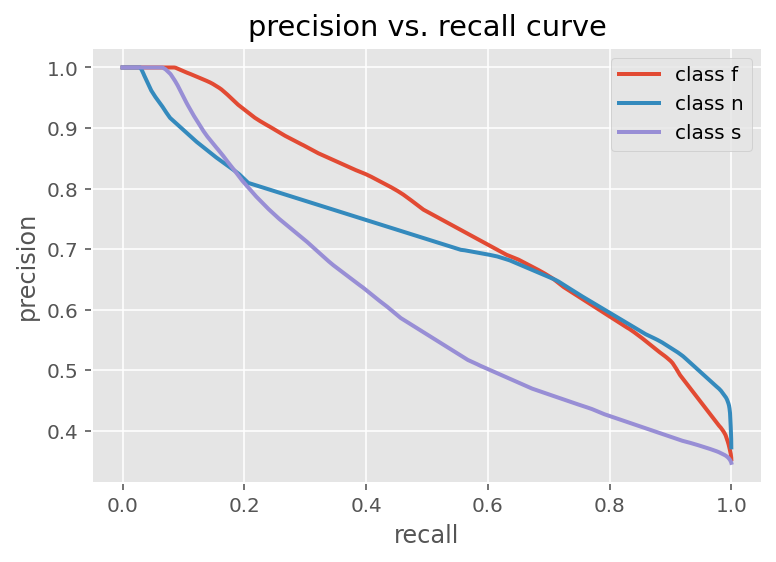

In [151]:
multiclass_precision_recall(best_dt, X_train_processed, y_train)

In [135]:
dt_feature_df = pd.DataFrame({'importances': best_dt.feature_importances_}, index = X_train_processed.columns)
dt_feature_df.sort_values('importances', ascending = False).head(20)

importances
year                                     0.178706
conditions__schizophrenia borderline     0.125953
categories__x5_n                         0.059866
categories__x4_n                         0.056668
categories__x0_infec                     0.042829
categories__x0_skin                      0.032847
categories__x3_direct                    0.032818
categories__x3_indirect                  0.020124
categories__x1_female                    0.017105
targets__sodium dependent                0.015080
categories__x0_neopl                     0.014970
categories__x0_gastr                     0.014537
categories__x0_hepat                     0.013194
conditions__vein thrombosis              0.012654
categories__x2_80.0                      0.012116
categories__x0_musc                      0.011753
targets__growth factor                   0.011212
categories__x0_inv                       0.009909
n_reviews                                0.008134
rating                                   0.008025

<AxesSubplot:>

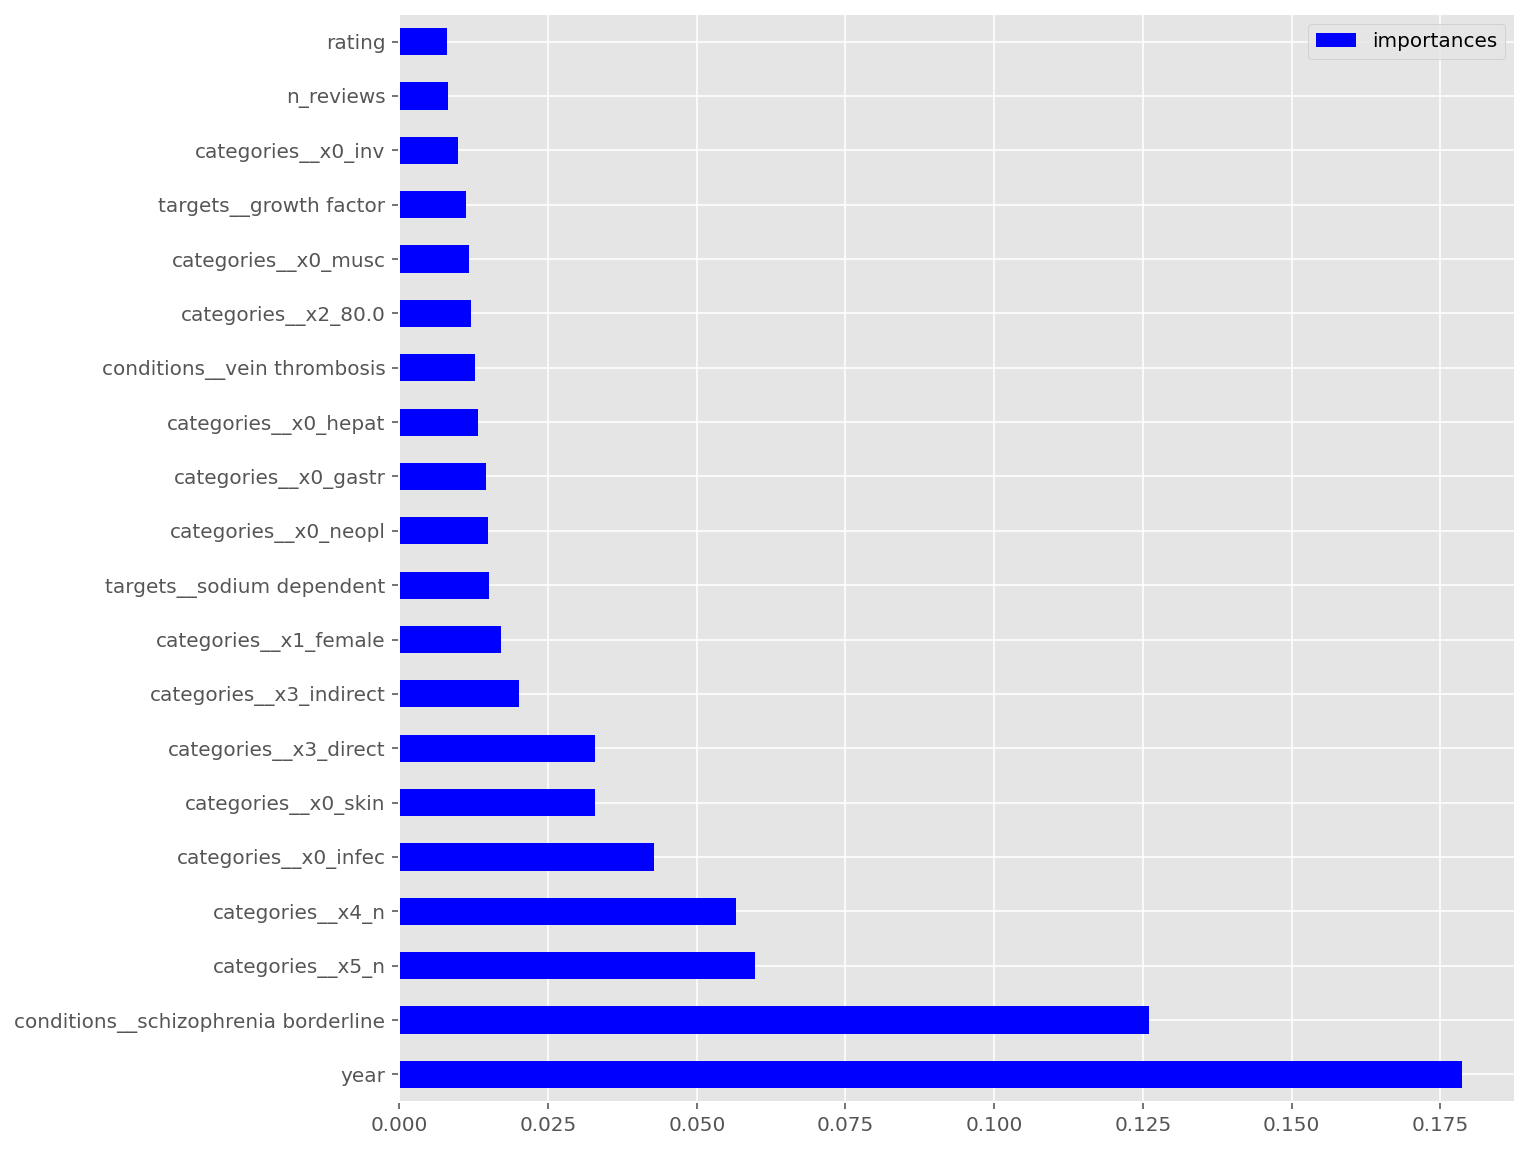

In [136]:
dt_feature_df.sort_values('importances', ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

In [56]:
# AdaBoost max depth 3

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [58]:
base_estimator = DecisionTreeClassifier(max_depth=3, max_features=0.3)
ada = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
ada.fit(X_train_processed, y_train)

print(ada.score(X_train_processed, y_train))
print(cross_val_score(ada, X_train_processed, y_train, cv=5).mean())
print(ada.score(X_test_processed, y_test))

0.6996829587374922
0.694996089811205
0.5436497988856098


In [61]:
joblib.dump(ada, 'ada.jlib')

['ada.jlib']

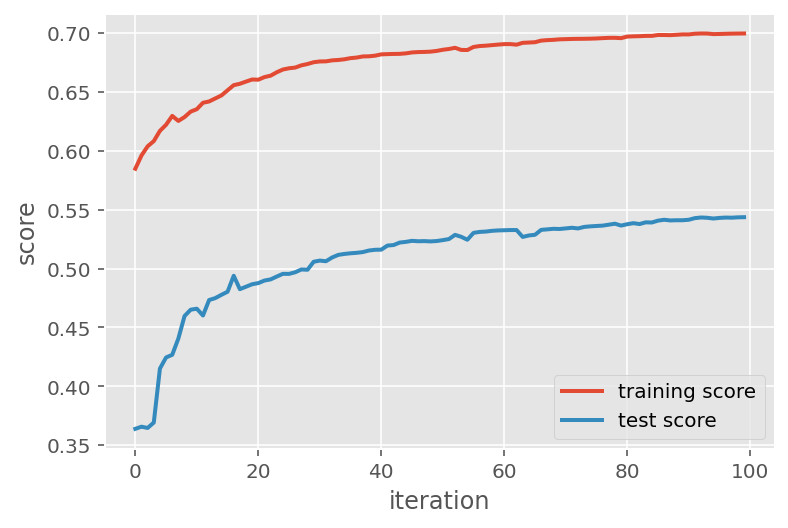

In [60]:
plt.plot(list(ada.staged_score(X_train_processed, y_train)),
         label='training score', lw=2)
plt.plot(list(ada.staged_score(X_test_processed, y_test)), label='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           f       0.78      0.73      0.75     91237
           n       0.87      0.72      0.79    102542
           s       0.45      0.63      0.52     60762

    accuracy                           0.70    254541
   macro avg       0.70      0.69      0.69    254541
weighted avg       0.74      0.70      0.71    254541



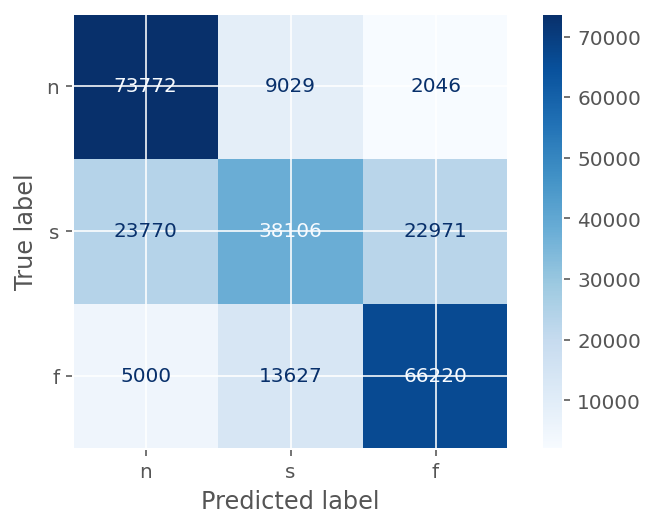

In [142]:
print(classification_report(ada.predict(X_train_processed), y_train))
plot_confusion_matrix(ada, X_train_processed,  y_train, labels = ['n', 's', 'f'], cmap = 'Blues')

              precision    recall  f1-score   support

           f       0.78      0.18      0.29     90749
           n       0.87      0.44      0.58    133372
           s       0.44      0.92      0.60    126923

    accuracy                           0.54    351044
   macro avg       0.69      0.51      0.49    351044
weighted avg       0.69      0.54      0.51    351044



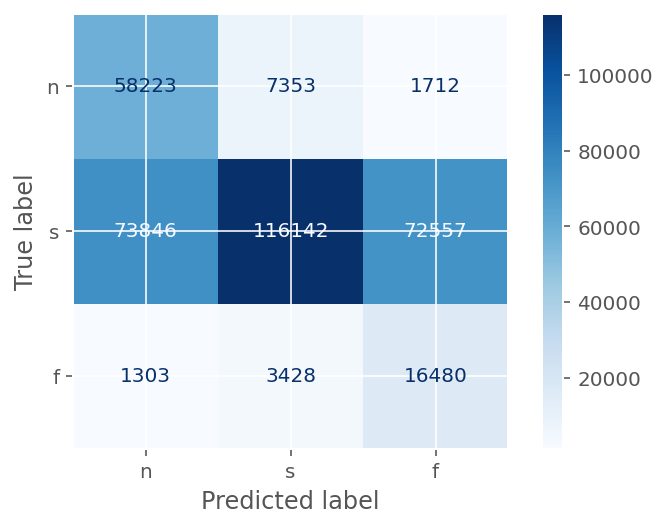

In [143]:
print(classification_report(ada.predict(X_test_processed), y_test))
plot_confusion_matrix(ada, X_test_processed,  y_test, labels = ['n', 's', 'f'], cmap = 'Blues')

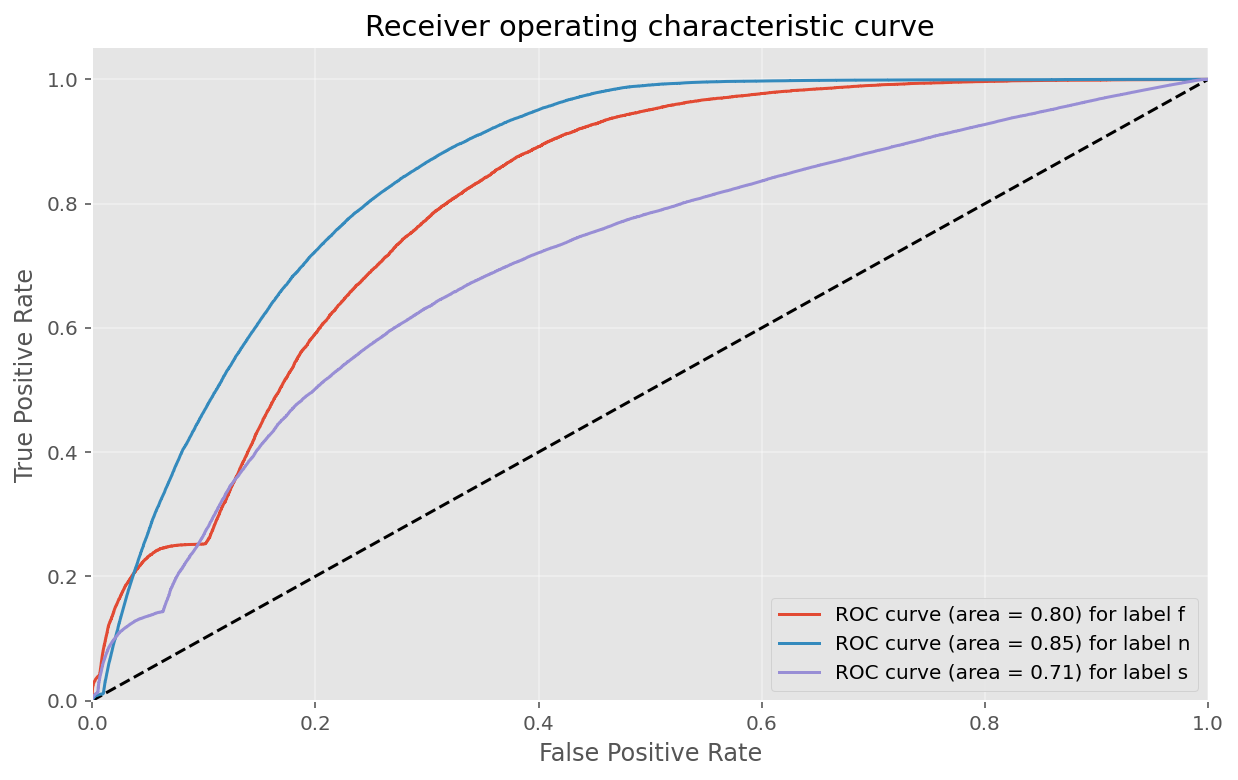

In [144]:
plot_multiclass_roc(ada, X_test_processed, y_test, 3, figsize = (10, 6))

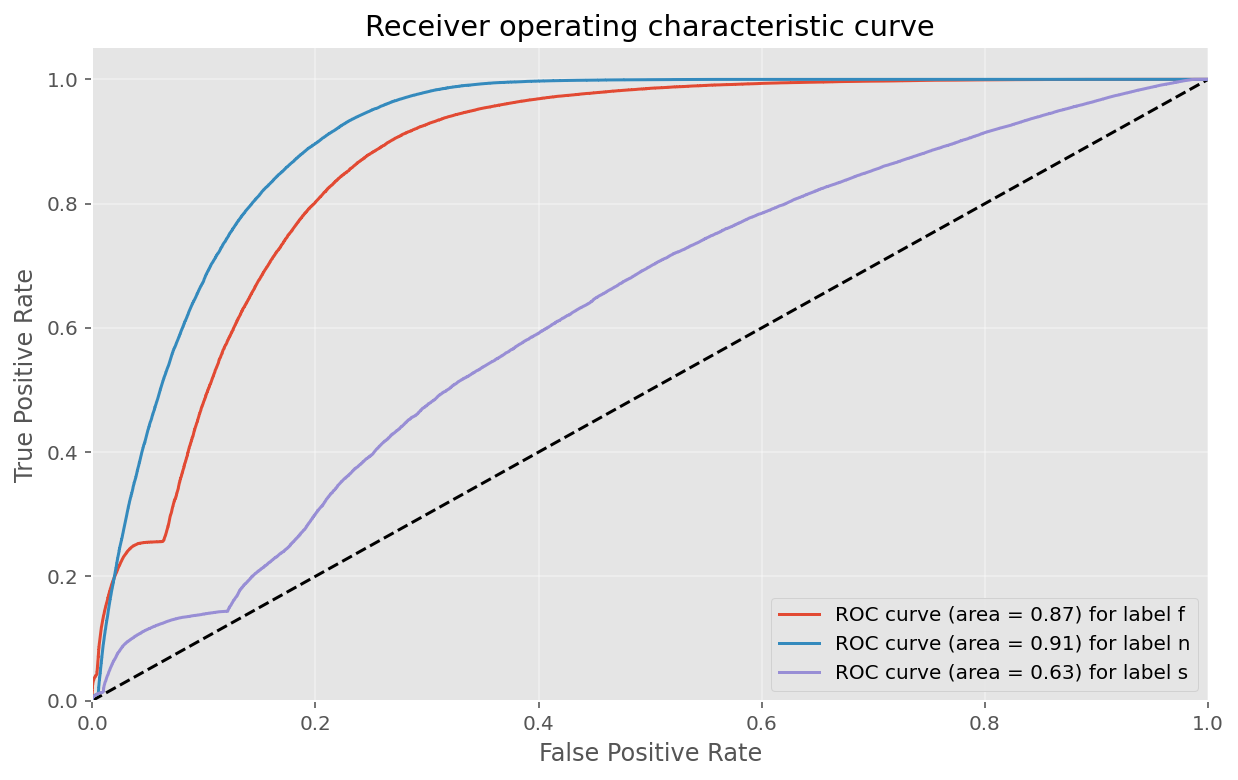

In [152]:
plot_multiclass_roc(ada, X_train_processed, y_train, 3, figsize = (10, 6))

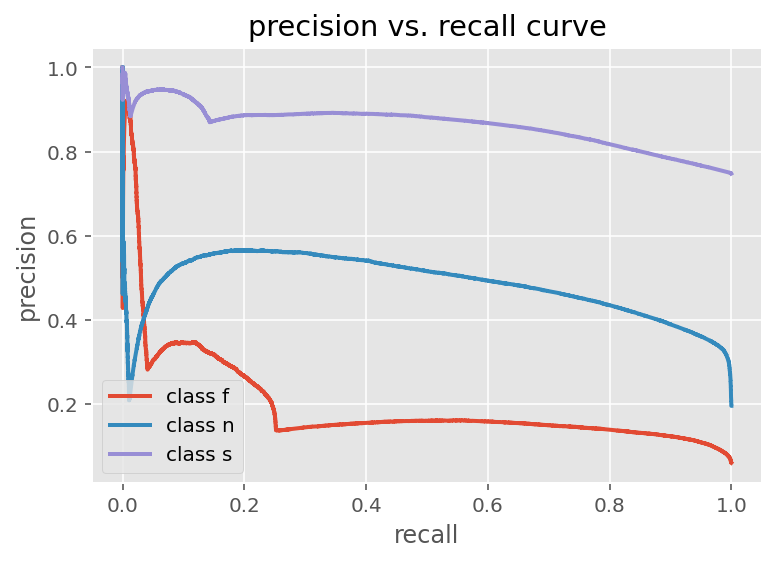

In [145]:
multiclass_precision_recall(ada, X_test_processed, y_test)

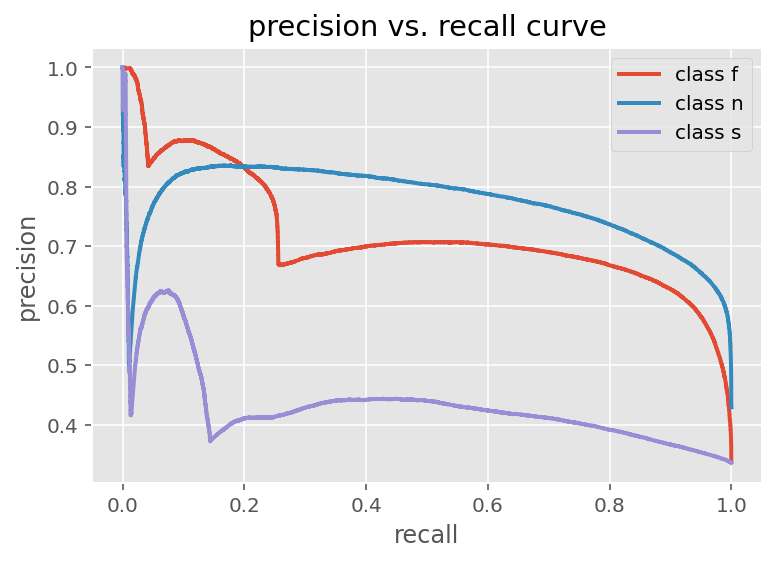

In [153]:
multiclass_precision_recall(ada, X_train_processed, y_train)

In [146]:
ada_feature_df = pd.DataFrame({'importances': ada.feature_importances_}, index = X_train_processed.columns)
ada_feature_df.sort_values('importances', ascending = False).head(20)

importances
year                        0.073983
categories__x3_indirect     0.026694
n_reviews                   0.017208
rating                      0.016826
categories__x5_y            0.016072
categories__x3_direct       0.013958
categories__x0_skin         0.013204
categories__x4_n            0.012984
categories__x2_80.0         0.012689
categories__x4_y            0.010603
categories__x0_metab        0.009381
categories__x2_70.0         0.008807
categories__x2_90.0         0.007890
categories__x1_female       0.007718
categories__x0_gastr        0.007625
categories__x0_genrl        0.007289
categories__x0_nerv         0.006997
categories__x0_inj&p        0.006736
categories__x2_40.0         0.006257
categories__x2_60.0         0.006175

<AxesSubplot:>

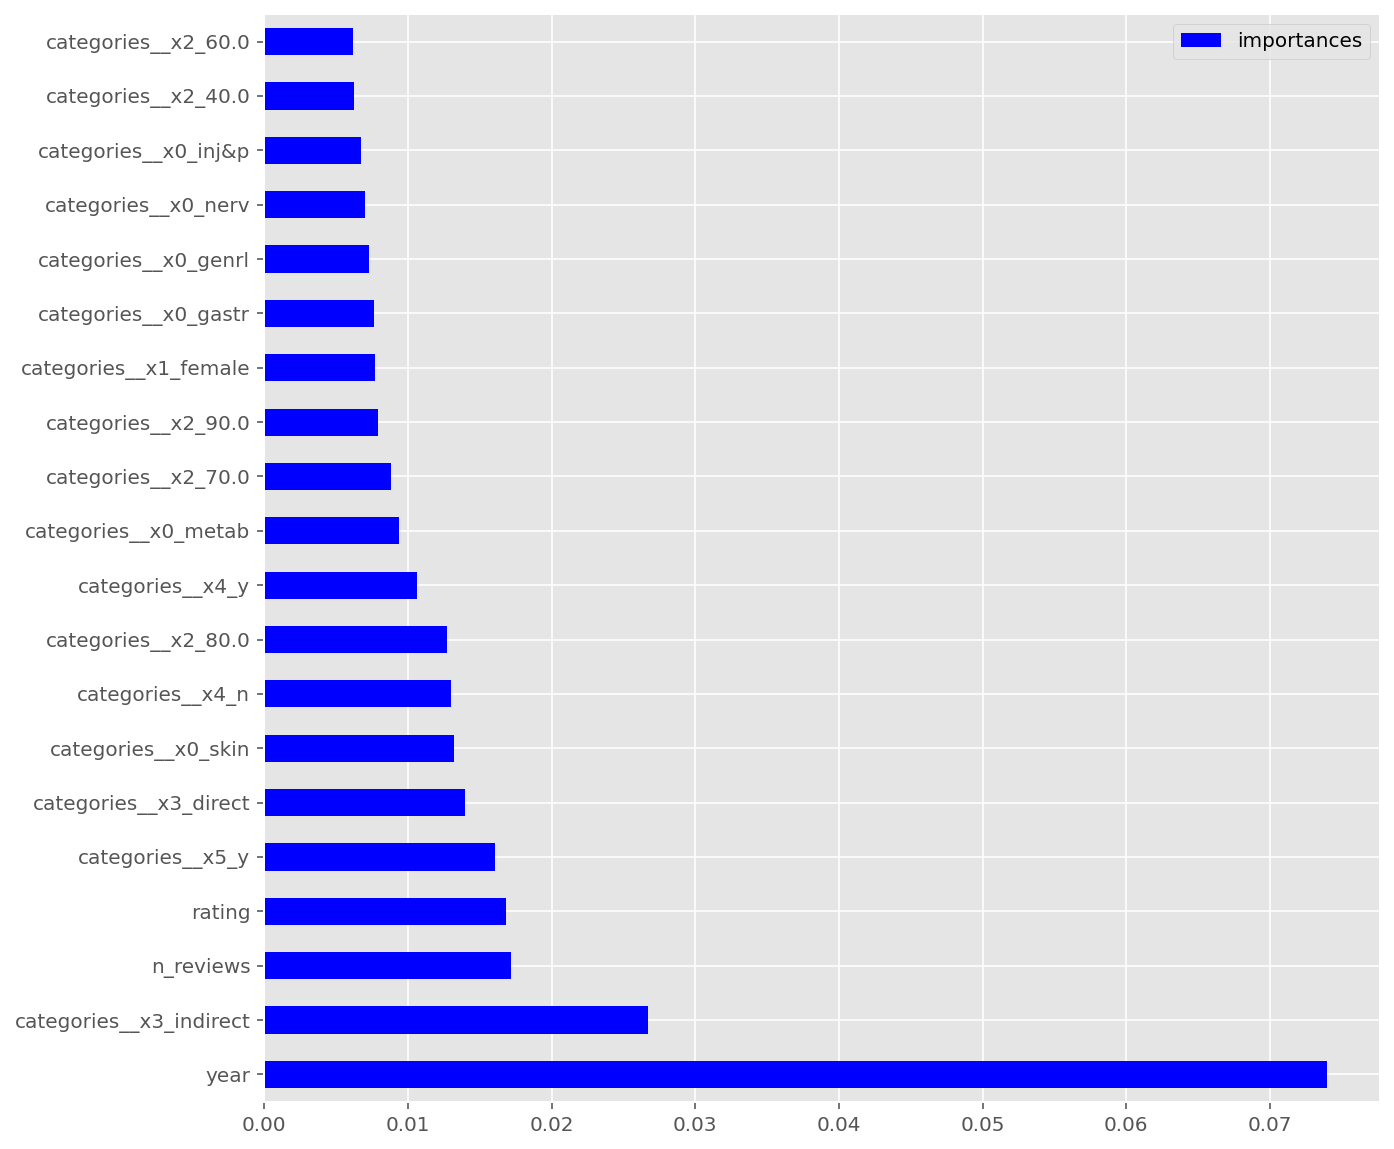

In [147]:
ada_feature_df.sort_values('importances', ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

In [64]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [67]:
hb = HistGradientBoostingClassifier(max_depth = 3)

hb.fit(X_train_processed, y_train)
hb_scores = cross_val_score(hb, X_train_processed, y_train, cv=5)

print(hb_scores.mean())
print(ada.score(X_train_processed, y_train))
print(ada.score(X_test_processed, y_test))

0.6820355043293593
0.6996829587374922
0.5436497988856098


In [68]:
joblib.dump(hb, 'histboost.joblib')

['histboost.joblib']

In [69]:
# Naive Bayes
from sklearn import naive_bayes

In [73]:
nb = naive_bayes.MultinomialNB()

alphas = {'alpha': np.linspace(0.0001, 1.0, 10)}
nb_grid = GridSearchCV(nb, alphas, cv = 5, n_jobs = 2, verbose = 3)
nb_grid.fit(X_train_processed, y_train)

print(nb_grid.best_score_)
print(nb_grid.best_params_)
best_nb = nb_grid.best_estimator_
print(best_nb.score(X_train_processed, y_train))
print(best_nb.score(X_test_processed, y_test))
# nb_scores = cross_val_score(nb, X_train_processed, y_train, cv=5)
# print(nb_scores.mean())
# print(nb.score(X_train_processed, y_train))
# print(nb.score(X_test_processed, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  7.4min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 13.1min finished


0.615983283958914
{'alpha': 0.0001}
0.6165490038932824
0.4564698442360502


              precision    recall  f1-score   support

           f       0.67      0.66      0.67     85757
           n       0.83      0.62      0.71    112693
           s       0.35      0.53      0.42     56091

    accuracy                           0.62    254541
   macro avg       0.62      0.61      0.60    254541
weighted avg       0.67      0.62      0.63    254541



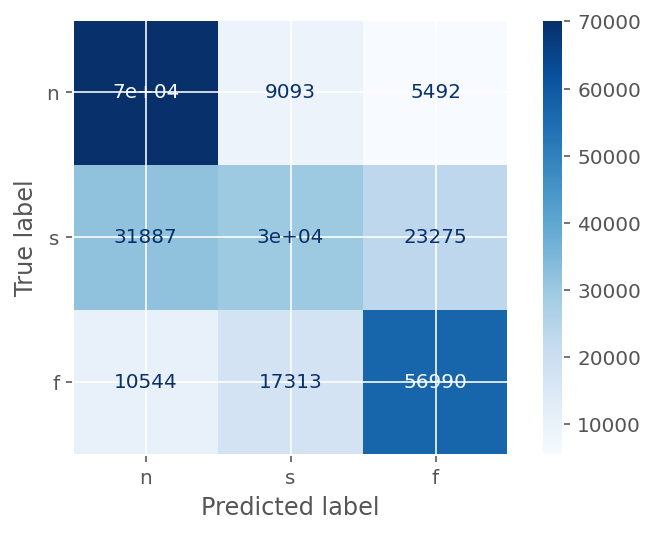

In [154]:
print(classification_report(best_nb.predict(X_train_processed), y_train))
plot_confusion_matrix(best_nb, X_train_processed,  y_train, labels = ['n', 's', 'f'], cmap = 'Blues')

              precision    recall  f1-score   support

           f       0.67      0.16      0.25     91318
           n       0.83      0.35      0.50    157999
           s       0.34      0.89      0.50    101727

    accuracy                           0.46    351044
   macro avg       0.61      0.47      0.41    351044
weighted avg       0.65      0.46      0.43    351044



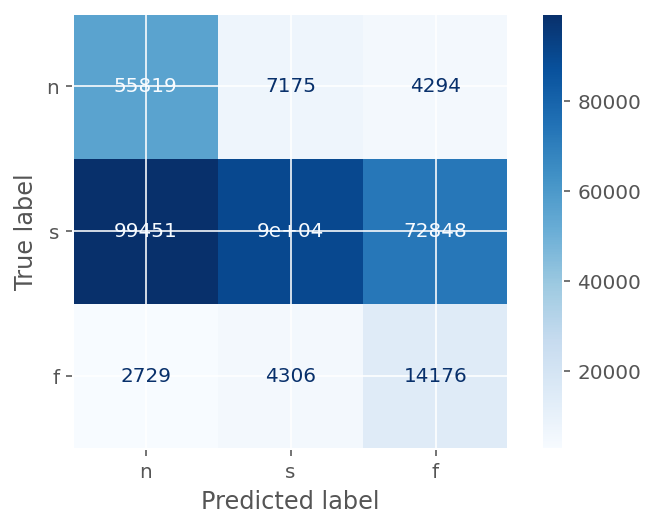

In [155]:
print(classification_report(best_nb.predict(X_test_processed), y_test))
plot_confusion_matrix(best_nb, X_test_processed,  y_test, labels = ['n', 's', 'f'], cmap = 'Blues')

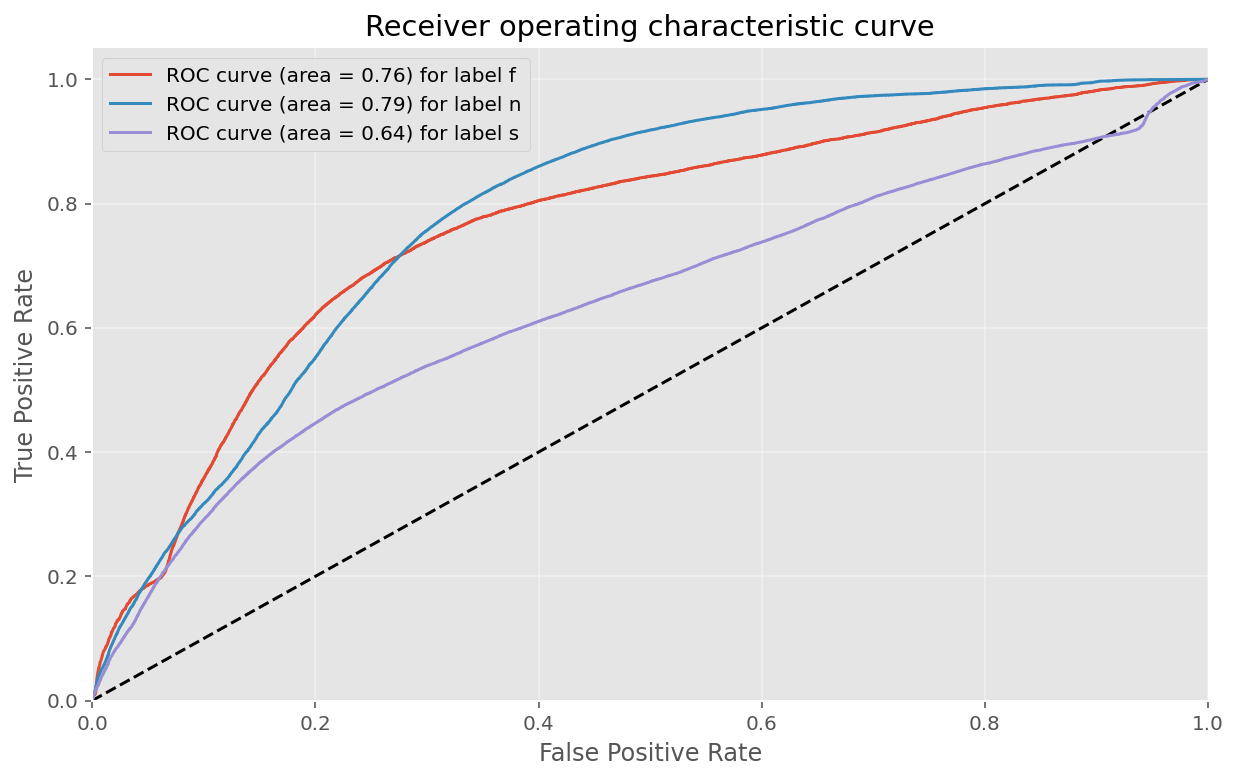

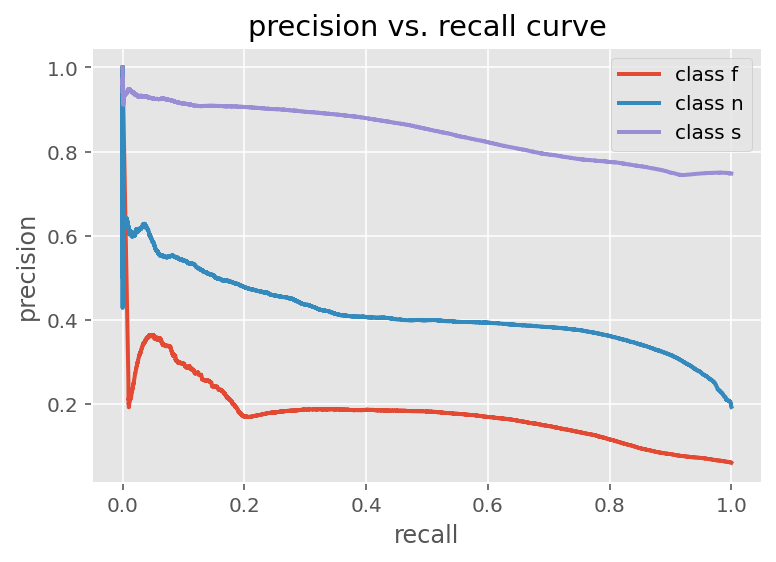

In [156]:
plot_multiclass_roc(best_nb, X_test_processed, y_test, 3, figsize = (10, 6))
multiclass_precision_recall(best_nb, X_test_processed, y_test)

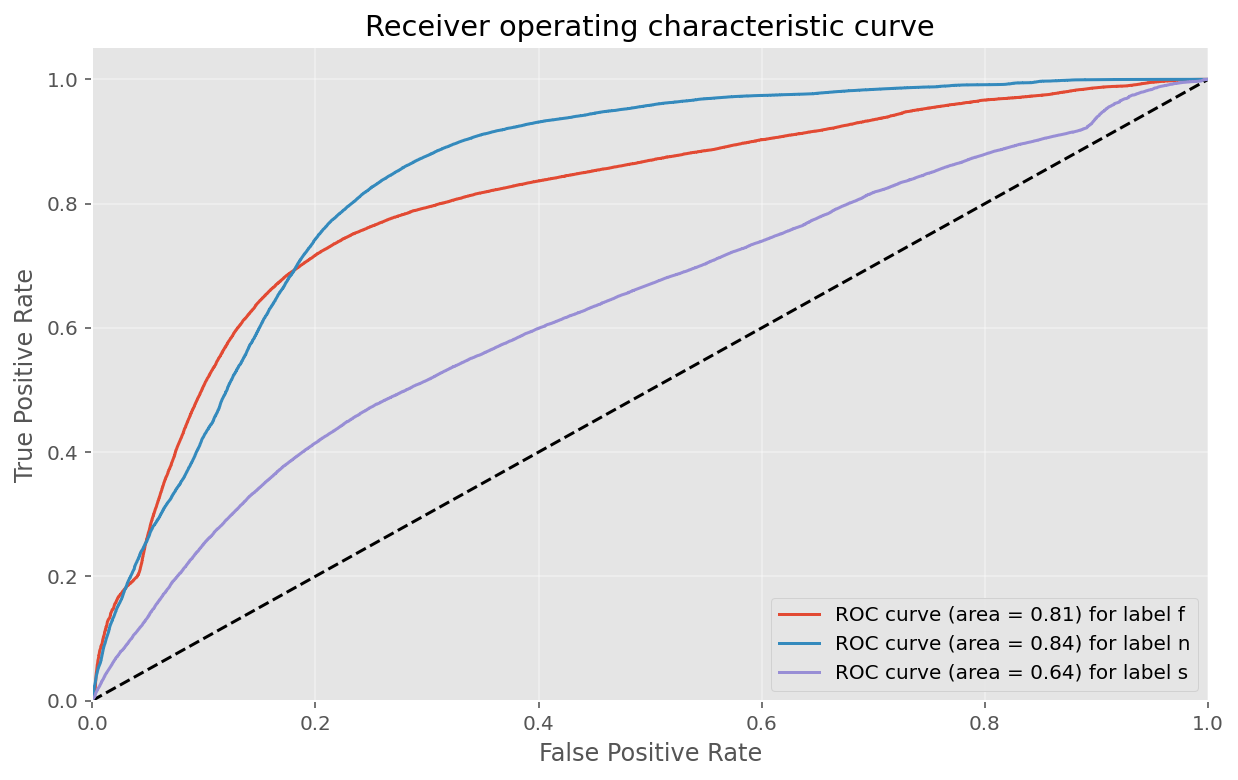

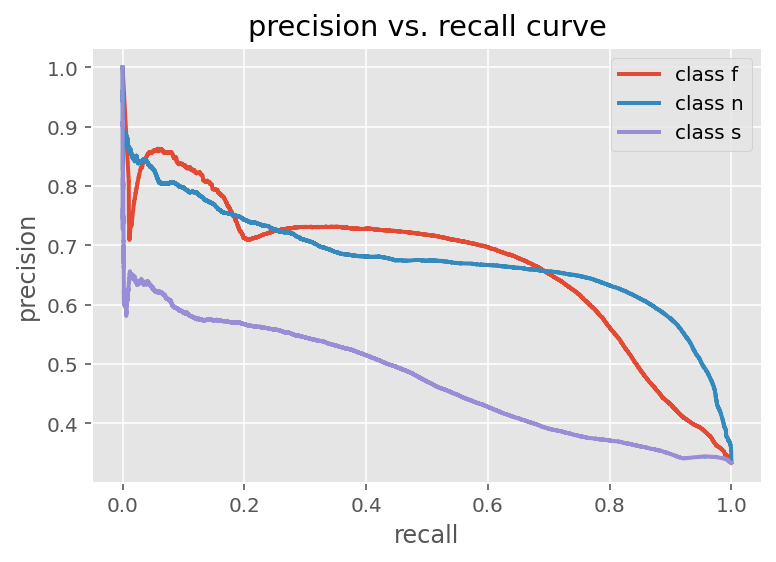

In [157]:
plot_multiclass_roc(best_nb, X_train_processed, y_train, 3, figsize = (10, 6))
multiclass_precision_recall(best_nb, X_train_processed, y_train)

In [161]:
best_nb.classes_

array(['f', 'n', 's'], dtype='<U1')

In [176]:
np.exp(best_nb.feature_log_prob_[0])

array([0.001522  , 0.00401149, 0.00012511, ..., 0.03676564, 0.03242343,
       0.00125983])

In [177]:
nb_feature_df = pd.DataFrame({'class_f': np.exp(best_nb.feature_log_prob_[0]),
                              'class_n': np.exp(best_nb.feature_log_prob_[1]),
                              'class_s': np.exp(best_nb.feature_log_prob_[2])},
                             index = X_train_processed.columns)
nb_feature_df.head()

class_f   class_n   class_s
categories__x0_blood  0.001522  0.000006  0.001298
categories__x0_card   0.004011  0.000544  0.001292
categories__x0_cong   0.000125  0.000003  0.000149
categories__x0_ear    0.000032  0.000437  0.000266
categories__x0_endo   0.000101  0.000024  0.000144

<AxesSubplot:>

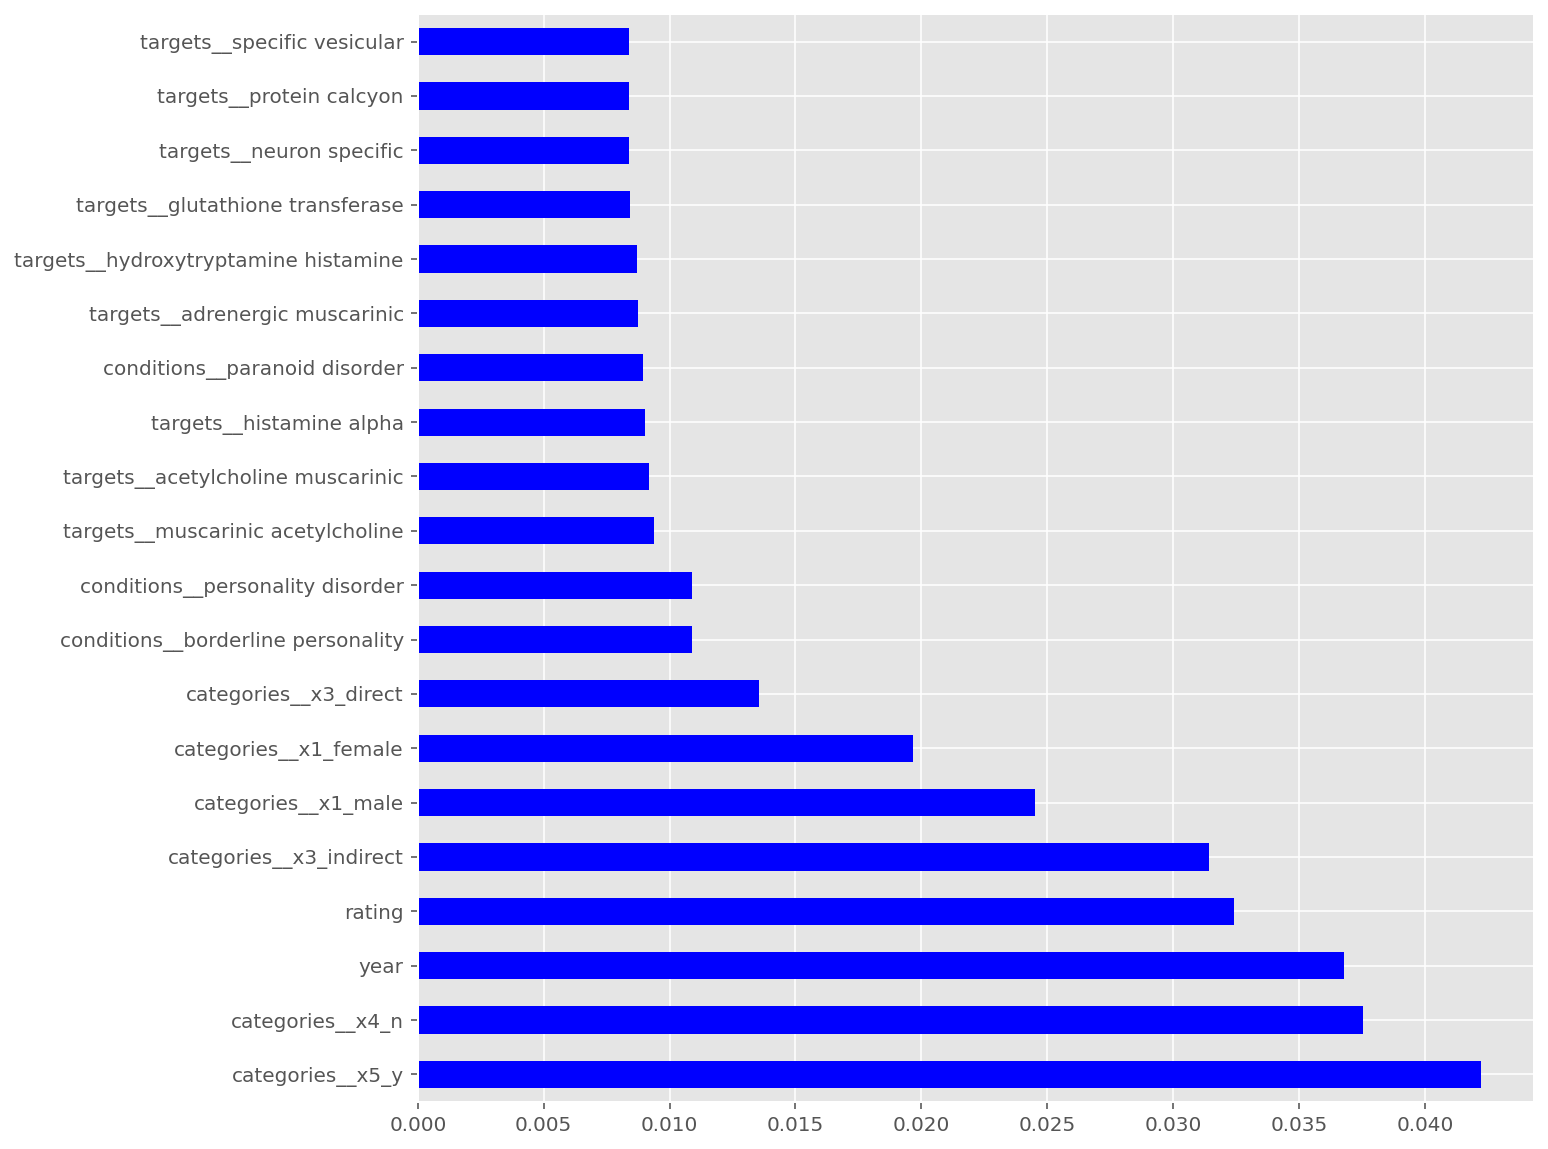

In [178]:
nb_feature_df['class_f'].sort_values(ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

<AxesSubplot:>

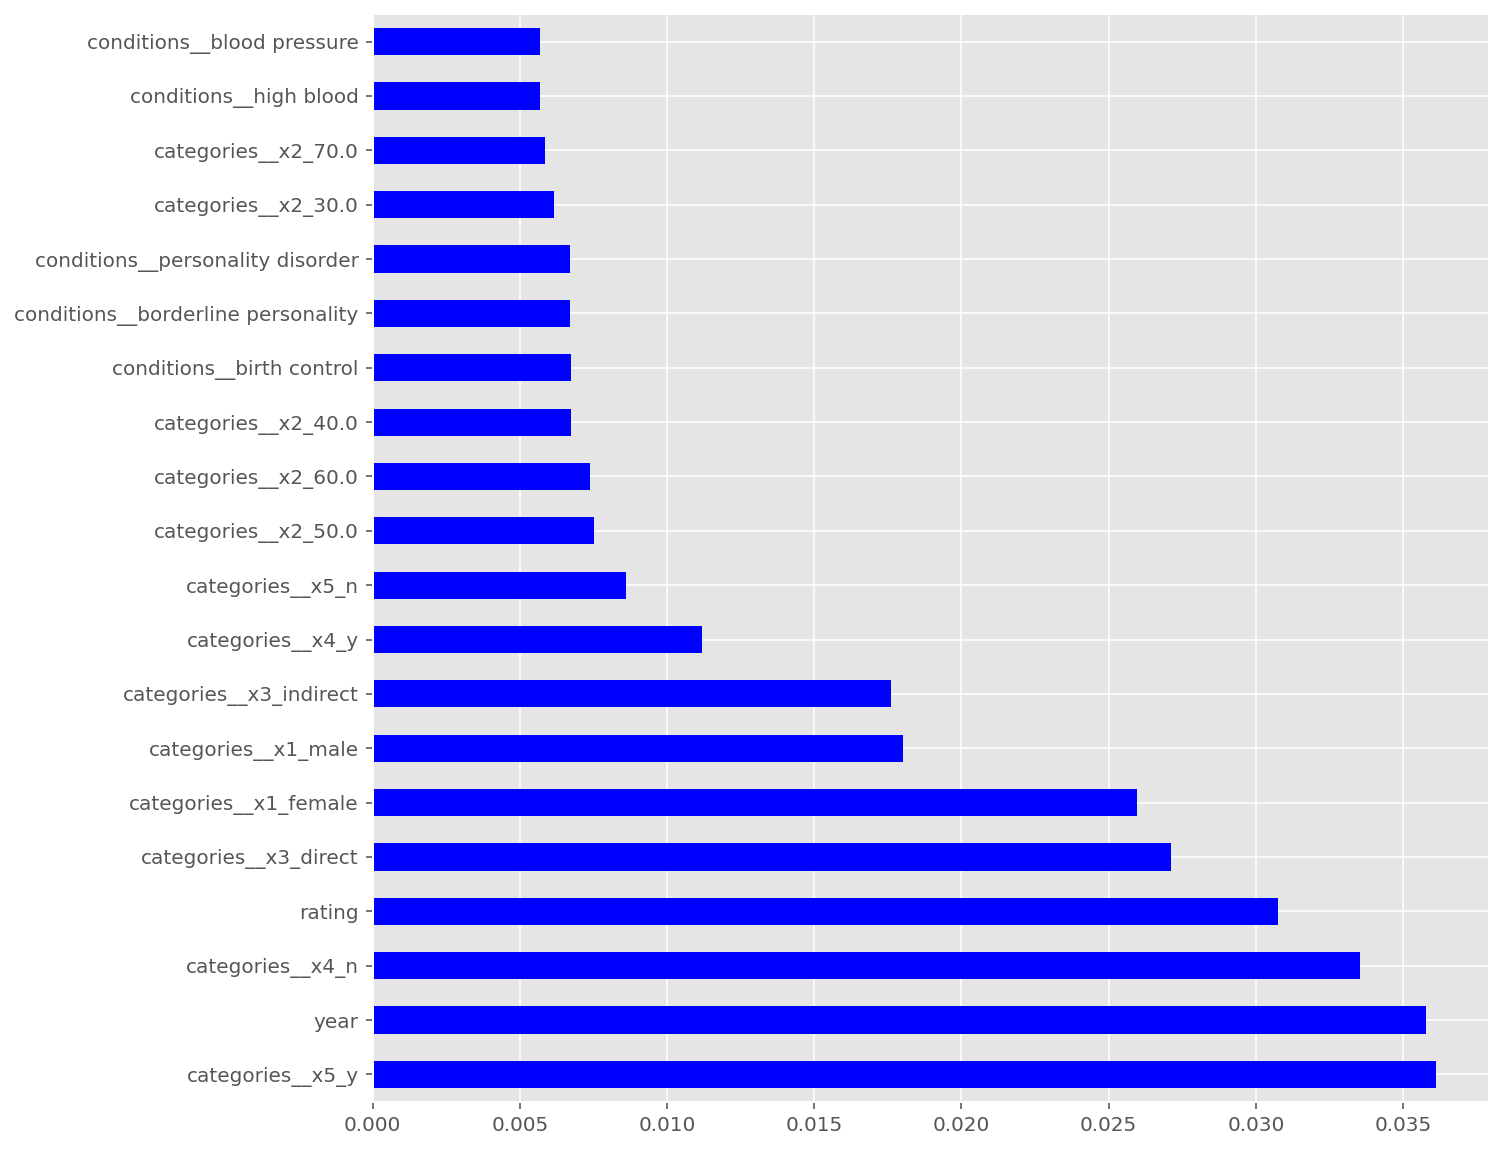

In [179]:
nb_feature_df['class_s'].sort_values(ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

<AxesSubplot:>

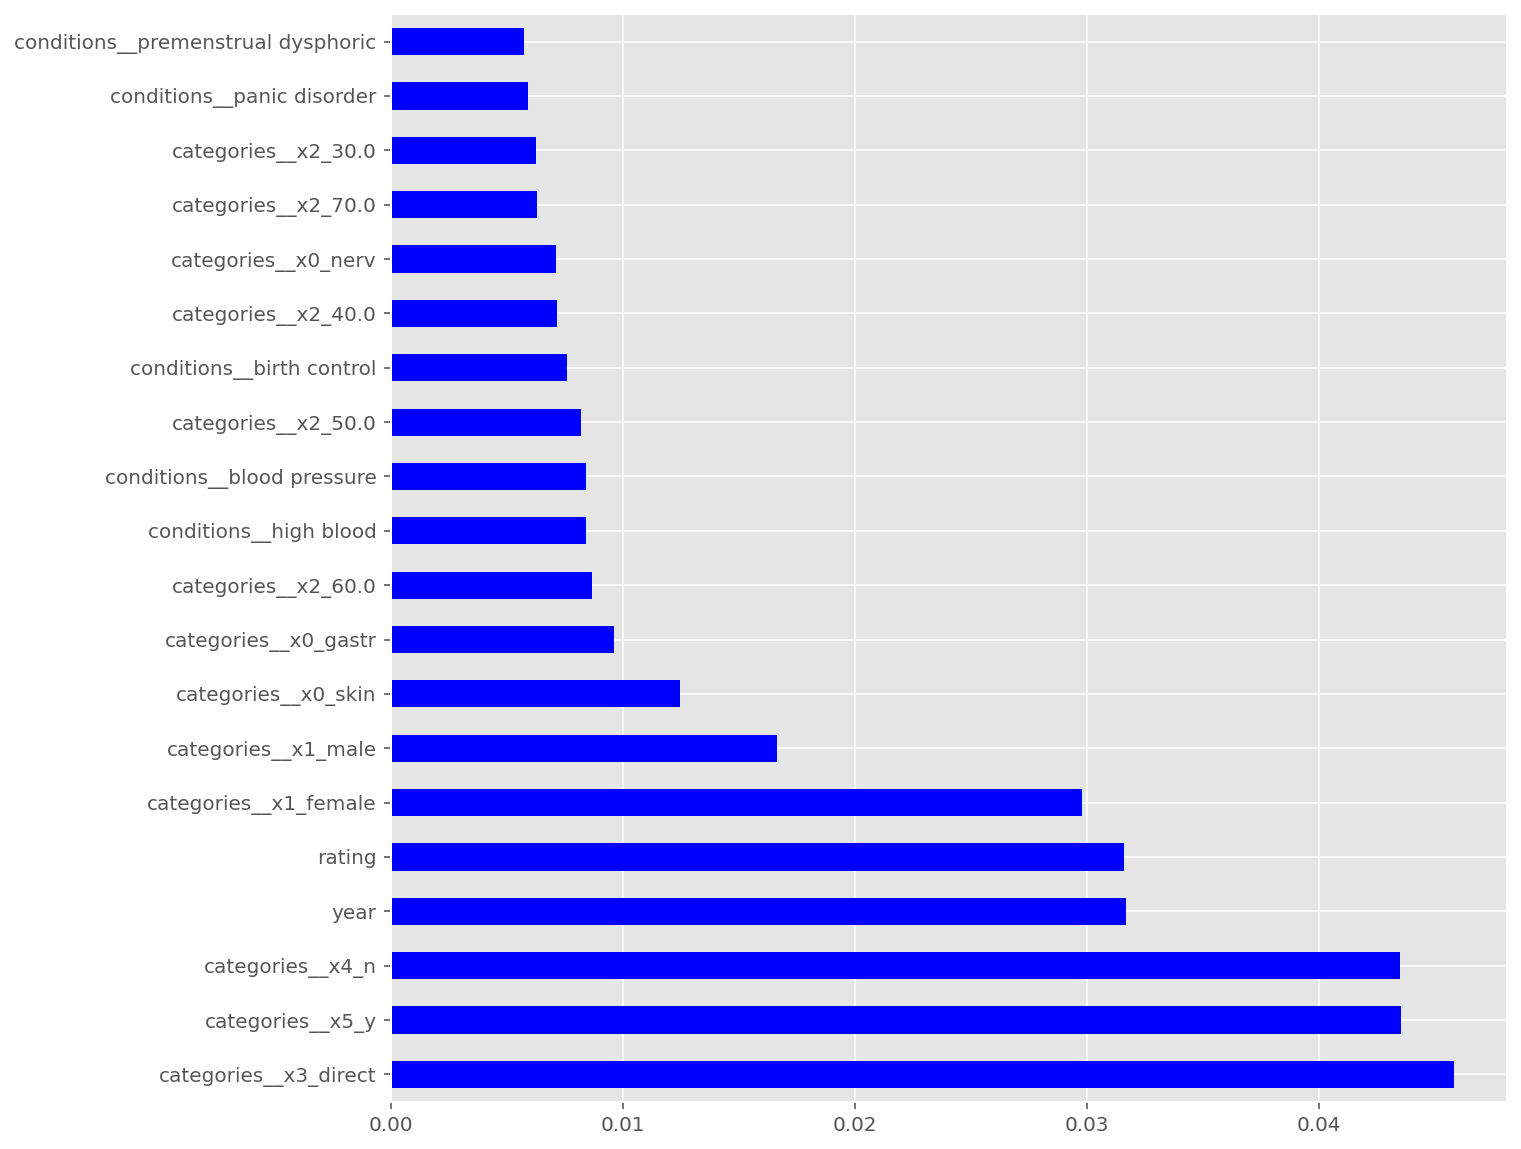

In [180]:
nb_feature_df['class_n'].sort_values(ascending = False).head(20).plot(kind = 'barh', figsize = (10, 10), color = 'b')

In [75]:
# SVC
from sklearn.svm import SVC

In [79]:
svc = SVC()
params = {'kernel': ['rbf', 'sigmoid'],
          'C': np.logspace(-4, 2, 10),
          'gamma': ['scale', 'auto']}

svc_grid = GridSearchCV(svc, params, cv = 3, verbose = 3, n_jobs = -2)
svc_grid.fit(X_train_processed, y_train)

print(svc_grid.best_params_)
print(svc_grid.best_score_)

best_svc = svc_grid.best_estimator_

print(best_svc.score(X_train_processed, y_train))
print(best_svc.score(X_test_processed, y_test))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: 

In [ ]:
joblib.dump(best_svc, 'best_svc.jlib')

In [ ]:
# knn
knn_params = {'n_neighbors': range(3, 303, 50)
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier(max_iteration = 10000)

knn_grid = GridSearchCV(knn, knn_params, n_jobs = -2, cv = 5, verbose = 3)
# fit grid search
knn_grid.fit(X_train_processed, y_train)

# save best estimate
best_knn = knn_gridsearch.best_estimator_

# print best parameters chosen
print('KNN best parameters: ', knn_grid.best_params_)
# print best score (mean cv score)
print('Best Score: ', knn_grid.best_score_)
# print training and test scores
print('Training score: ', knn_grid.score(X_train_processed, y_train))
print('Test score: ', knn_grid.score(X_test_processed, y_test))


In [ ]:
joblib.dump(best_knn, 'best_knn.jlib')
# best_knn = joblib.load('best_knn.jlib')

In [ ]:
# decision tree
with joblib.parallel_backend('dask'):
    decisiontree

In [ ]:
# random forest

In [ ]:
# svm